# **Importing Libraries**

In [ ]:
!pip install statsmodels
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# allow plots to appear directly in the notebook
%matplotlib inline

# **Uploading File**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving garments_worker_productivity.csv to garments_worker_productivity (1).csv


# **Data Preprocessing**

In [ ]:
data=pd.read_csv('/content/garments_worker_productivity.csv')
data.head()

date   quarter  department       day  team  targeted_productivity  \
0  1/1/2015  Quarter1      sweing  Thursday     8                   0.80   
1  1/1/2015  Quarter1  finishing   Thursday     1                   0.75   
2  1/1/2015  Quarter1      sweing  Thursday    11                   0.80   
3  1/1/2015  Quarter1      sweing  Thursday    12                   0.80   
4  1/1/2015  Quarter1      sweing  Thursday     6                   0.80   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
1   3.94     NaN        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0                   0           59.0             0.940725  
1                   0            8.0             0.886500  
2                   0           30.5             0.800570  
3                   0           30.5             0.800570  
4                   0           56.0             0.800382

In [ ]:
data.isna().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

**Removing 'Wip' and 'Date' columns**

In [ ]:
data=data.drop(['wip','date'],axis=1)

In [ ]:
data.head()

quarter  department       day  team  targeted_productivity    smv  \
0  Quarter1      sweing  Thursday     8                   0.80  26.16   
1  Quarter1  finishing   Thursday     1                   0.75   3.94   
2  Quarter1      sweing  Thursday    11                   0.80  11.41   
3  Quarter1      sweing  Thursday    12                   0.80  11.41   
4  Quarter1      sweing  Thursday     6                   0.80  25.90   

   over_time  incentive  idle_time  idle_men  no_of_style_change  \
0       7080         98        0.0         0                   0   
1        960          0        0.0         0                   0   
2       3660         50        0.0         0                   0   
3       3660         50        0.0         0                   0   
4       1920         50        0.0         0                   0   

   no_of_workers  actual_productivity  
0           59.0             0.940725  
1            8.0             0.886500  
2           30.5             0.800570  
3           30.5             0.800570  
4           56.0             0.800382

In [ ]:
data.shape

(1197, 13)

In [ ]:
for i in range(data.shape[1]):
  print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12


In [ ]:
for i in range(data.shape[1]):
  print(data.iloc[:,i].unique())
  print(data.iloc[:,i].value_counts())

['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']
quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: count, dtype: int64
['sweing' 'finishing ' 'finishing']
department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64
['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']
day
Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: count, dtype: int64
[ 8  1 11 12  6  7  2  3  9 10  5  4]
team
8     109
2     109
1     105
4     105
9     104
10    100
12     99
7      96
3      95
6      94
5      93
11     88
Name: count, dtype: int64
[0.8  0.75 0.7  0.65 0.6  0.35 0.5  0.07 0.4 ]
targeted_productivity
0.80    540
0.70    242
0.75    216
0.65     63
0.60     57
0.50     49
0.35     27
0.40      2
0.07      1
Name: count, dtype: int64
[26.16  3.94 11.41 25.9  28.08 19.87 19.31  2.9  23.69  4.15 11.61 45.67
 21.98 31.83 12.52 42.41 20.79 50.48  4.3

**Converting 'Day' column into binary**

In [ ]:
def convert_day_to_binary(day):
    if day in ['Saturday', 'Sunday']:
        return 1
    else:
        return 0

In [ ]:
data['day_binary'] = data['day'].apply(convert_day_to_binary)

In [ ]:
data.drop('day', axis=1, inplace=True)

In [ ]:
for i in range(data.shape[1]):
  print(data.iloc[:,i].value_counts())

quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: count, dtype: int64
department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64
team
8     109
2     109
1     105
4     105
9     104
10    100
12     99
7      96
3      95
6      94
5      93
11     88
Name: count, dtype: int64
targeted_productivity
0.80    540
0.70    242
0.75    216
0.65     63
0.60     57
0.50     49
0.35     27
0.40      2
0.07      1
Name: count, dtype: int64
smv
3.94     192
2.90     108
22.52    103
30.10     79
4.15      76
        ... 
48.68      1
54.56      1
41.19      1
49.10      1
40.99      1
Name: count, Length: 70, dtype: int64
over_time
960      129
1440     111
6960      61
6840      48
1200      39
        ... 
4140       1
12180      1
10770      1
12000      1
3120       1
Name: count, Length: 143, dtype: int64
incentive
0       604
50      113
63       61
45       54
30       52
23       38
38       29
60       28
40   

In [ ]:
print(data)

       quarter  department  team  targeted_productivity    smv  over_time  \
0     Quarter1      sweing     8                   0.80  26.16       7080   
1     Quarter1  finishing      1                   0.75   3.94        960   
2     Quarter1      sweing    11                   0.80  11.41       3660   
3     Quarter1      sweing    12                   0.80  11.41       3660   
4     Quarter1      sweing     6                   0.80  25.90       1920   
...        ...         ...   ...                    ...    ...        ...   
1192  Quarter2   finishing    10                   0.75   2.90        960   
1193  Quarter2   finishing     8                   0.70   3.90        960   
1194  Quarter2   finishing     7                   0.65   3.90        960   
1195  Quarter2   finishing     9                   0.75   2.90       1800   
1196  Quarter2   finishing     6                   0.70   2.90        720   

      incentive  idle_time  idle_men  no_of_style_change  no_of_workers  \


In [ ]:
data.describe()

team  targeted_productivity          smv     over_time  \
count  1197.000000            1197.000000  1197.000000   1197.000000   
mean      6.426901               0.729632    15.062172   4567.460317   
std       3.463963               0.097891    10.943219   3348.823563   
min       1.000000               0.070000     2.900000      0.000000   
25%       3.000000               0.700000     3.940000   1440.000000   
50%       6.000000               0.750000    15.260000   3960.000000   
75%       9.000000               0.800000    24.260000   6960.000000   
max      12.000000               0.800000    54.560000  25920.000000   

         incentive    idle_time     idle_men  no_of_style_change  \
count  1197.000000  1197.000000  1197.000000         1197.000000   
mean     38.210526     0.730159     0.369256            0.150376   
std     160.182643    12.709757     3.268987            0.427848   
min       0.000000     0.000000     0.000000            0.000000   
25%       0.000000     0.000000     0.000000            0.000000   
50%       0.000000     0.000000     0.000000            0.000000   
75%      50.000000     0.000000     0.000000            0.000000   
max    3600.000000   300.000000    45.000000            2.000000   

       no_of_workers  actual_productivity   day_binary  
count    1197.000000          1197.000000  1197.000000  
mean       34.609858             0.735091     0.325815  
std        22.197687             0.174488     0.468874  
min         2.000000             0.233705     0.000000  
25%         9.000000             0.650307     0.000000  
50%        34.000000             0.773333     0.000000  
75%        57.000000             0.850253     1.000000  
max        89.000000             1.120437     1.000000

In [ ]:
data.head()

quarter  department  team  targeted_productivity    smv  over_time  \
0  Quarter1      sweing     8                   0.80  26.16       7080   
1  Quarter1  finishing      1                   0.75   3.94        960   
2  Quarter1      sweing    11                   0.80  11.41       3660   
3  Quarter1      sweing    12                   0.80  11.41       3660   
4  Quarter1      sweing     6                   0.80  25.90       1920   

   incentive  idle_time  idle_men  no_of_style_change  no_of_workers  \
0         98        0.0         0                   0           59.0   
1          0        0.0         0                   0            8.0   
2         50        0.0         0                   0           30.5   
3         50        0.0         0                   0           30.5   
4         50        0.0         0                   0           56.0   

   actual_productivity  day_binary  
0             0.940725           0  
1             0.886500           0  
2             0.800570           0  
3             0.800570           0  
4             0.800382           0

# **Assigning Feature and Target Variables**

In [ ]:
# Feature Variable
x=data.drop(['actual_productivity'],axis=1)
print(x)

# Target Variable
y=data['actual_productivity']
print(y)

       quarter  department  team  targeted_productivity    smv  over_time  \
0     Quarter1      sweing     8                   0.80  26.16       7080   
1     Quarter1  finishing      1                   0.75   3.94        960   
2     Quarter1      sweing    11                   0.80  11.41       3660   
3     Quarter1      sweing    12                   0.80  11.41       3660   
4     Quarter1      sweing     6                   0.80  25.90       1920   
...        ...         ...   ...                    ...    ...        ...   
1192  Quarter2   finishing    10                   0.75   2.90        960   
1193  Quarter2   finishing     8                   0.70   3.90        960   
1194  Quarter2   finishing     7                   0.65   3.90        960   
1195  Quarter2   finishing     9                   0.75   2.90       1800   
1196  Quarter2   finishing     6                   0.70   2.90        720   

      incentive  idle_time  idle_men  no_of_style_change  no_of_workers  \


# **Exploratory Data Analysis**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   department             1197 non-null   object 
 2   team                   1197 non-null   int64  
 3   targeted_productivity  1197 non-null   float64
 4   smv                    1197 non-null   float64
 5   over_time              1197 non-null   int64  
 6   incentive              1197 non-null   int64  
 7   idle_time              1197 non-null   float64
 8   idle_men               1197 non-null   int64  
 9   no_of_style_change     1197 non-null   int64  
 10  no_of_workers          1197 non-null   float64
 11  actual_productivity    1197 non-null   float64
 12  day_binary             1197 non-null   int64  
dtypes: float64(5), int64(6), object(2)
memory usage: 121.7+ KB


In [ ]:
data.head()

quarter  department  team  targeted_productivity    smv  over_time  \
0  Quarter1      sweing     8                   0.80  26.16       7080   
1  Quarter1  finishing      1                   0.75   3.94        960   
2  Quarter1      sweing    11                   0.80  11.41       3660   
3  Quarter1      sweing    12                   0.80  11.41       3660   
4  Quarter1      sweing     6                   0.80  25.90       1920   

   incentive  idle_time  idle_men  no_of_style_change  no_of_workers  \
0         98        0.0         0                   0           59.0   
1          0        0.0         0                   0            8.0   
2         50        0.0         0                   0           30.5   
3         50        0.0         0                   0           30.5   
4         50        0.0         0                   0           56.0   

   actual_productivity  day_binary  
0             0.940725           0  
1             0.886500           0  
2             0.800570           0  
3             0.800570           0  
4             0.800382           0

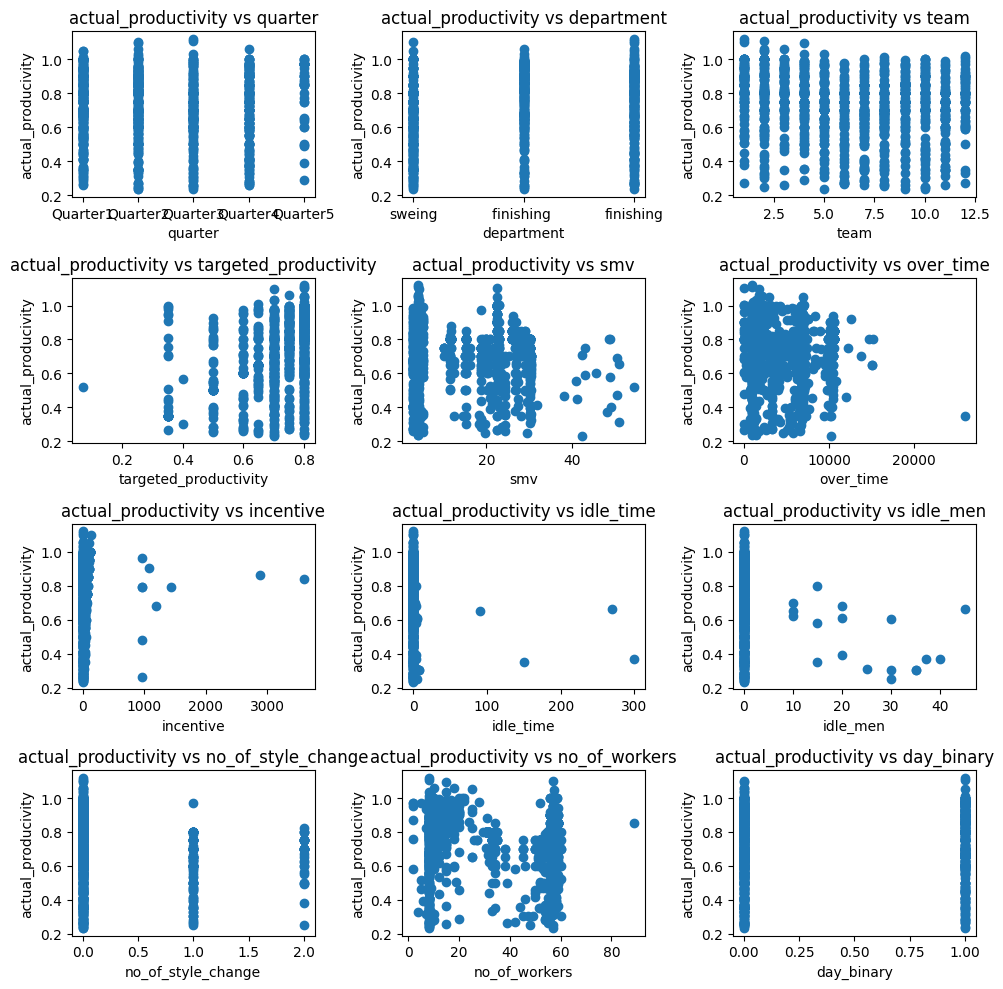

In [ ]:
# Scatter Plot

features = ["quarter","department","team","targeted_productivity","smv","over_time","incentive","idle_time","idle_men","no_of_style_change","no_of_workers","day_binary"]

# Create scatter plots
plt.figure(figsize=(10, 10))

for i, feature in enumerate(features):
    plt.subplot(4, 3, i+1)
    plt.scatter(data[feature],data['actual_productivity'])
    plt.xlabel(feature)
    plt.ylabel('actual_producivity')
    plt.title(f'actual_productivity vs {feature}')

plt.tight_layout()
plt.show()

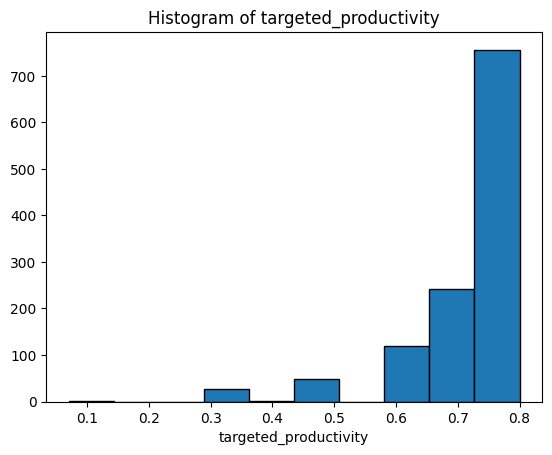

In [ ]:
# Histogram for Targeted Productivity

targeted_productivity=data['targeted_productivity']
plt.hist(targeted_productivity,bins=10,edgecolor='black')
plt.xlabel('targeted_productivity')
plt.title('Histogram of targeted_productivity')
plt.show()

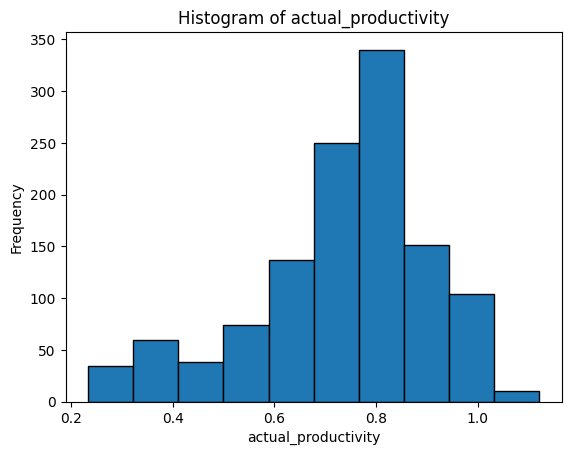

In [ ]:
# Histogram for Actual Productivity

actual_productivity=data['actual_productivity']
plt.hist(actual_productivity,bins=10,edgecolor='black')
plt.xlabel('actual_productivity')
plt.ylabel('Frequency')
plt.title('Histogram of actual_productivity')
plt.show()

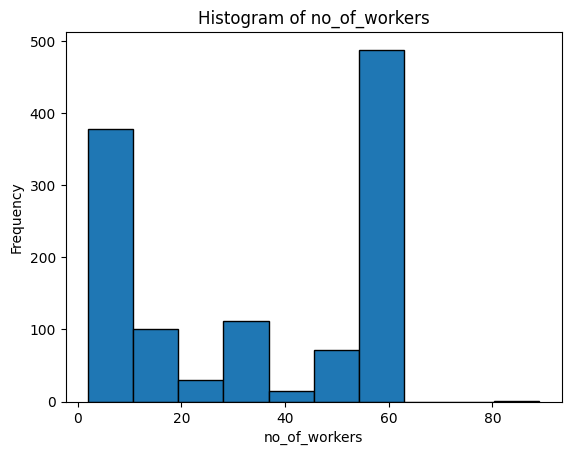

In [ ]:
# Histogram for No of workers

no_of_workers=data['no_of_workers']
plt.hist(no_of_workers,bins=10,edgecolor='black')
plt.xlabel('no_of_workers')
plt.ylabel('Frequency')
plt.title('Histogram of no_of_workers')
plt.show()

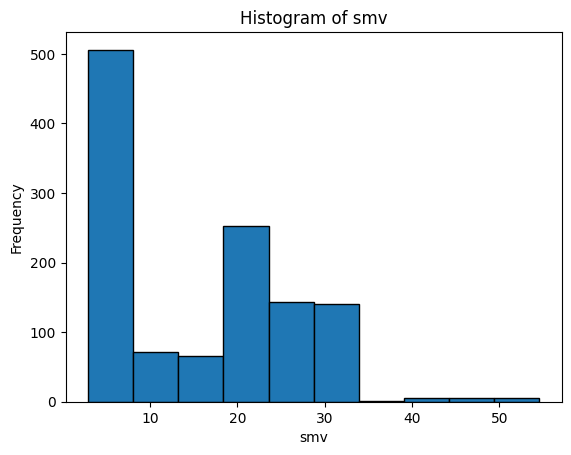

In [ ]:
# Histogram for smv

smv=data['smv']
plt.hist(smv,bins=10,edgecolor='black')
plt.xlabel('smv')
plt.ylabel('Frequency')
plt.title('Histogram of smv')
plt.show()

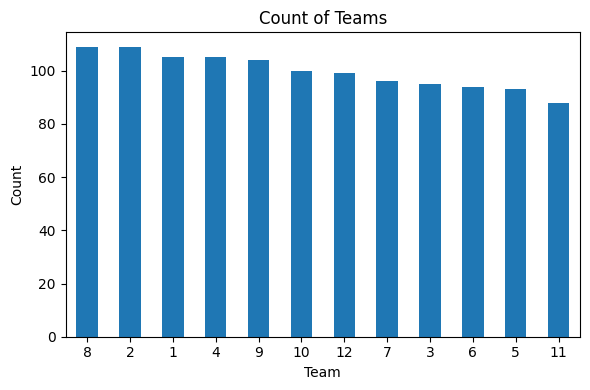

In [ ]:
# Bar plot for teams

team = data['team'].value_counts()
# Plotting the bar graph
plt.figure(figsize=(6, 4))
team.plot(kind='bar')
plt.title('Count of Teams')
plt.xlabel('Team')
plt.ylabel('Count')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

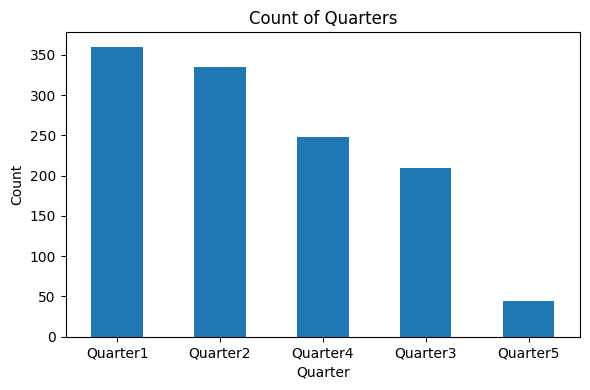

In [ ]:
# Bar plot for Quarters

Quarter = data['quarter'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(6, 4))
Quarter.plot(kind='bar')
plt.title('Count of Quarters')
plt.xlabel('Quarter')
plt.ylabel('Count')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

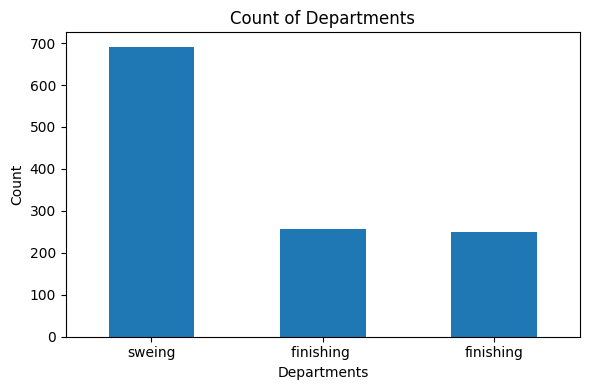

In [ ]:
# Bar plot for Departments

team_counts = data['department'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(6, 4))
team_counts.plot(kind='bar')
plt.title('Count of Departments')
plt.xlabel('Departments')
plt.ylabel('Count')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

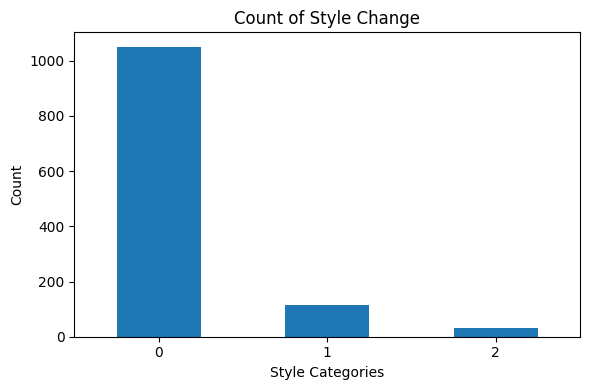

In [ ]:
# Bar plot for Style change

team_counts = data['no_of_style_change'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(6, 4))
team_counts.plot(kind='bar')
plt.title('Count of Style Change')
plt.xlabel('Style Categories')
plt.ylabel('Count')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

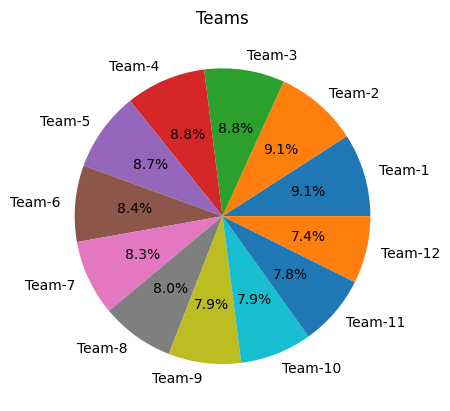

In [ ]:
# Pie chart for Teams

teams=data['team']
sizes=teams.value_counts()
plt.pie(sizes,labels=["Team-1","Team-2","Team-3","Team-4","Team-5","Team-6","Team-7","Team-8","Team-9","Team-10","Team-11","Team-12"],autopct='%1.1f%%')
plt.title('Teams')
plt.show()

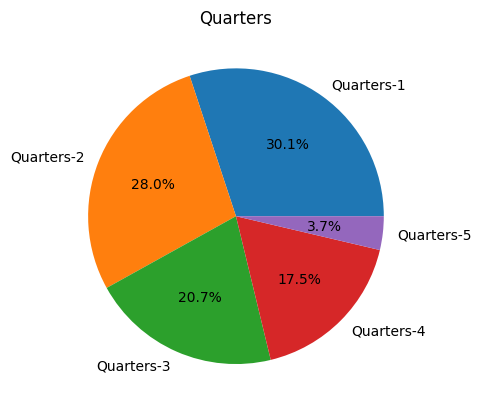

In [ ]:
# Pie chart for Quarters

teams=data['quarter']
sizes=teams.value_counts()
plt.pie(sizes,labels=["Quarters-1","Quarters-2","Quarters-3","Quarters-4","Quarters-5"],autopct='%1.1f%%')
plt.title('Quarters')
plt.show()

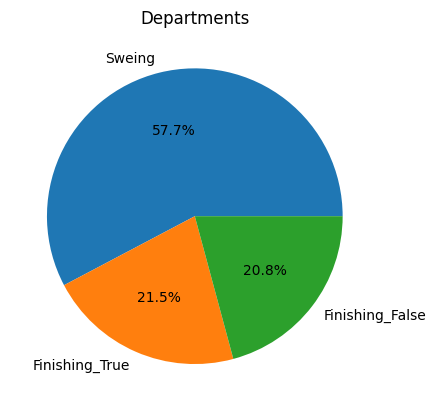

In [ ]:
# Pie chart for Departments

teams=data['department']
sizes=teams.value_counts()
plt.pie(sizes,labels=["Sweing","Finishing_True","Finishing_False"],autopct='%1.1f%%')
plt.title('Departments')
plt.show()

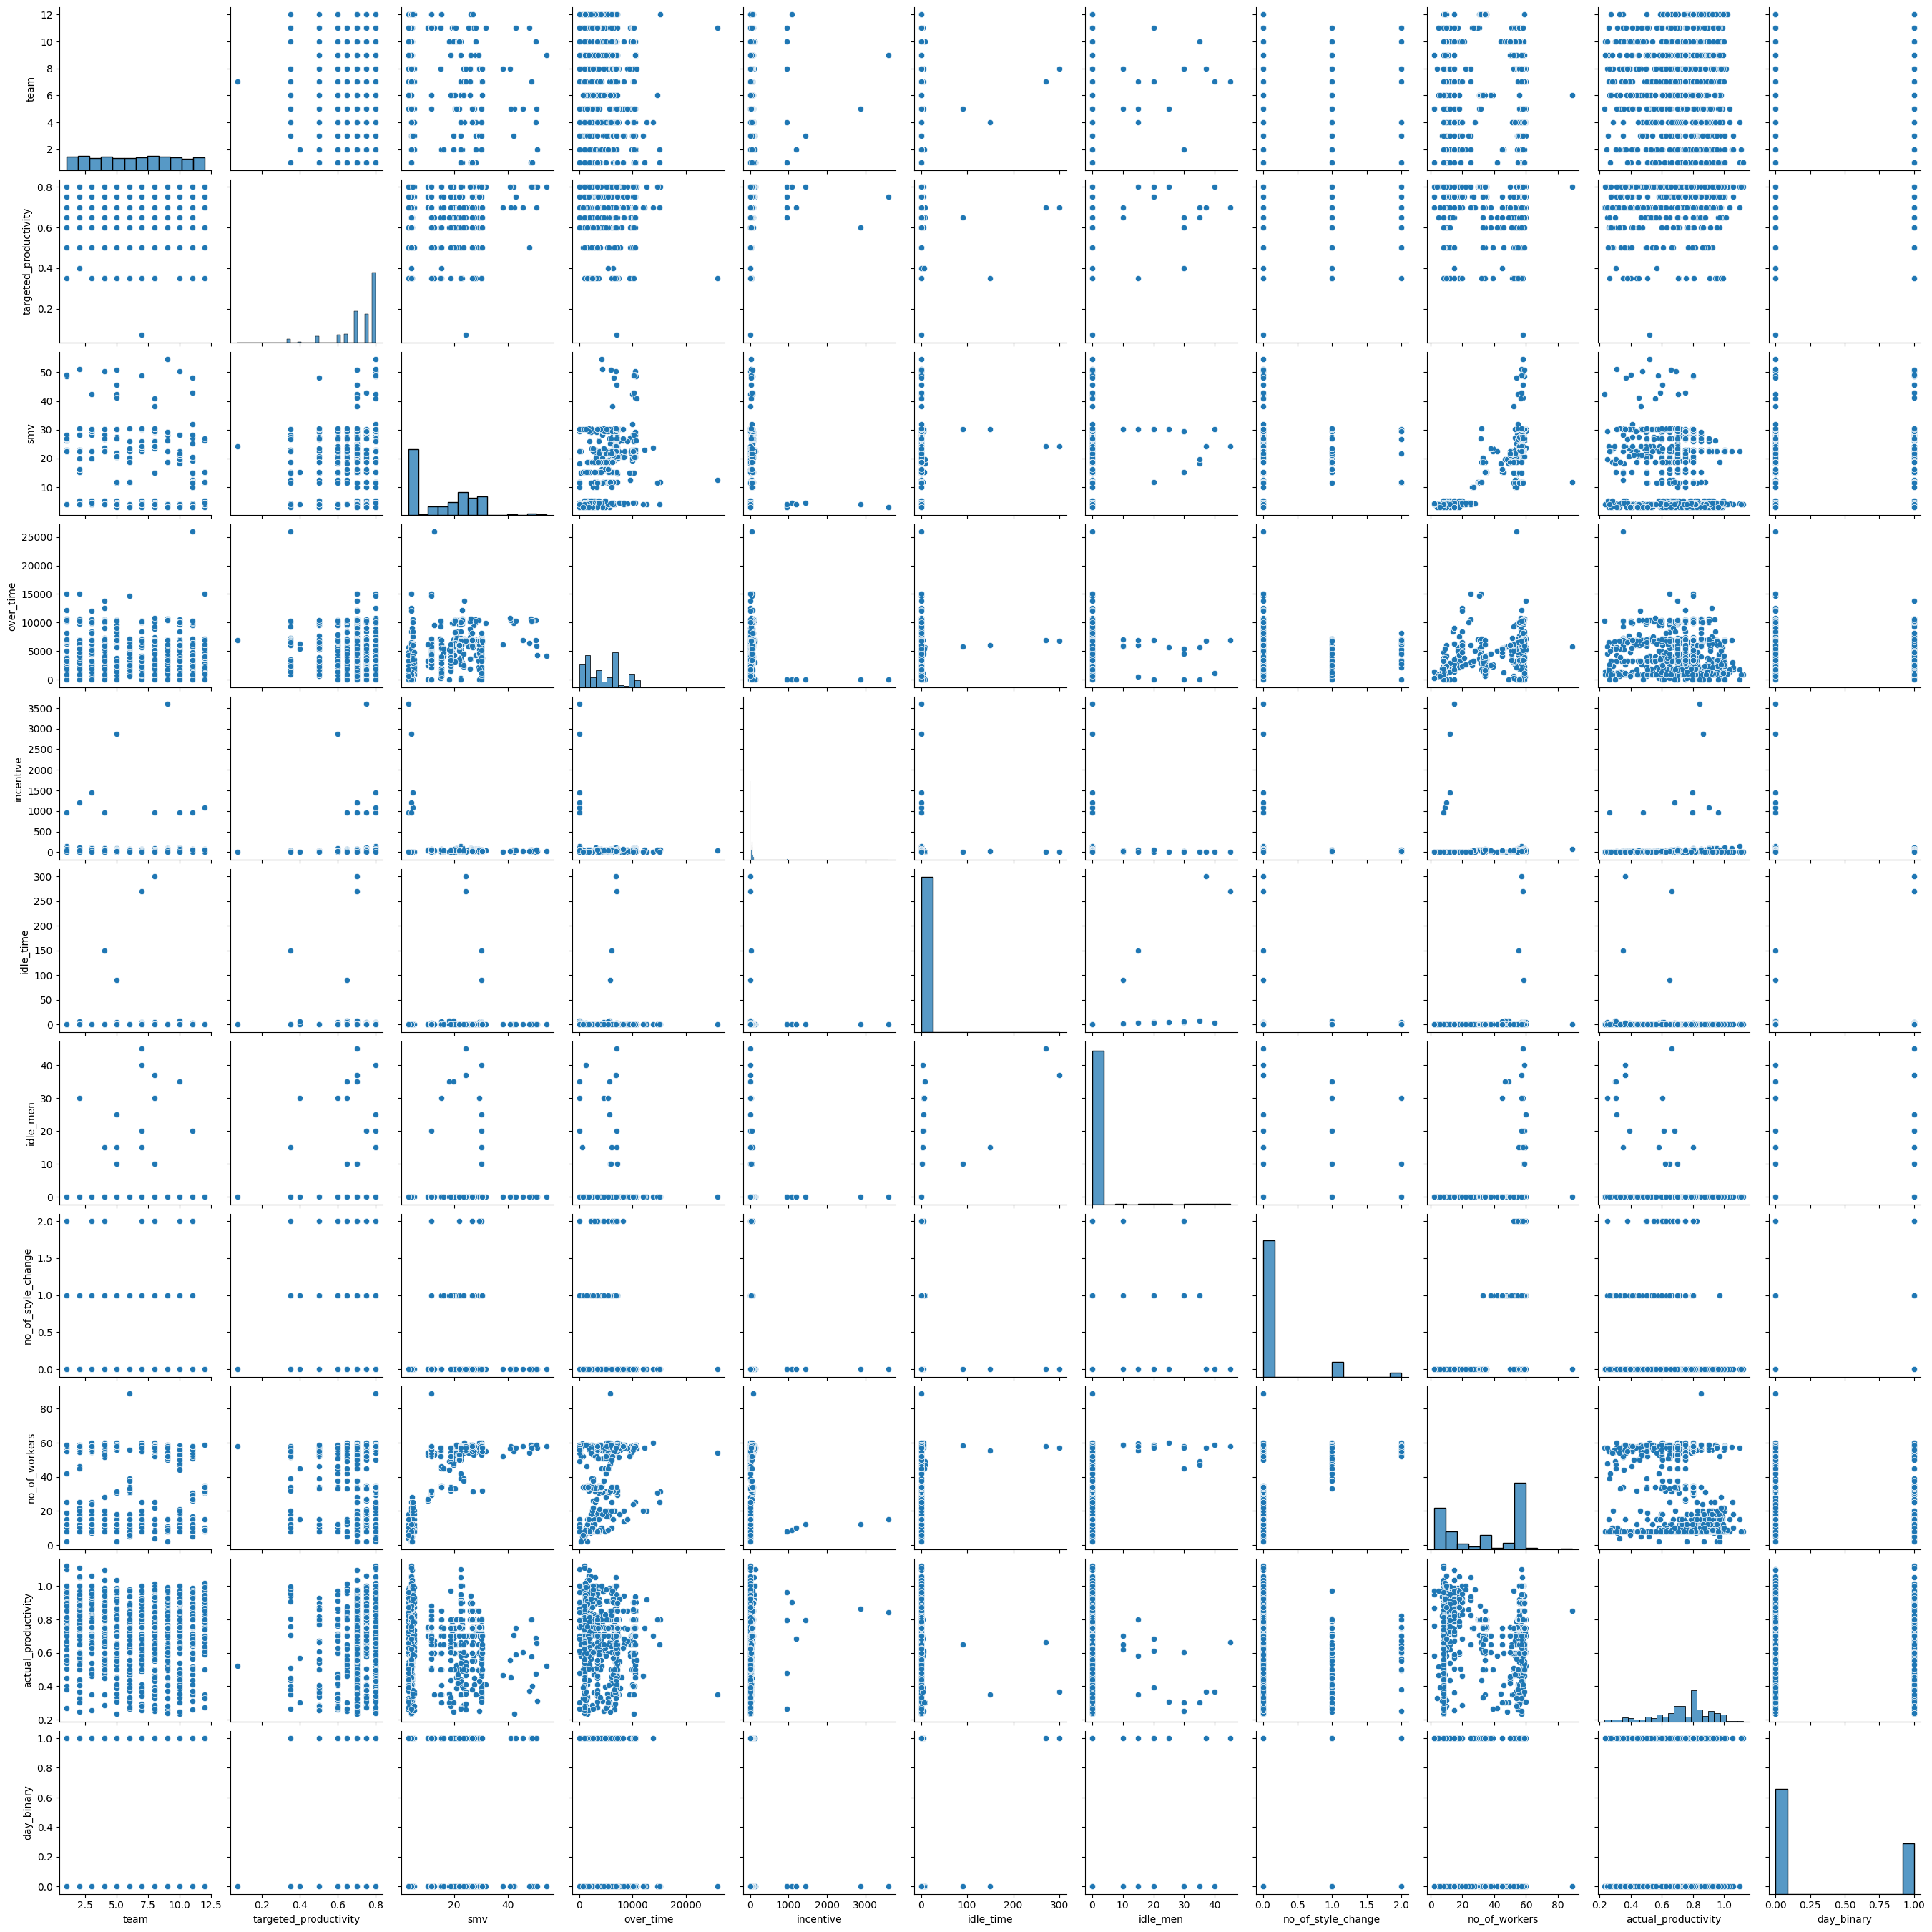

In [ ]:
# Pairplot

sns.pairplot(data)
plt.show()

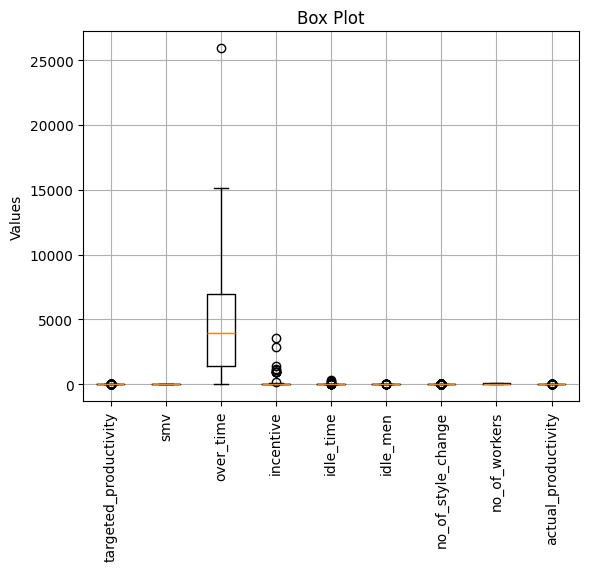

In [ ]:
# Box plot

Data =data[['targeted_productivity','smv','over_time','incentive','idle_time','idle_men','no_of_style_change','no_of_workers','actual_productivity']]

# Create a box plot
plt.boxplot(Data, labels=['targeted_productivity','smv','over_time','incentive','idle_time','idle_men','no_of_style_change','no_of_workers','actual_productivity'])

# Customize the plot
plt.ylabel('Values')
plt.title('Box Plot')
plt.xticks(rotation=90)
# Show the plot
plt.grid(True)
plt.show()

In [ ]:
X=pd.get_dummies(data,drop_first=False)
X.head()

team  targeted_productivity    smv  over_time  incentive  idle_time  \
0     8                   0.80  26.16       7080         98        0.0   
1     1                   0.75   3.94        960          0        0.0   
2    11                   0.80  11.41       3660         50        0.0   
3    12                   0.80  11.41       3660         50        0.0   
4     6                   0.80  25.90       1920         50        0.0   

   idle_men  no_of_style_change  no_of_workers  actual_productivity  \
0         0                   0           59.0             0.940725   
1         0                   0            8.0             0.886500   
2         0                   0           30.5             0.800570   
3         0                   0           30.5             0.800570   
4         0                   0           56.0             0.800382   

   day_binary  quarter_Quarter1  quarter_Quarter2  quarter_Quarter3  \
0           0              True             False             False   
1           0              True             False             False   
2           0              True             False             False   
3           0              True             False             False   
4           0              True             False             False   

   quarter_Quarter4  quarter_Quarter5  department_finishing  \
0             False             False                 False   
1             False             False                 False   
2             False             False                 False   
3             False             False                 False   
4             False             False                 False   

   department_finishing   department_sweing  
0                  False               True  
1                   True              False  
2                  False               True  
3                  False               True  
4                  False               True

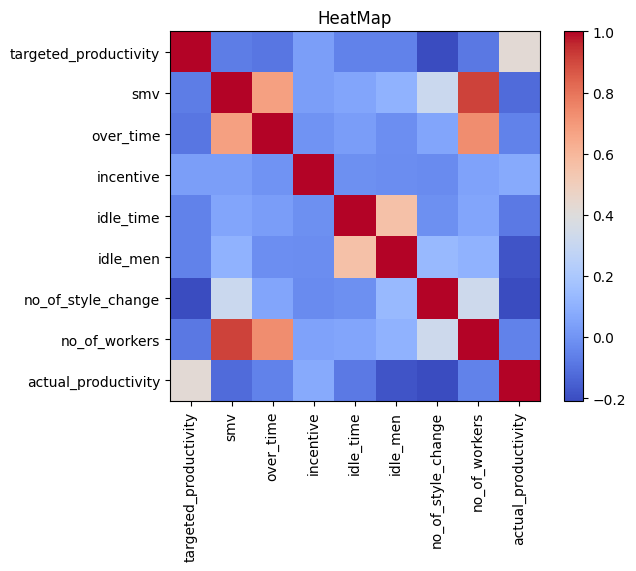

In [ ]:
# Correlation Matrix or HeatMap

Data=data[["targeted_productivity","smv","over_time","incentive","idle_time","idle_men","no_of_style_change","no_of_workers","actual_productivity"]].corr()
plt.imshow(Data,cmap='coolwarm',interpolation='nearest')
plt.xticks(range(len(Data)),Data,rotation=90)
plt.yticks(range(len(Data)),Data)
plt.colorbar()
plt.title('HeatMap')
plt.show()

**Convert Boolean into binary format (Quarter Column)**

In [ ]:
X['quarter_Quarter1']=X['quarter_Quarter1'].astype(int)
X['quarter_Quarter2']=X['quarter_Quarter2'].astype(int)
X['quarter_Quarter3']=X['quarter_Quarter3'].astype(int)
X['quarter_Quarter4']=X['quarter_Quarter4'].astype(int)
X['quarter_Quarter5']=X['quarter_Quarter5'].astype(int)
X['department_sweing']=X['department_sweing'].astype(int)
X['department_finishing ']=X['department_finishing '].astype(int)

In [ ]:
data=X
data.head()

team  targeted_productivity    smv  over_time  incentive  idle_time  \
0     8                   0.80  26.16       7080         98        0.0   
1     1                   0.75   3.94        960          0        0.0   
2    11                   0.80  11.41       3660         50        0.0   
3    12                   0.80  11.41       3660         50        0.0   
4     6                   0.80  25.90       1920         50        0.0   

   idle_men  no_of_style_change  no_of_workers  actual_productivity  \
0         0                   0           59.0             0.940725   
1         0                   0            8.0             0.886500   
2         0                   0           30.5             0.800570   
3         0                   0           30.5             0.800570   
4         0                   0           56.0             0.800382   

   day_binary  quarter_Quarter1  quarter_Quarter2  quarter_Quarter3  \
0           0                 1                 0                 0   
1           0                 1                 0                 0   
2           0                 1                 0                 0   
3           0                 1                 0                 0   
4           0                 1                 0                 0   

   quarter_Quarter4  quarter_Quarter5  department_finishing  \
0                 0                 0                 False   
1                 0                 0                 False   
2                 0                 0                 False   
3                 0                 0                 False   
4                 0                 0                 False   

   department_finishing   department_sweing  
0                      0                  1  
1                      1                  0  
2                      0                  1  
3                      0                  1  
4                      0                  1

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   team                   1197 non-null   int64  
 1   targeted_productivity  1197 non-null   float64
 2   smv                    1197 non-null   float64
 3   over_time              1197 non-null   int64  
 4   incentive              1197 non-null   int64  
 5   idle_time              1197 non-null   float64
 6   idle_men               1197 non-null   int64  
 7   no_of_style_change     1197 non-null   int64  
 8   no_of_workers          1197 non-null   float64
 9   actual_productivity    1197 non-null   float64
 10  day_binary             1197 non-null   int64  
 11  quarter_Quarter1       1197 non-null   int64  
 12  quarter_Quarter2       1197 non-null   int64  
 13  quarter_Quarter3       1197 non-null   int64  
 14  quarter_Quarter4       1197 non-null   int64  
 15  quar

# **Machine Learning Algorithms**

# **Linear Regression (Before VIF)**

In [ ]:
#Before the change, X was a pandas series representing one column of the dataframe.
#X = data['targeted_productivity']
#Changing it into a dataframe with double brackets [[...]] solves the problem
X = data[['targeted_productivity']]  # Use double brackets to create a DataFrame
y = data.actual_productivity
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2,random_state=1)
lm2 = LinearRegression()
lm2.fit(X, y)
print(lm2.intercept_)
print(lm2.coef_)

0.1867874383341922
[0.7514793]


In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2,random_state=1)
X_train2,X_test2,y_train2,y_test2=train_test_split(X,y,test_size=0.25,random_state=1)
X_train3,X_test3,y_train3,y_test3=train_test_split(X,y,test_size=0.30,random_state=1)
X_train4,X_test4,y_train4,y_test4=train_test_split(X,y,test_size=0.40,random_state=1)

**80-20 Train Test Split**

In [ ]:
lm1 = LinearRegression()
lm1.fit(X_train1, y_train1)
y_pred1 = lm1.predict(X_test1)
print(np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))

0.17452926704725188


**75-25 Train Test Split**

In [ ]:
lm2 = LinearRegression()
lm2.fit(X_train2, y_train2)
y_pred2 = lm2.predict(X_test2)
print(np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))

0.171149235642958


**70-30 Train Test Split**

In [ ]:
lm3 = LinearRegression()
lm3.fit(X_train3, y_train3)
y_pred3 = lm3.predict(X_test3)
print(np.sqrt(metrics.mean_squared_error(y_test3, y_pred3)))

0.16914380193729733


**60-40 Train Test Split**

In [ ]:
lm4 = LinearRegression()
lm4.fit(X_train4, y_train4)
y_pred4 = lm4.predict(X_test4)
print(np.sqrt(metrics.mean_squared_error(y_test4, y_pred4)))

0.16719518090778526


# **Multiple Regression (Before VIF)**

In [ ]:
X = data[['team','targeted_productivity','smv','over_time','incentive','idle_time','idle_men','no_of_style_change','no_of_workers','day_binary','quarter_Quarter1','quarter_Quarter2','quarter_Quarter3','quarter_Quarter4','quarter_Quarter5','department_finishing','department_finishing','department_sweing']]
y = data.actual_productivity
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2,random_state=1)
lm2 = LinearRegression()
lm2.fit(X_train1, y_train1)
y_pred = lm2.predict(X_test1)
print(lm2.intercept_)
print(lm2.coef_)
print(np.sqrt(metrics.mean_squared_error(y_test1, y_pred)))

0.2611132888921823
[-7.68793302e-03  7.51725191e-01 -7.28277809e-03 -3.31873953e-06
  1.05884735e-04  6.07734611e-05 -9.15560764e-03 -2.92845217e-02
  4.58050443e-03  1.39640860e-03 -2.61779456e-03 -7.17313651e-03
 -2.21248721e-02 -2.05945589e-02  5.25103621e-02 -2.58408222e-02
 -2.58408222e-02 -6.36731158e-02]
0.16358553783429694


In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2,random_state=1)
X_train2,X_test2,y_train2,y_test2=train_test_split(X,y,test_size=0.25,random_state=1)
X_train3,X_test3,y_train3,y_test3=train_test_split(X,y,test_size=0.30,random_state=1)
X_train4,X_test4,y_train4,y_test4=train_test_split(X,y,test_size=0.40,random_state=1)

**80-20 Train Test Split**

In [ ]:
!pip install scikit-learn # Make sure scikit-learn is installed
from sklearn.metrics import r2_score # Import r2_score
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split



In [ ]:
lm1 = LinearRegression()
lm1.fit(X_train1, y_train1)
y_pred1 = lm1.predict(X_test1)
print(np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))
r2_score(y_test1,y_pred1)
print(metrics.mean_absolute_error(y_test1,y_pred1))

0.16358553783429694
0.11899196179151429


**75-25 Train Test Split**

In [ ]:
lm2 = LinearRegression()
lm2.fit(X_train2, y_train2)
y_pred2 = lm2.predict(X_test2)
print(np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))
print(r2_score(y_test2,y_pred2))
print(metrics.mean_absolute_error(y_test2,y_pred2))

0.16094059089374735
0.20424904205514338
0.1153599868422022


**70-30 Train Test Split**

In [ ]:
lm3 = LinearRegression()
lm3.fit(X_train3, y_train3)
y_pred3 = lm3.predict(X_test3)
print(np.sqrt(metrics.mean_squared_error(y_test3, y_pred3)))
print(r2_score(y_test3,y_pred3))
print(metrics.mean_absolute_error(y_test3,y_pred3))

0.15914162981507382
0.19925723507282678
0.11223180112217462


**60-40 Train Test Split**

In [ ]:
lm4 = LinearRegression()
lm4.fit(X_train4, y_train4)
y_pred4 = lm4.predict(X_test4)
print(np.sqrt(metrics.mean_squared_error(y_test4, y_pred4)))
print(r2_score(y_test4,y_pred4))
print(metrics.mean_absolute_error(y_test4,y_pred4))

0.15808955196412727
0.2246931660450926
0.11368826871121761


# **K-Nearest Neighbor (Before VIF)**


In [ ]:
# Instead of KNeighborsClassifier, use KNeighborsRegressor for continuous target variables:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

**80-20 Train Test Split**

[0.89199769 0.79409839 0.67423423 0.63948272 0.86054444 0.87933125
 0.72839134 0.73762872 0.75033109 0.83844444 0.80060417 0.69330138
 1.00023041 0.76289271 0.93179343 0.76205937 0.68906309 0.50428333
 0.80040196 0.46716146 0.51013802 0.74819379 0.73176526 0.65225833
 0.65219425 0.59706733 0.84697292 0.65284635 0.80040196 0.68106061
 0.83074861 0.73780393 0.84416669 0.7028911  0.83042278 0.64605469
 0.97520819 0.60157757 0.71568396 0.74464912 0.71404975 0.90669281
 0.80028559 0.75915365 0.73134626 0.77441338 0.9214936  0.75344362
 0.75065101 0.79298333 0.80316532 0.49652942 0.76276825 0.8066155
 0.86054444 0.85013677 0.73094789 0.71266024 0.56976823 0.51227431
 0.81749132 0.68620975 0.73176526 0.68374857 0.81749737 0.74819379
 0.80040196 0.81583556 0.76094895 0.70053714 0.74388351 0.74526099
 0.80060417 0.77132278 0.80028559 0.61582292 0.69238873 0.90901042
 0.80296224 0.75158193 0.86737399 0.73134626 0.85013677 0.69241804
 0.60956171 0.76916495 0.85582259 0.68106061 0.76908684 0.64200

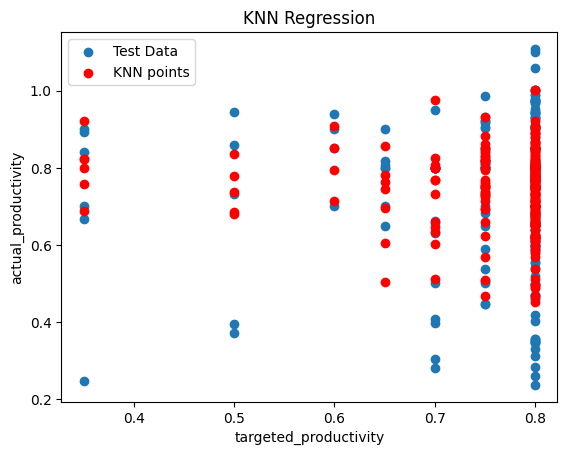

In [ ]:
model = KNeighborsRegressor(n_neighbors=8)
model.fit(X_train1, y_train1)
y_pred1 = model.predict(X_test1)
print(y_pred1)
knn = pd.DataFrame({'Predicted':y_pred1,'Actual':y_test1})
print(knn)

print(r2_score(y_test1,y_pred1))
print(metrics.mean_absolute_error(y_test1,y_pred1))
print(metrics.mean_squared_error(y_test1,y_pred1))
mse = mean_squared_error(y_test1, y_pred1)
rmse = np.sqrt(mse)
print(rmse)

plt.scatter(data['targeted_productivity'][:len(y_test1)], y_test1, label='Test Data')
plt.scatter(data['targeted_productivity'][:len(y_pred1)], y_pred1, color='red', linewidth=1, label='KNN points')
plt.xlabel('targeted_productivity')
plt.ylabel('actual_productivity')
plt.title('KNN Regression')
plt.legend()
plt.show()

**75-25 Train Test Split**

In [ ]:
model2=KNeighborsRegressor(n_neighbors=5)

[0.88017407 0.82027322 0.59862741 0.70138258 0.80382    0.8376
 0.70138258 0.71011457 0.68506264 0.80542222 0.70604333 0.74515528
 1.00023041 0.76944917 0.90556061 0.76944917 0.67231815 0.43930398
 0.80040196 0.57023611 0.57153333 0.70630451 0.7304785  0.64481333
 0.70312662 0.59978772 0.89765667 0.72114583 0.80040196 0.67392045
 0.88979778 0.73024897 0.85501211 0.76441565 0.85842966 0.6544625
 0.96019485 0.58236836 0.68506264 0.80057823 0.78029069 0.93039919
 0.82026373 0.61808333 0.70005696 0.64685426 0.94409738 0.7780395
 0.75065101 0.80939556 0.84548926 0.51236719 0.76036667 0.82027322
 0.79156222 0.85013677 0.78791763 0.66015709 0.54312917 0.52844444
 0.85931944 0.69094697 0.74041425 0.65522232 0.83008838 0.77224549
 0.80040196 0.83008838 0.76705274 0.62491109 0.73011542 0.76472549
 0.77453333 0.73399764 0.80027469 0.60231667 0.71621212 0.9202369
 0.68817708 0.76817022 0.80554848 0.70005696 0.85013677 0.65104583
 0.66670984 0.70328836 0.88357912 0.67392045 0.79027178 0.6238
 0.768

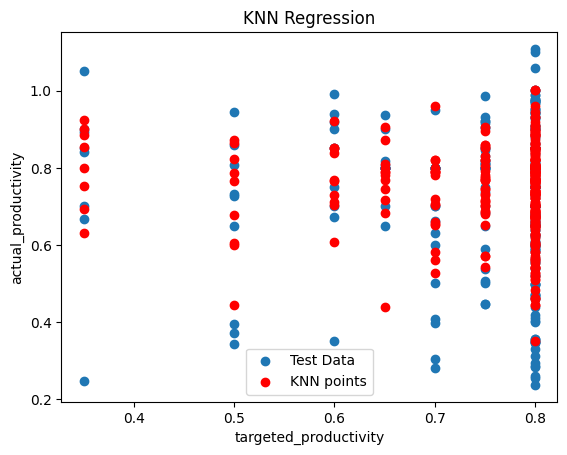

In [ ]:
model2.fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)
print(y_pred2)
knn = pd.DataFrame({'Predicted':y_pred2,'Actual':y_test2})
print(knn)

print(r2_score(y_test2,y_pred2))
print(metrics.mean_absolute_error(y_test2,y_pred2))
print(metrics.mean_squared_error(y_test2,y_pred2))
mse = mean_squared_error(y_test2, y_pred2)
rmse = np.sqrt(mse)
print(rmse)

plt.scatter(data['targeted_productivity'][:len(y_test2)], y_test2, label='Test Data')
plt.scatter(data['targeted_productivity'][:len(y_pred2)], y_pred2, color='red', linewidth=1, label='KNN points')
plt.xlabel('targeted_productivity')
plt.ylabel('actual_productivity')
plt.title('KNN Regression')
plt.legend()
plt.show()

**70-30 Train Test Split**

In [ ]:
model3=KNeighborsRegressor(n_neighbors=5)

[0.90737407 0.82027322 0.61864927 0.70138258 0.80382    0.8376
 0.70138258 0.71011457 0.68506264 0.81111111 0.70604333 0.74515528
 1.00023041 0.76944917 0.90556061 0.76944917 0.66232298 0.43930398
 0.80040196 0.57023611 0.57153333 0.70630451 0.7304785  0.68170083
 0.70312662 0.59978772 0.89765667 0.72114583 0.80040196 0.67392045
 0.88979778 0.73024897 0.85501211 0.77440741 0.85842966 0.6544625
 0.96019485 0.58236836 0.68506264 0.80057823 0.75024553 0.93039919
 0.82026373 0.61808333 0.70005696 0.64685426 0.94409738 0.7780395
 0.75065101 0.80939556 0.84548926 0.51236719 0.76036667 0.82027322
 0.79156222 0.85013677 0.71934557 0.66015709 0.54312917 0.52844444
 0.85931944 0.69094697 0.74041425 0.65522232 0.83008838 0.77224549
 0.80040196 0.83008838 0.73711969 0.62491109 0.73011542 0.76472549
 0.77453333 0.73399764 0.80027469 0.60231667 0.71621212 0.9202369
 0.68817708 0.76817022 0.80554848 0.70005696 0.85013677 0.66105656
 0.58725355 0.70328836 0.88357912 0.67392045 0.79027178 0.645175
 0.7

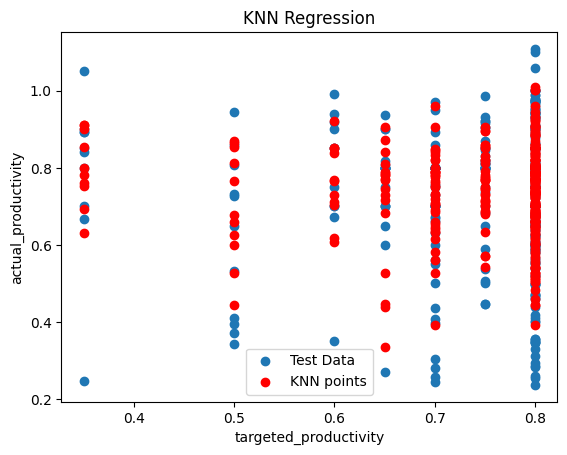

In [ ]:
model3.fit(X_train3, y_train3)
y_pred3 = model3.predict(X_test3)
print(y_pred3)
knn = pd.DataFrame({'Predicted':y_pred3,'Actual':y_test3})
print(knn)

print(r2_score(y_test3,y_pred3))
print(metrics.mean_absolute_error(y_test3,y_pred3))
print(metrics.mean_squared_error(y_test3,y_pred3))
mse = mean_squared_error(y_test3, y_pred3)
rmse = np.sqrt(mse)
print(rmse)

plt.scatter(data['targeted_productivity'][:len(y_test3)], y_test3, label='Test Data')
plt.scatter(data['targeted_productivity'][:len(y_pred3)], y_pred3, color='red', linewidth=1, label='KNN points')
plt.xlabel('targeted_productivity')
plt.ylabel('actual_productivity')
plt.title('KNN Regression')
plt.legend()
plt.show()

**60-40 Train Test Split**

In [ ]:
model4=KNeighborsRegressor(n_neighbors=5)

[0.88470741 0.73027743 0.61864927 0.70138258 0.81651556 0.8376
 0.70138258 0.71011457 0.75508959 0.78391111 0.84101    0.8031986
 1.00023041 0.78115417 0.91296303 0.77982083 0.66232298 0.42962117
 0.80040196 0.57023611 0.57817917 0.77224549 0.7304785  0.76235917
 0.61052437 0.59978772 0.88912    0.72114583 0.80040196 0.66952652
 0.84620056 0.73024897 0.85501211 0.77440741 0.85842966 0.6544625
 0.97020374 0.58236836 0.69968434 0.80057823 0.75024553 0.93039919
 0.82026373 0.61808333 0.74012487 0.74352093 0.92412429 0.81572526
 0.75065101 0.78824    0.84548926 0.51236719 0.77018552 0.84033053
 0.79156222 0.85013677 0.72932055 0.76024159 0.589875   0.52320833
 0.85008333 0.69094697 0.74041425 0.65522232 0.8124596  0.77224549
 0.80040196 0.7559596  0.73711969 0.62491109 0.72012222 0.76472549
 0.84101    0.73399764 0.80027469 0.60110417 0.71181818 0.90428524
 0.84978125 0.76029384 0.80554848 0.73007131 0.85013677 0.73711969
 0.58725355 0.70657169 0.88160571 0.66952652 0.79034287 0.645175
 0.

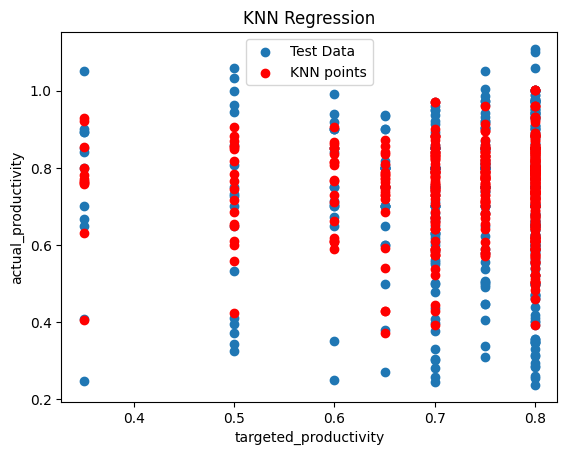

In [ ]:
model4.fit(X_train4, y_train4)
y_pred4 = model4.predict(X_test4)
print(y_pred4)
knn = pd.DataFrame({'Predicted':y_pred4,'Actual':y_test4})
print(knn)

print(r2_score(y_test4,y_pred4))
print(metrics.mean_absolute_error(y_test4,y_pred4))
print(metrics.mean_squared_error(y_test4,y_pred4))
mse = mean_squared_error(y_test4, y_pred4)
rmse = np.sqrt(mse)
print(rmse)

plt.scatter(data['targeted_productivity'][:len(y_test4)], y_test4, label='Test Data')
plt.scatter(data['targeted_productivity'][:len(y_pred4)], y_pred4, color='red', linewidth=1, label='KNN points')
plt.xlabel('targeted_productivity')
plt.ylabel('actual_productivity')
plt.title('KNN Regression')
plt.legend()
plt.show()

# **Support Vector Machine (Before VIF)**


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
model = SVR(kernel='rbf')

**80-20 Train Test Split**

[0.76836116 0.71632748 0.68775895 0.77021112 0.76805896 0.76955713
 0.77021086 0.74286659 0.69474603 0.76838314 0.76950096 0.71615185
 0.73246478 0.76706089 0.76813781 0.7670544  0.74020324 0.69631013
 0.72352684 0.73047287 0.76700378 0.76669303 0.70152213 0.76709235
 0.70659329 0.68859611 0.76951183 0.76698406 0.7235276  0.77017767
 0.77016693 0.68925902 0.74104717 0.70780834 0.72362234 0.76698773
 0.72832696 0.73718618 0.70177235 0.74739764 0.74081808 0.74475918
 0.71990989 0.76702083 0.70801678 0.81934682 0.7306604  0.72241472
 0.72220309 0.76838523 0.76269073 0.68949011 0.71398997 0.71710298
 0.76810596 0.74634904 0.68669564 0.70702456 0.76698532 0.73035407
 0.77017739 0.77019508 0.70323845 0.73389525 0.76282978 0.76672696
 0.7235271  0.76272172 0.74149998 0.68828641 0.74422948 0.70051781
 0.76947995 0.71166517 0.71976649 0.76699966 0.77017877 0.72287267
 0.76699963 0.73300583 0.75002141 0.70983838 0.74634174 0.73884155
 0.70041136 0.76998612 0.77343307 0.77017767 0.70283638 0.7669

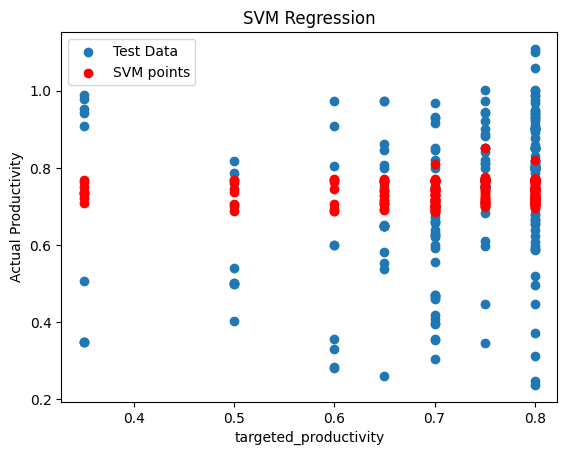

In [ ]:
model.fit(X_train1, y_train1)
y_pred1= model.predict(X_test1)
print(y_pred1)
svm = pd.DataFrame({'Predicted':y_pred1,'Actual':y_test1})
print(svm)

print(r2_score(y_test1,y_pred1))
print(metrics.mean_absolute_error(y_test1,y_pred1))
print(metrics.mean_squared_error(y_test1,y_pred1))
mse = mean_squared_error(y_test1, y_pred1)
rmse = np.sqrt(mse)
print(rmse)
mape = mean_absolute_percentage_error(y_test1, y_pred1)
print(mape)
mape = mape * 100
print(mape)

plt.scatter(X_test1['targeted_productivity'], y_test1, label='Test Data')
plt.scatter(X_test1['targeted_productivity'], y_pred1, color='red', linewidth=1, label='SVM points')
plt.xlabel('targeted_productivity')
plt.ylabel('Actual Productivity')
plt.title('SVM Regression')
plt.legend()
plt.show()

**75-25 Train Test Split**

In [ ]:
model2 = SVR(kernel='rbf')

[0.7688513  0.71676232 0.69155381 0.77232747 0.77173982 0.77058267
 0.77232739 0.74507889 0.70014835 0.76887312 0.77053157 0.723404
 0.7323492  0.76700159 0.77181411 0.76699486 0.74260019 0.69744351
 0.73023188 0.73789991 0.76694939 0.77085458 0.7037121  0.7670311
 0.7124029  0.69271391 0.77053918 0.76692949 0.73023233 0.77229652
 0.77228608 0.69112227 0.74820222 0.70933867 0.72378044 0.76693451
 0.72835547 0.7397495  0.70699521 0.74928861 0.74317281 0.74142358
 0.72020336 0.7669655  0.70872622 0.82135315 0.73067213 0.72955166
 0.72915704 0.76887508 0.76775598 0.69053847 0.71448891 0.71751594
 0.7717859  0.74839761 0.68986412 0.7093614  0.76693002 0.7377913
 0.7722953  0.77231247 0.70532323 0.73639607 0.76788543 0.77088638
 0.73023193 0.76778402 0.73798705 0.69061976 0.7463627  0.70152626
 0.77051024 0.71229645 0.72006366 0.7669443  0.77229737 0.72315021
 0.76694433 0.74041069 0.7566331  0.71048911 0.74838997 0.73518336
 0.70402329 0.77156635 0.77616429 0.77229652 0.70551932 0.76692825

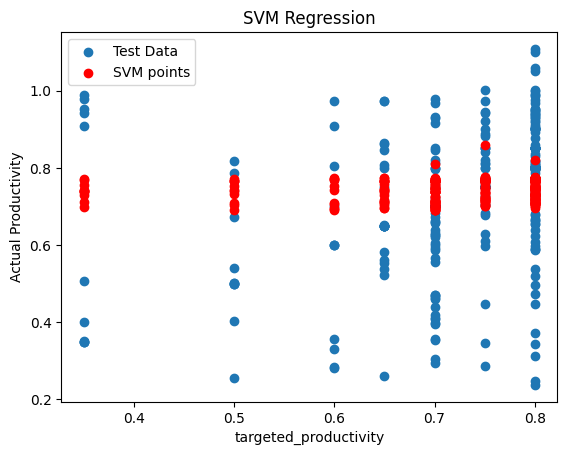

In [ ]:
model2.fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)
print(y_pred2)
svm = pd.DataFrame({'Predicted':y_pred2,'Actual':y_test2})
print(svm)

print(r2_score(y_test2,y_pred2))
print(metrics.mean_absolute_error(y_test2,y_pred2))
print(mean_squared_error(y_test2,y_pred2))
mse = mean_squared_error(y_test2, y_pred2)
mse = mean_squared_error(y_test2, y_pred2)
print(rmse)
mape = mean_absolute_percentage_error(y_test2, y_pred2)
print(mape)
mape = mape * 100
print(mape)

plt.scatter(X_test2['targeted_productivity'], y_test2, label='Test Data')
plt.scatter(X_test2['targeted_productivity'], y_pred2, color='red', linewidth=1, label='SVM points')
plt.xlabel('targeted_productivity')
plt.ylabel('Actual Productivity')
plt.title('SVM Regression')
plt.legend()
plt.show()

**70-30 Train Test Split**

In [ ]:
model3 = SVR(kernel='rbf')

[0.90737407 0.82027322 0.61864927 0.70138258 0.80382    0.8376
 0.70138258 0.71011457 0.68506264 0.81111111 0.70604333 0.74515528
 1.00023041 0.76944917 0.90556061 0.76944917 0.66232298 0.43930398
 0.80040196 0.57023611 0.57153333 0.70630451 0.7304785  0.68170083
 0.70312662 0.59978772 0.89765667 0.72114583 0.80040196 0.67392045
 0.88979778 0.73024897 0.85501211 0.77440741 0.85842966 0.6544625
 0.96019485 0.58236836 0.68506264 0.80057823 0.75024553 0.93039919
 0.82026373 0.61808333 0.70005696 0.64685426 0.94409738 0.7780395
 0.75065101 0.80939556 0.84548926 0.51236719 0.76036667 0.82027322
 0.79156222 0.85013677 0.71934557 0.66015709 0.54312917 0.52844444
 0.85931944 0.69094697 0.74041425 0.65522232 0.83008838 0.77224549
 0.80040196 0.83008838 0.73711969 0.62491109 0.73011542 0.76472549
 0.77453333 0.73399764 0.80027469 0.60231667 0.71621212 0.9202369
 0.68817708 0.76817022 0.80554848 0.70005696 0.85013677 0.66105656
 0.58725355 0.70328836 0.88357912 0.67392045 0.79027178 0.645175
 0.7

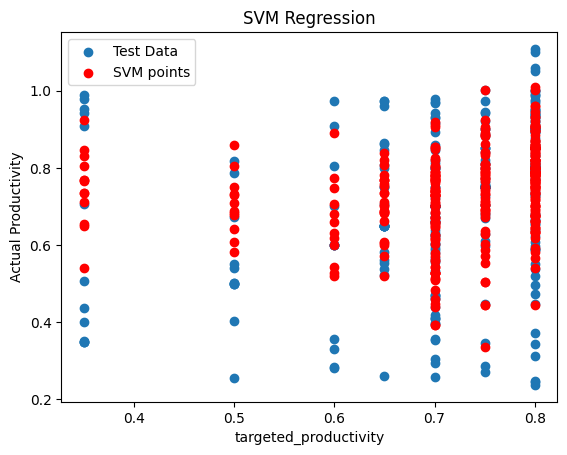

In [ ]:
model3.fit(X_train3, y_train3)
model3.fit(X_train3, y_train3)
print(y_pred3)
svm = pd.DataFrame({'Predicted':y_pred3,'Actual':y_test3})
print(svm)

print(r2_score(y_test3,y_pred3))
print(metrics.mean_absolute_error(y_test3,y_pred3))
print(mean_squared_error(y_test3,y_pred3))
mse = mean_squared_error(y_test3, y_pred3)
rmse = np.sqrt(mse)
print(rmse)
mape = mean_absolute_percentage_error(y_test3, y_pred3)
print(mape)
mape = mape * 100
print(mape)

plt.scatter(X_test3['targeted_productivity'], y_test3, label='Test Data')
plt.scatter(X_test3['targeted_productivity'], y_pred3, color='red', linewidth=1, label='SVM points')
plt.xlabel('targeted_productivity')
plt.ylabel('Actual Productivity')
plt.title('SVM Regression')
plt.legend()
plt.show()

**60-40 Train Test Split**

In [ ]:
model4 = SVR(kernel='rbf')

[0.77337344 0.71604434 0.71134523 0.77261121 0.77028794 0.77338634
 0.77261147 0.7391352  0.72125592 0.77338899 0.77334163 0.73872761
 0.72899617 0.77346943 0.77034444 0.77346418 0.73573658 0.69996622
 0.74630571 0.74787608 0.77342383 0.76929593 0.71728166 0.77349386
 0.7320305  0.71312802 0.77335138 0.77340926 0.74630592 0.77258602
 0.77258267 0.70255102 0.75406366 0.71920301 0.718738   0.77341194
 0.72567134 0.73335285 0.72720132 0.74408628 0.73622585 0.77560325
 0.71576481 0.77343737 0.70622321 0.88156205 0.72921807 0.74437899
 0.74472359 0.77339033 0.76670882 0.6914635  0.71256306 0.71666177
 0.7703235  0.74059532 0.707925   0.72331088 0.77341161 0.74778419
 0.77259072 0.77259878 0.71874406 0.72099192 0.76681292 0.76932213
 0.74630553 0.76673119 0.77127051 0.70493737 0.74022574 0.6995156
 0.77332569 0.71310211 0.71565026 0.77342194 0.77258661 0.72294786
 0.77342209 0.74916393 0.759313   0.70770942 0.740589   0.7677002
 0.72240826 0.77299089 0.775972   0.77258602 0.72095153 0.773408

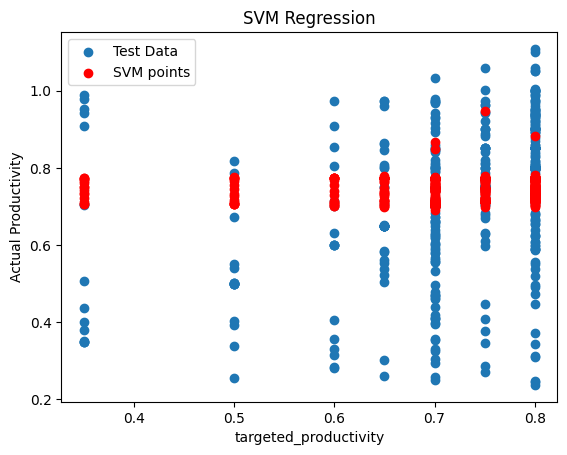

In [ ]:
model4.fit(X_train4, y_train4)
y_pred4 = model4.predict(X_test4)
print(y_pred4)
svm = pd.DataFrame({'Predicted':y_pred4,'Actual':y_test4})
print(svm)

print(r2_score(y_test4,y_pred4))
print(metrics.mean_absolute_error(y_test4,y_pred4))
print(mean_squared_error(y_test4,y_pred4))
mse = mean_squared_error(y_test4, y_pred4)
rmse = np.sqrt(mse)
print(rmse)
mape = mean_absolute_percentage_error(y_test4, y_pred4)
print(mape)
mape = mape * 100
print(mape)

plt.scatter(X_test4['targeted_productivity'], y_test4, label='Test Data')
plt.scatter(X_test4['targeted_productivity'], y_pred4, color='red', linewidth=1, label='SVM points')
plt.xlabel('targeted_productivity')
plt.ylabel('Actual Productivity')
plt.title('SVM Regression')
plt.legend()
plt.show()

# **Decision Tree (Before VIF)**

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
clf = DecisionTreeRegressor()

**80-20 Train Test Split**

In [ ]:
clf = clf.fit(X_train1,y_train1)
y_pred1 = clf.predict(X_test1)
print("R-squared:", metrics.r2_score(y_test1, y_pred1))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test1, y_pred1))
print("Mean Squared Error:", metrics.mean_squared_error(y_test1, y_pred1))
clf = DecisionTreeRegressor(criterion="absolute_error", max_depth=3)

clf = clf.fit(X_train1,y_train1)
y_pred1 = clf.predict(X_test1)
print("R-squared:", metrics.r2_score(y_test1, y_pred1))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test1, y_pred1))
print("Mean Squared Error:", metrics.mean_squared_error(y_test1, y_pred1))
clf = DecisionTreeRegressor(criterion="absolute_error", max_depth=2)

clf = clf.fit(X_train1,y_train1)
y_pred1 = clf.predict(X_test1)
print("R-squared:", metrics.r2_score(y_test1, y_pred1))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test1, y_pred1))
print("Mean Squared Error:", metrics.mean_squared_error(y_test1, y_pred1))
clf = DecisionTreeRegressor(criterion="absolute_error", max_depth=3)

clf = clf.fit(X_train1,y_train1)
y_pred1 = clf.predict(X_test1)
print("R-squared:", metrics.r2_score(y_test1, y_pred1))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test1, y_pred1))
print("Mean Squared Error:", metrics.mean_squared_error(y_test1, y_pred1))
clf = DecisionTreeRegressor(criterion="absolute_error", max_depth=6)

clf = clf.fit(X_train1,y_train1)
y_pred1 = clf.predict(X_test1)
print("R-squared:", metrics.r2_score(y_test1, y_pred1))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test1, y_pred1))
print("Mean Squared Error:", metrics.mean_squared_error(y_test1, y_pred1))
clf = DecisionTreeRegressor(criterion="absolute_error", max_depth=3)

clf = clf.fit(X_train1,y_train1)
y_pred1 = clf.predict(X_test1)
print("R-squared:", metrics.r2_score(y_test1, y_pred1))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test1, y_pred1))
print("Mean Squared Error:", metrics.mean_squared_error(y_test1, y_pred1))

y_pred_train1 = clf.predict(X_train1)
print("R-squared:", metrics.r2_score(y_test1, y_pred1))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test1, y_pred1))
print("Mean Squared Error:", metrics.mean_squared_error(y_test1, y_pred1))

R-squared: -0.06894992586822268
Mean Absolute Error: 0.10799920061249998
Mean Squared Error: 0.03423824474540885
R-squared: 0.2924813385670959
Mean Absolute Error: 0.10117208392083335
Mean Squared Error: 0.022661676198170323
R-squared: 0.14921419970999572
Mean Absolute Error: 0.11234174155624999
Mean Squared Error: 0.027250492985055597
R-squared: 0.2924813385670959
Mean Absolute Error: 0.10117208392083335
Mean Squared Error: 0.022661676198170323
R-squared: 0.30995137985306886
Mean Absolute Error: 0.09033685129791666
Mean Squared Error: 0.022102114393836303
R-squared: 0.2924813385670959
Mean Absolute Error: 0.10117208392083335
Mean Squared Error: 0.022661676198170323
R-squared: 0.2924813385670959
Mean Absolute Error: 0.10117208392083335
Mean Squared Error: 0.022661676198170323


**75-25 Train Test Split**

In [ ]:
clf2 = DecisionTreeRegressor(criterion="absolute_error", max_depth=3)

In [ ]:
clf2 = clf2.fit(X_train2,y_train2)
y_pred2 = clf2.predict(X_test2)
print("R-squared:", metrics.r2_score(y_test2, y_pred2))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test2, y_pred2))
print("Mean Squared Error:", metrics.mean_squared_error(y_test2, y_pred2))
clf2 = DecisionTreeRegressor(criterion="absolute_error", max_depth=3)

clf2 = clf2.fit(X_train2,y_train2)
y_pred2 = clf2.predict(X_test2)
print("R-squared:", metrics.r2_score(y_test2, y_pred2))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test2, y_pred2))
print("Mean Squared Error:", metrics.mean_squared_error(y_test2, y_pred2))
clf2 = DecisionTreeRegressor(criterion="absolute_error", max_depth=2)

clf2 = clf2.fit(X_train2,y_train2)
y_pred2 = clf2.predict(X_test2)
print("R-squared:", metrics.r2_score(y_test2, y_pred2))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test2, y_pred2))
print("Mean Squared Error:", metrics.mean_squared_error(y_test2, y_pred2))
clf2 = DecisionTreeRegressor(criterion="absolute_error", max_depth=3)

clf2 = clf2.fit(X_train2,y_train2)
y_pred = clf2.predict(X_test2)
print("R-squared:", metrics.r2_score(y_test2, y_pred2))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test2, y_pred2))
print("Mean Squared Error:", metrics.mean_squared_error(y_test2, y_pred2))
clf2 = DecisionTreeRegressor(criterion="absolute_error", max_depth=6)

clf2 = clf2.fit(X_train2,y_train2)
y_pred2 = clf2.predict(X_test2)
print("R-squared:", metrics.r2_score(y_test2, y_pred2))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test2, y_pred2))
print("Mean Squared Error:", metrics.mean_squared_error(y_test2, y_pred2))
clf2 = DecisionTreeRegressor(criterion="absolute_error", max_depth=3)

clf2 = clf2.fit(X_train2,y_train2)
y_pred2 = clf2.predict(X_test2)
print("R-squared:", metrics.r2_score(y_test2, y_pred2))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test2, y_pred2))
print("Mean Squared Error:", metrics.mean_squared_error(y_test2, y_pred2))

y_pred_train2 = clf2.predict(X_train2)
print("R-squared:", metrics.r2_score(y_test2, y_pred2))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test2, y_pred2))
print("Mean Squared Error:", metrics.mean_squared_error(y_test2, y_pred2))

R-squared: 0.2692283664436018
Mean Absolute Error: 0.10278943963666665
Mean Squared Error: 0.023786782080486114
R-squared: 0.2692283664436018
Mean Absolute Error: 0.10278943963666665
Mean Squared Error: 0.023786782080486114
R-squared: 0.1622780752542704
Mean Absolute Error: 0.11253987552833332
Mean Squared Error: 0.02726803826661423
R-squared: 0.1622780752542704
Mean Absolute Error: 0.11253987552833332
Mean Squared Error: 0.02726803826661423
R-squared: 0.24536999519449743
Mean Absolute Error: 0.09533528401166666
Mean Squared Error: 0.024563377464923656
R-squared: 0.2692283664436018
Mean Absolute Error: 0.10278943963666665
Mean Squared Error: 0.023786782080486114
R-squared: 0.2692283664436018
Mean Absolute Error: 0.10278943963666665
Mean Squared Error: 0.023786782080486114


**70-30 Train Test Split**

In [ ]:
clf3 = DecisionTreeRegressor(criterion="absolute_error", max_depth=3)

In [ ]:
clf3 = clf3.fit(X_train3,y_train3)
y_pred3 = clf3.predict(X_test3)
print("R-squared:", metrics.r2_score(y_test3, y_pred3))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test3, y_pred3))
print("Mean Squared Error:", metrics.mean_squared_error(y_test3, y_pred3))
clf3 = DecisionTreeRegressor(criterion="absolute_error", max_depth=3)

clf3 = clf3.fit(X_train3,y_train3)
y_pred3 = clf3.predict(X_test3)
print("R-squared:", metrics.r2_score(y_test3, y_pred3))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test3, y_pred3))
print("Mean Squared Error:", metrics.mean_squared_error(y_test3, y_pred3))
clf3 = DecisionTreeRegressor(criterion="absolute_error", max_depth=2)

clf3 = clf3.fit(X_train3,y_train3)
y_pred3 = clf3.predict(X_test3)
print("R-squared:", metrics.r2_score(y_test3, y_pred3))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test3, y_pred3))
print("Mean Squared Error:", metrics.mean_squared_error(y_test3, y_pred3))
clf3 = DecisionTreeRegressor(criterion="absolute_error", max_depth=3)

clf3 = clf3.fit(X_train3,y_train3)
y_pred3 = clf3.predict(X_test3)
print("R-squared:", metrics.r2_score(y_test3, y_pred3))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test3, y_pred3))
print("Mean Squared Error:", metrics.mean_squared_error(y_test3, y_pred3))
clf3 = DecisionTreeRegressor(criterion="absolute_error", max_depth=6)

clf3 = clf3.fit(X_train3,y_train3)
y_pred3 = clf3.predict(X_test3)
print("R-squared:", metrics.r2_score(y_test3, y_pred3))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test3, y_pred3))
print("Mean Squared Error:", metrics.mean_squared_error(y_test3, y_pred3))
clf3 = DecisionTreeRegressor(criterion="absolute_error", max_depth=3)

clf3 = clf3.fit(X_train3,y_train3)
y_pred3 = clf3.predict(X_test3)
print("R-squared:", metrics.r2_score(y_test3, y_pred3))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test3, y_pred3))
print("Mean Squared Error:", metrics.mean_squared_error(y_test3, y_pred3))

y_pred_train3 = clf3.predict(X_train3)
print("R-squared:", metrics.r2_score(y_test3, y_pred3))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test3, y_pred3))
print("Mean Squared Error:", metrics.mean_squared_error(y_test3, y_pred3))

R-squared: 0.2608558727369542
Mean Absolute Error: 0.10000417161805555
Mean Squared Error: 0.023377803845135152
R-squared: 0.2608558727369542
Mean Absolute Error: 0.10000417161805555
Mean Squared Error: 0.023377803845135152
R-squared: 0.15580431780788928
Mean Absolute Error: 0.10895730927916666
Mean Squared Error: 0.026700396224853984
R-squared: 0.2608558727369542
Mean Absolute Error: 0.10000417161805555
Mean Squared Error: 0.023377803845135152
R-squared: 0.2617673347152002
Mean Absolute Error: 0.09007866718333334
Mean Squared Error: 0.023348975936539527
R-squared: 0.2608558727369542
Mean Absolute Error: 0.10000417161805555
Mean Squared Error: 0.023377803845135152
R-squared: 0.2608558727369542
Mean Absolute Error: 0.10000417161805555
Mean Squared Error: 0.023377803845135152


**60-40 Train Test Split**

In [ ]:
clf4 = DecisionTreeRegressor(criterion="absolute_error", max_depth=3)

In [ ]:
clf4 = clf4.fit(X_train4,y_train4)
y_pred4 = clf4.predict(X_test4)
print("R-squared:", metrics.r2_score(y_test4, y_pred4))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test4, y_pred4))
print("Mean Squared Error:", metrics.mean_squared_error(y_test4, y_pred4))
clf4 = DecisionTreeRegressor(criterion="absolute_error", max_depth=3)

clf4 = clf4.fit(X_train4,y_train4)
y_pred4 = clf4.predict(X_test4)
print("R-squared:", metrics.r2_score(y_test4, y_pred4))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test4, y_pred4))
print("Mean Squared Error:", metrics.mean_squared_error(y_test4, y_pred4))
clf4 = DecisionTreeRegressor(criterion="absolute_error", max_depth=2)

clf4 = clf4.fit(X_train4,y_train4)
y_pred4 = clf4.predict(X_test4)
print("R-squared:", metrics.r2_score(y_test4, y_pred4))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test4, y_pred4))
print("Mean Squared Error:", metrics.mean_squared_error(y_test4, y_pred4))
clf4 = DecisionTreeRegressor(criterion="absolute_error", max_depth=3)

clf4 = clf4.fit(X_train4,y_train4)
y_pred4 = clf4.predict(X_test4)
print("R-squared:", metrics.r2_score(y_test4, y_pred4))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test4, y_pred4))
print("Mean Squared Error:", metrics.mean_squared_error(y_test4, y_pred4))
clf4 = DecisionTreeRegressor(criterion="absolute_error", max_depth=6)

clf4 = clf4.fit(X_train4,y_train4)
y_pred4 = clf4.predict(X_test4)
print("R-squared:", metrics.r2_score(y_test4, y_pred4))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test4 ,y_pred4))
print("Mean Squared Error:", metrics.mean_squared_error(y_test4 ,y_pred4))
clf4 = DecisionTreeRegressor(criterion="absolute_error", max_depth=3)

clf4 = clf4.fit(X_train4,y_train4)
y_pred4 = clf4.predict(X_test4)
print("R-squared:", metrics.r2_score(y_test4, y_pred4))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test4, y_pred4))
print("Mean Squared Error:", metrics.mean_squared_error(y_test4, y_pred4))

y_pred_train4 = clf4.predict(X_train4)
print("R-squared:", metrics.r2_score(y_test4, y_pred4))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test4, y_pred4))
print("Mean Squared Error:", metrics.mean_squared_error(y_test4, y_pred4))

R-squared: 0.2620312575438495
Mean Absolute Error: 0.10119611003653443
Mean Squared Error: 0.02378869906342073
R-squared: 0.2620312575438495
Mean Absolute Error: 0.10119611003653443
Mean Squared Error: 0.02378869906342073
R-squared: 0.1862095621468729
Mean Absolute Error: 0.11066648636534447
Mean Squared Error: 0.02623283983864361
R-squared: 0.2620312575438495
Mean Absolute Error: 0.10119611003653443
Mean Squared Error: 0.02378869906342073
R-squared: 0.20382164171032124
Mean Absolute Error: 0.09329081229645095
Mean Squared Error: 0.02566510785148456
R-squared: 0.2620312575438495
Mean Absolute Error: 0.10119611003653443
Mean Squared Error: 0.02378869906342073
R-squared: 0.2620312575438495
Mean Absolute Error: 0.10119611003653443
Mean Squared Error: 0.02378869906342073


# **Boosting**

**80-20 Train Test Split**

In [ ]:
!pip install xgboost
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Check for duplicated column names in X_train1
duplicate_columns = X_train1.columns[X_train1.columns.duplicated()]

# If there are duplicated columns, print them and handle them appropriately
if len(duplicate_columns) > 0:
    print("Duplicated columns in X_train1:", duplicate_columns)
    # Option 1: Rename the duplicated columns
    # X_train1 = X_train1.loc[:,~X_train1.columns.duplicated()]
    # Option 2: Drop the duplicated columns
    X_train1 = X_train1.loc[:, ~X_train1.columns.duplicated(keep='first')]
    # Or any other preferred method of handling duplicates

# Now proceed with model training
model1 = xgb.XGBRegressor()
model2 = xgb.XGBRegressor(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

train_model1 = model1.fit(X_train1, y_train1)
train_model2 = model2.fit(X_train1, y_train1)

Duplicated columns in X_train1: Index(['department_finishing'], dtype='object')


In [ ]:
#prediction and Regression Report
X_test1 = X_test1.loc[:, ~X_test1.columns.duplicated(keep='first')]

pred1 = train_model1.predict(X_test1)
pred2 = train_model2.predict(X_test1)

# Evaluate the models using regression metrics
mse1 = mean_squared_error(y_test1, pred1)
r2_1 = r2_score(y_test1, pred1)
mae1 = mean_absolute_error(y_test1, pred1)

mse2 = mean_squared_error(y_test1, pred2)
r2_2 = r2_score(y_test1, pred2)
mae2 = mean_absolute_error(y_test1, pred2)


print(f'Model 1 XGboost Report:\n MSE: {mse1:.4f}, R-squared: {r2_1:.4f}, MAE: {mae1:.4f}')
print(f'Model 2 XGboost Report:\n MSE: {mse2:.4f}, R-squared: {r2_2:.4f}, MAE: {mae2:.4f}')

Model 1 XGboost Report:
 MSE: 0.0181, R-squared: 0.4359, MAE: 0.0832
Model 2 XGboost Report:
 MSE: 0.0194, R-squared: 0.3953, MAE: 0.0864


In [ ]:
model3 = xgb.XGBRegressor()
train_model3 = model3.fit(X_train1, y_train1)
pred3 = train_model3.predict(X_test1)
mse3 = mean_squared_error(y_test1, pred1)
r2_3 = r2_score(y_test1, pred1)
mae3 = mean_absolute_error(y_test1, pred1)
print(f'Model 3 XGboost Report:\n MSE: {mse3:.4f}, R-squared: {r2_3:.4f}, MAE: {mae3:.4f}')

Model 3 XGboost Report:
 MSE: 0.0181, R-squared: 0.4359, MAE: 0.0832


In [ ]:
xgb2 = xgb.XGBRegressor(
 learning_rate =0.7,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:squarederror',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

train_model7 = xgb2.fit(X_train1, y_train1)
pred7 = train_model7.predict(X_test1)
mse7 = mean_squared_error(y_test1, pred7)
r2_7 = r2_score(y_test1, pred7)
mae7 = mean_absolute_error(y_test1, pred7)
print(f'Model 7 XGboost Report:\n MSE: {mse7:.4f}, R-squared: {r2_7:.4f}, MAE: {mae7:.4f}')

Model 7 XGboost Report:
 MSE: 0.0263, R-squared: 0.1780, MAE: 0.1057


In [ ]:
#Let's train a fast RandomForest on the dataset
rfc = RandomForestRegressor()
rfc_model = rfc.fit(X_train1, y_train1)
pred8 = rfc_model.predict(X_test1)
mse8 = mean_squared_error(y_test1, pred8)
r2_8 = r2_score(y_test1, pred8)
mae8 = mean_absolute_error(y_test1, pred8)
print(f'Model 8 Random Forest Report:\n MSE: {mse8:.4f}, R-squared: {r2_8:.4f}, MAE: {mae8:.4f}')

Model 8 Random Forest Report:
 MSE: 0.0177, R-squared: 0.4476, MAE: 0.0824


**75-25 Train Test Split**

In [ ]:
# Check for duplicated column names in X_train1
duplicate_columns = X_train2.columns[X_train2.columns.duplicated()]

# If there are duplicated columns, print them and handle them appropriately
if len(duplicate_columns) > 0:
    print("Duplicated columns in X_train2:", duplicate_columns)

    X_train2 = X_train2.loc[:, ~X_train2.columns.duplicated(keep='first')]
    # Or any other preferred method of handling duplicates

# Now proceed with model training
model1 = xgb.XGBRegressor()
model2 = xgb.XGBRegressor(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

train_model1 = model1.fit(X_train2, y_train2)
train_model2 = model2.fit(X_train2, y_train2)

Duplicated columns in X_train2: Index(['department_finishing'], dtype='object')


In [ ]:
#prediction and Regression Report
X_test2 = X_test2.loc[:, ~X_test2.columns.duplicated(keep='first')]
pred1 = train_model1.predict(X_test2)
pred2 = train_model2.predict(X_test2)

# Evaluate the models using regression metrics
mse1 = mean_squared_error(y_test2, pred1)
r2_1 = r2_score(y_test2, pred1)
mae1 = mean_absolute_error(y_test2, pred1)

mse2 = mean_squared_error(y_test2, pred2)
r2_2 = r2_score(y_test2, pred2)
mae2 = mean_absolute_error(y_test2, pred2)


print(f'Model 1 XGboost Report:\n MSE: {mse1:.4f}, R-squared: {r2_1:.4f}, MAE: {mae1:.4f}')
print(f'Model 2 XGboost Report:\n MSE: {mse2:.4f}, R-squared: {r2_2:.4f}, MAE: {mae2:.4f}')

Model 1 XGboost Report:
 MSE: 0.0188, R-squared: 0.4230, MAE: 0.0844
Model 2 XGboost Report:
 MSE: 0.0195, R-squared: 0.3999, MAE: 0.0858


In [ ]:
model3 = xgb.XGBRegressor()
train_model3 = model3.fit(X_train2, y_train2)
pred3 = train_model3.predict(X_test2)
mse3 = mean_squared_error(y_test2, pred1)
r2_3 = r2_score(y_test2, pred1)
mae3 = mean_absolute_error(y_test2, pred1)
print(f'Model 3 XGboost Report:\n MSE: {mse3:.4f}, R-squared: {r2_3:.4f}, MAE: {mae3:.4f}')

Model 3 XGboost Report:
 MSE: 0.0188, R-squared: 0.4230, MAE: 0.0844


In [ ]:
xgb2 = xgb.XGBRegressor(
 learning_rate =0.7,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:squarederror',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

train_model7 = xgb2.fit(X_train2, y_train2)
pred7 = train_model7.predict(X_test2)
mse7 = mean_squared_error(y_test2, pred7)
r2_7 = r2_score(y_test2, pred7)
mae7 = mean_absolute_error(y_test2, pred7)
print(f'Model 7 XGboost Report:\n MSE: {mse7:.4f}, R-squared: {r2_7:.4f}, MAE: {mae7:.4f}')

Model 7 XGboost Report:
 MSE: 0.0287, R-squared: 0.1187, MAE: 0.1087


In [ ]:
#Let's train a fast RandomForest on the dataset

rfc = RandomForestRegressor()
rfc_model = rfc.fit(X_train2, y_train2)
pred8 = rfc_model.predict(X_test2)
mse8 = mean_squared_error(y_test2, pred8)
r2_8 = r2_score(y_test2, pred8)
mae8 = mean_absolute_error(y_test2, pred8)
print(f'Model 8 Random Forest Report:\n MSE: {mse8:.4f}, R-squared: {r2_8:.4f}, MAE: {mae8:.4f}')

Model 8 Random Forest Report:
 MSE: 0.0181, R-squared: 0.4446, MAE: 0.0813


**70-30 Train Test Split**

In [ ]:
# Check for duplicated column names in X_train1
duplicate_columns = X_train3.columns[X_train3.columns.duplicated()]

# If there are duplicated columns, print them and handle them appropriately
if len(duplicate_columns) > 0:
    print("Duplicated columns in X_train3:", duplicate_columns)

    X_train3 = X_train3.loc[:, ~X_train3.columns.duplicated(keep='first')]
    # Or any other preferred method of handling duplicates

# Now proceed with model training
model1 = xgb.XGBRegressor()
model2 = xgb.XGBRegressor(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

train_model1 = model1.fit(X_train3, y_train3)
train_model2 = model2.fit(X_train3, y_train3)

Duplicated columns in X_train3: Index(['department_finishing'], dtype='object')


In [ ]:
#prediction and Regression Report
X_test3 = X_test3.loc[:, ~X_test3.columns.duplicated(keep='first')]
pred1 = train_model1.predict(X_test3)
pred2 = train_model2.predict(X_test3)

# Evaluate the models using regression metrics
mse1 = mean_squared_error(y_test3, pred1)
r2_1 = r2_score(y_test3, pred1)
mae1 = mean_absolute_error(y_test3, pred1)

mse2 = mean_squared_error(y_test3, pred2)
r2_2 = r2_score(y_test3, pred2)
mae2 = mean_absolute_error(y_test3, pred2)


print(f'Model 1 XGboost Report:\n MSE: {mse1:.4f}, R-squared: {r2_1:.4f}, MAE: {mae1:.4f}')
print(f'Model 2 XGboost Report:\n MSE: {mse2:.4f}, R-squared: {r2_2:.4f}, MAE: {mae2:.4f}')

Model 1 XGboost Report:
 MSE: 0.0189, R-squared: 0.4026, MAE: 0.0846
Model 2 XGboost Report:
 MSE: 0.0184, R-squared: 0.4189, MAE: 0.0830


In [ ]:
model3 = xgb.XGBRegressor()
train_model3 = model3.fit(X_train3, y_train3)
pred3 = train_model3.predict(X_test3)
mse3 = mean_squared_error(y_test3, pred1)
r2_3 = r2_score(y_test3, pred1)
mae3 = mean_absolute_error(y_test3, pred1)
print(f'Model 3 XGboost Report:\n MSE: {mse3:.4f}, R-squared: {r2_3:.4f}, MAE: {mae3:.4f}')

Model 3 XGboost Report:
 MSE: 0.0189, R-squared: 0.4026, MAE: 0.0846


In [ ]:
xgb2 = xgb.XGBRegressor(
 learning_rate =0.7,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:squarederror',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

train_model7 = xgb2.fit(X_train3, y_train3)
pred7 = train_model7.predict(X_test3)
mse7 = mean_squared_error(y_test3, pred7)
r2_7 = r2_score(y_test3, pred7)
mae7 = mean_absolute_error(y_test3, pred7)
print(f'Model 7 XGboost Report:\n MSE: {mse7:.4f}, R-squared: {r2_7:.4f}, MAE: {mae7:.4f}')

Model 7 XGboost Report:
 MSE: 0.0286, R-squared: 0.0958, MAE: 0.1147


In [ ]:
#Let's train a fast RandomForest on the dataset
rfc = RandomForestRegressor()
rfc_model = rfc.fit(X_train3, y_train3)
pred8 = rfc_model.predict(X_test3)
mse8 = mean_squared_error(y_test3, pred8)
r2_8 = r2_score(y_test3, pred8)
mae8 = mean_absolute_error(y_test3, pred8)
print(f'Model 8 Random Forest Report:\n MSE: {mse8:.4f}, R-squared: {r2_8:.4f}, MAE: {mae8:.4f}')

Model 8 Random Forest Report:
 MSE: 0.0187, R-squared: 0.4102, MAE: 0.0816


**60-40 Train Test Split**

In [ ]:
# Check for duplicated column names in X_train1
duplicate_columns = X_train4.columns[X_train4.columns.duplicated()]

# If there are duplicated columns, print them and handle them appropriately
if len(duplicate_columns) > 0:
    print("Duplicated columns in X_train4:", duplicate_columns)

    X_train4 = X_train4.loc[:, ~X_train4.columns.duplicated(keep='first')]
    # Or any other preferred method of handling duplicates

# Now proceed with model training
model1 = xgb.XGBRegressor()
model2 = xgb.XGBRegressor(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

train_model1 = model1.fit(X_train4, y_train4)
train_model2 = model2.fit(X_train4, y_train4)

Duplicated columns in X_train4: Index(['department_finishing'], dtype='object')


In [ ]:
#prediction and Regression Report
X_test4 = X_test4.loc[:, ~X_test4.columns.duplicated(keep='first')]
pred1 = train_model1.predict(X_test4)
pred2 = train_model2.predict(X_test4)

# Evaluate the models using regression metrics
mse1 = mean_squared_error(y_test4, pred1)
r2_1 = r2_score(y_test4, pred1)
mae1 = mean_absolute_error(y_test4, pred1)

mse2 = mean_squared_error(y_test4, pred2)
r2_2 = r2_score(y_test4, pred2)
mae2 = mean_absolute_error(y_test4, pred2)


print(f'Model 1 XGboost Report:\n MSE: {mse1:.4f}, R-squared: {r2_1:.4f}, MAE: {mae1:.4f}')
print(f'Model 2 XGboost Report:\n MSE: {mse2:.4f}, R-squared: {r2_2:.4f}, MAE: {mae2:.4f}')

Model 1 XGboost Report:
 MSE: 0.0194, R-squared: 0.3985, MAE: 0.0842
Model 2 XGboost Report:
 MSE: 0.0197, R-squared: 0.3879, MAE: 0.0848


In [ ]:
model3 = xgb.XGBRegressor()
train_model3 = model3.fit(X_train4, y_train4)
pred3 = train_model3.predict(X_test4)
mse3 = mean_squared_error(y_test4, pred1)
r2_3 = r2_score(y_test4, pred1)
mae3 = mean_absolute_error(y_test4, pred1)
print(f'Model 3 XGboost Report:\n MSE: {mse3:.4f}, R-squared: {r2_3:.4f}, MAE: {mae3:.4f}')

Model 3 XGboost Report:
 MSE: 0.0194, R-squared: 0.3985, MAE: 0.0842


In [ ]:
xgb2 = xgb.XGBRegressor(
 learning_rate =0.7,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:squarederror',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

train_model7 = xgb2.fit(X_train4, y_train4)
pred7 = train_model7.predict(X_test4)
mse7 = mean_squared_error(y_test4, pred7)
r2_7 = r2_score(y_test4, pred7)
mae7 = mean_absolute_error(y_test4, pred7)
print(f'Model 7 XGboost Report:\n MSE: {mse7:.4f}, R-squared: {r2_7:.4f}, MAE: {mae7:.4f}')

Model 7 XGboost Report:
 MSE: 0.0302, R-squared: 0.0621, MAE: 0.1137


In [ ]:
#Let's train a fast RandomForest on the dataset

rfc = RandomForestRegressor()
rfc_model = rfc.fit(X_train4, y_train4)
pred8 = rfc_model.predict(X_test4)
mse8 = mean_squared_error(y_test4, pred8)
r2_8 = r2_score(y_test4, pred8)
mae8 = mean_absolute_error(y_test4, pred8)
print(f'Model 8 Random Forest Report:\n MSE: {mse8:.4f}, R-squared: {r2_8:.4f}, MAE: {mae8:.4f}')

Model 8 Random Forest Report:
 MSE: 0.0180, R-squared: 0.4406, MAE: 0.0813


# **Adaptive Boosting (Before VIF)**
**80-20 Train Test Split**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

estimator = DecisionTreeRegressor(max_depth=3, random_state=0)
adaboost = AdaBoostRegressor(estimator=estimator,  # Updated parameter name
                              n_estimators=3,
                              random_state=0)
adaboost.fit(X_train1, y_train1)
print(r2_score(y_test1,y_pred1))
print(metrics.mean_absolute_error(y_test1,y_pred1))
print(metrics.mean_squared_error(y_test1,y_pred1))
mse = mean_squared_error(y_test1, y_pred1)
rmse = np.sqrt(mse)
print(rmse)

0.2924813385670959
0.10117208392083335
0.022661676198170323
0.15053795600502326


**75-25 Train Test Split**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

estimator = DecisionTreeRegressor(max_depth=3, random_state=0)
adaboost2 = AdaBoostRegressor(estimator=estimator,  # Updated parameter name
                              n_estimators=3,
                              random_state=0)
adaboost2.fit(X_train2, y_train2)
print(r2_score(y_test2,y_pred2))
print(metrics.mean_absolute_error(y_test2,y_pred2))
print(metrics.mean_squared_error(y_test2,y_pred2))
mse = mean_squared_error(y_test2,y_pred2)
rmse = np.sqrt(mse)
print(rmse)

0.2692283664436018
0.10278943963666665
0.023786782080486114
0.1542296407325327


**70-30 Train Test Split**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

estimator = DecisionTreeRegressor(max_depth=3, random_state=0)
adaboost3 = AdaBoostRegressor(estimator=estimator,  # Updated parameter name
                              n_estimators=3,
                              random_state=0)
adaboost3.fit(X_train3, y_train3)
print(r2_score(y_test3,y_pred3))
print(metrics.mean_absolute_error(y_test3,y_pred3))
print(metrics.mean_squared_error(y_test3,y_pred3))
mse = mean_squared_error(y_test3, y_pred3)
rmse = np.sqrt(mse)
print(rmse)

0.2608558727369542
0.10000417161805555
0.023377803845135152
0.15289801779334863


**60-40 Train Test Split**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

estimator = DecisionTreeRegressor(max_depth=3, random_state=0)
adaboost4 = AdaBoostRegressor(estimator=estimator,  # Updated parameter name
                              n_estimators=3,
                              random_state=0)
adaboost4.fit(X_train4, y_train4)
print(r2_score(y_test4,y_pred4))
print(metrics.mean_absolute_error(y_test4,y_pred4))
print(metrics.mean_squared_error(y_test4,y_pred4))
mse = mean_squared_error(y_test4, y_pred4)
rmse = np.sqrt(mse)
print(rmse)

0.2620312575438495
0.10119611003653443
0.02378869906342073
0.15423585531069203


# **RandomForest (Before VIF)**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
rf = RandomForestRegressor()

**80-20 Train test Split**

In [ ]:
rf.fit(X_train1, y_train1)
y_pred = rf.predict(X_test1)
mse = mean_squared_error(y_test1, y_pred)
r2 = r2_score(y_test1, y_pred)
mae = mean_absolute_error(y_test1, y_pred)
print(f'Model 8 Random Forest Report:\n MSE: {mse:.4f}, R-squared: {r2:.4f}, MAE: {mae:.4f}')

Model 8 Random Forest Report:
 MSE: 0.0164, R-squared: 0.4869, MAE: 0.0810


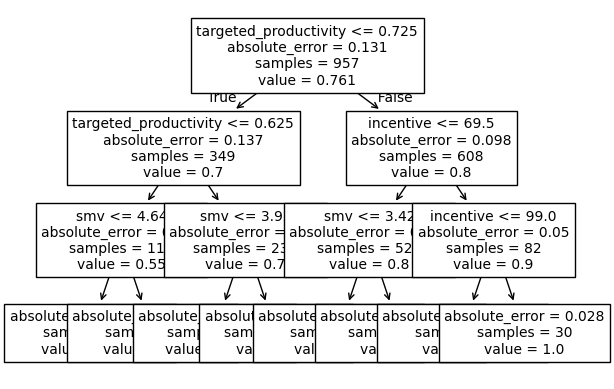

In [ ]:
plot_tree(clf, fontsize=10, feature_names=X.columns)
plt.savefig('out.pdf')

**75-25 Train Test  Split**

In [ ]:
rf2 = RandomForestRegressor()

In [ ]:
rf2.fit(X_train2, y_train2)
y_pred = rf2.predict(X_test2)
mse = mean_squared_error(y_test2, y_pred)
r2 = r2_score(y_test2, y_pred)
mae = mean_absolute_error(y_test2, y_pred)
print(f'Model 8 Random Forest Report:\n MSE: {mse:.4f}, R-squared: {r2:.4f}, MAE: {mae:.4f}')

Model 8 Random Forest Report:
 MSE: 0.0182, R-squared: 0.4416, MAE: 0.0822


**70-30 Train Test Split**

In [ ]:
rf3 = RandomForestRegressor()

In [ ]:
rf3.fit(X_train3, y_train3)
y_pred = rf3.predict(X_test3)
mse = mean_squared_error(y_test3, y_pred)
r2 = r2_score(y_test3, y_pred)
mae = mean_absolute_error(y_test3, y_pred)
print(f'Model 8 Random Forest Report:\n MSE: {mse:.4f}, R-squared: {r2:.4f}, MAE: {mae:.4f}')

Model 8 Random Forest Report:
 MSE: 0.0183, R-squared: 0.4209, MAE: 0.0817


**60-40 Train Test Split**

In [ ]:
rf4 = RandomForestRegressor()

In [ ]:
rf4.fit(X_train4, y_train4)
y_pred = rf4.predict(X_test4)
mse = mean_squared_error(y_test4, y_pred)
r2 = r2_score(y_test4, y_pred)
mae = mean_absolute_error(y_test4, y_pred)
print(f'Model 8 Random Forest Report:\n MSE: {mse:.4f}, R-squared: {r2:.4f}, MAE: {mae:.4f}')

Model 8 Random Forest Report:
 MSE: 0.0182, R-squared: 0.4366, MAE: 0.0819


#**Neural Network (Before VIF)**

In [ ]:
import tensorflow as tf

**80-20 Train Test Split**

**Epochs = 50 :**

        optimizer = Adam
        
        No.of Layers in the Network = 253
        
        metrics = MAE
        
        loss_function = Mean Absolute Error

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler

# STEP 1: Data Preprocessing - Normalize the input data
scaler = StandardScaler()
X_train1_scaled = scaler.fit_transform(X_train1)  # Assuming X_train1 is a NumPy array

# STEP 2: Updated Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=(X_train1_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="tanh"),
    tf.keras.layers.Dense(8, activation="tanh"),
    tf.keras.layers.Dense(4, activation="tanh"),
    tf.keras.layers.Dense(1, activation="linear")  # No activation for regression
])

# STEP 3: Compile the model with a lower learning rate and optimizer tuning
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Decreased learning rate
              metrics=["mae"])

# STEP 4: Callbacks for Early Stopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=30, verbose=1)

# STEP 5: Fit the model with callbacks
history = model.fit(X_train1_scaled, y_train1, epochs=50, batch_size=68, verbose=1,
                    validation_split=0.2, callbacks=[early_stopping, reduce_lr])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - loss: 0.4430 - mae: 0.4430 - val_loss: 0.3296 - val_mae: 0.3296 - learning_rate: 1.0000e-04
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3133 - mae: 0.3133 - val_loss: 0.2654 - val_mae: 0.2654 - learning_rate: 1.0000e-04
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2505 - mae: 0.2505 - val_loss: 0.2163 - val_mae: 0.2163 - learning_rate: 1.0000e-04
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2082 - mae: 0.2082 - val_loss: 0.1881 - val_mae: 0.1881 - learning_rate: 1.0000e-04
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1736 - mae: 0.1736 - val_loss: 0.1696 - val_mae: 0.1696 - learning_rate: 1.0000e-04
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1628 - mae: 0.1628 - val_loss: 0.1600 - val_mae: 0.1600 - learning_rate: 1.0000e-04
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1409 - mae: 0.1409 - val_loss: 0.1545 - val_mae: 0.1545 - learning_rate: 1

In [ ]:
model.evaluate(X_test1,y_test1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7898 - mae: 0.7898 


[0.7951403856277466, 0.7951403856277466]

In [ ]:
model.summary();

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,037 (156.40 KB)

 Trainable params: 13,345 (52.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 26,692 (104.27 KB)

Text(0.5, 0, 'epochs')

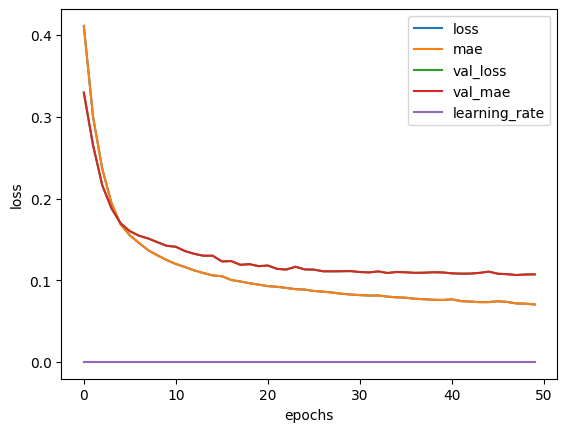

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

**Epochs : 100**

      No.of layers in the Network:253

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler

# STEP 1: Data Preprocessing - Normalize the input data
scaler = StandardScaler()
X_train1_scaled = scaler.fit_transform(X_train1)  # Assuming X_train1 is a NumPy array

# STEP 2: Updated Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=(X_train1_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="tanh"),
    tf.keras.layers.Dense(8, activation="tanh"),
    tf.keras.layers.Dense(4, activation="tanh"),
    tf.keras.layers.Dense(1, activation="linear")  # No activation for regression
])

# STEP 3: Compile the model with a lower learning rate and optimizer tuning
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Decreased learning rate
              metrics=["mae"])

# STEP 4: Callbacks for Early Stopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=30, verbose=1)

# STEP 5: Fit the model with callbacks
history = model.fit(X_train1_scaled, y_train1, epochs=100, batch_size=68, verbose=1,
                    validation_split=0.2, callbacks=[early_stopping, reduce_lr])



Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.6262 - mae: 0.6262 - val_loss: 0.5625 - val_mae: 0.5625 - learning_rate: 1.0000e-04
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5160 - mae: 0.5160 - val_loss: 0.4606 - val_mae: 0.4606 - learning_rate: 1.0000e-04
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4178 - mae: 0.4178 - val_loss: 0.3745 - val_mae: 0.3745 - learning_rate: 1.0000e-04
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3315 - mae: 0.3315 - val_loss: 0.3046 - val_mae: 0.3046 - learning_rate: 1.0000e-04
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2796 - mae: 0.2796 - val_loss: 0.2464 - val_mae: 0.2464 - learning_rate: 1.0000e-04
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2271 - mae: 0.2271 - val_loss: 0.2051 - val_mae: 0.2051 - learning_rate: 1.0000e-04
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1917 - mae: 0.1917 - val_loss: 0.1775 - val_mae: 0.1775 - learning_rate: 1.0000e

In [ ]:
model.evaluate(X_test1,y_test1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2234 - mae: 0.2234 


[0.22682705521583557, 0.22682705521583557]

In [ ]:
model.summary();

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 128)                 │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,037 (156.40 KB)

 Trainable params: 13,345 (52.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 26,692 (104.27 KB)

Text(0.5, 0, 'epochs')

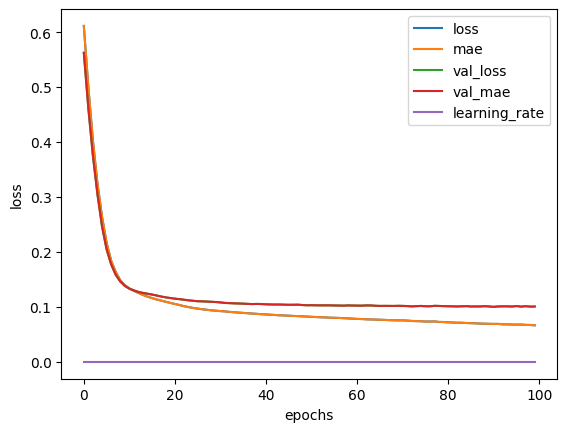

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

**Epochs : 150**

      No.of layers in the Network:253

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler

# STEP 1: Data Preprocessing - Normalize the input data
scaler = StandardScaler()
X_train1_scaled = scaler.fit_transform(X_train1)  # Assuming X_train1 is a NumPy array

# STEP 2: Updated Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=(X_train1_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="tanh"),
    tf.keras.layers.Dense(8, activation="tanh"),
    tf.keras.layers.Dense(4, activation="tanh"),
    tf.keras.layers.Dense(1, activation="linear")  # No activation for regression
])

# STEP 3: Compile the model with a lower learning rate and optimizer tuning
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Decreased learning rate
              metrics=["mae"])

# STEP 4: Callbacks for Early Stopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=30, verbose=1)

# STEP 5: Fit the model with callbacks
history = model.fit(X_train1_scaled, y_train1, epochs=150, batch_size=68, verbose=1,
                    validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.4199 - mae: 1.4199 - val_loss: 1.1916 - val_mae: 1.1916 - learning_rate: 1.0000e-04
Epoch 2/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1437 - mae: 1.1437 - val_loss: 0.8905 - val_mae: 0.8905 - learning_rate: 1.0000e-04
Epoch 3/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8456 - mae: 0.8456 - val_loss: 0.6000 - val_mae: 0.6000 - learning_rate: 1.0000e-04
Epoch 4/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5560 - mae: 0.5560 - val_loss: 0.3677 - val_mae: 0.3677 - learning_rate: 1.0000e-04
Epoch 5/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3336 - mae: 0.3336 - val_loss: 0.2535 - val_mae: 0.2535 - learning_rate: 1.0000e-04
Epoch 6/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2588 - mae: 0.2588 - val_loss: 0.2211 - val_mae: 0.2211 - learning_rate: 1.0000e-04
Epoch 7/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2157 - mae: 0.2157 - val_loss: 0.2057 - val_mae: 0.2057 - learning_rate: 1.0000e

In [ ]:
model.evaluate(X_test1,y_test1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6806 - mae: 0.6806 


[0.6816384196281433, 0.6816384196281433]

In [ ]:
model.summary();

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 128)                 │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,037 (156.40 KB)

 Trainable params: 13,345 (52.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 26,692 (104.27 KB)

Text(0.5, 0, 'epochs')

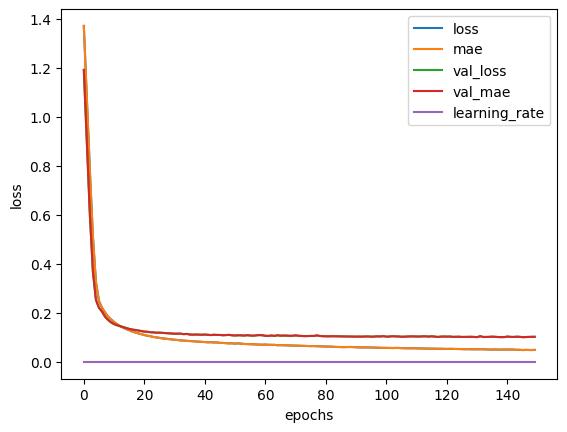

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

**Epochs : 300**

      No.of layers in the Network:253

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler

# STEP 1: Data Preprocessing - Normalize the input data
scaler = StandardScaler()
X_train1_scaled = scaler.fit_transform(X_train1)  # Assuming X_train1 is a NumPy array

# STEP 2: Updated Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=(X_train1_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="tanh"),
    tf.keras.layers.Dense(8, activation="tanh"),
    tf.keras.layers.Dense(4, activation="tanh"),
    tf.keras.layers.Dense(1, activation="linear")  # No activation for regression
])

# STEP 3: Compile the model with a lower learning rate and optimizer tuning
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Decreased learning rate
              metrics=["mae"])

# STEP 4: Callbacks for Early Stopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=30, verbose=1)

# STEP 5: Fit the model with callbacks
history = model.fit(X_train1_scaled, y_train1, epochs=300, batch_size=68, verbose=1,
                    validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/300


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.4256 - mae: 0.4256 - val_loss: 0.3094 - val_mae: 0.3094 - learning_rate: 1.0000e-04
Epoch 2/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2651 - mae: 0.2651 - val_loss: 0.2284 - val_mae: 0.2284 - learning_rate: 1.0000e-04
Epoch 3/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2184 - mae: 0.2184 - val_loss: 0.1982 - val_mae: 0.1982 - learning_rate: 1.0000e-04
Epoch 4/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1900 - mae: 0.1900 - val_loss: 0.1736 - val_mae: 0.1736 - learning_rate: 1.0000e-04
Epoch 5/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1639 - mae: 0.1639 - val_loss: 0.1603 - val_mae: 0.1603 - learning_rate: 1.0000e-04
Epoch 6/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1435 - mae: 0.1435 - val_loss: 0.1490 - val_mae: 0.1490 - learning_rate: 1.0000e-04
Epoch 7/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1309 - mae: 0.1309 - val_loss: 0.1404 - val_mae: 0.1404 - learning_rate: 1.0000e

In [ ]:
model.evaluate(X_test1,y_test1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9292 - mae: 0.9292 


[0.9310782551765442, 0.9310782551765442]

In [ ]:
model.summary();

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 128)                 │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,037 (156.40 KB)

 Trainable params: 13,345 (52.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 26,692 (104.27 KB)

Text(0.5, 0, 'epochs')

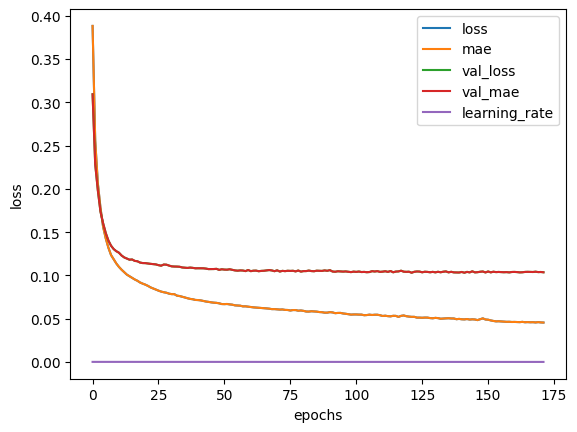

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

**75-25 Train Test Split**

**Epochs : 50**

      No.of layers in the Network:253

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler

# STEP 1: Data Preprocessing - Normalize the input data
scaler = StandardScaler()
X_train2_scaled = scaler.fit_transform(X_train2)  # Assuming X_train2 is a NumPy array
tf.random.set_seed(42)

# STEP 2: Updated Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=(X_train2_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="tanh"),
    tf.keras.layers.Dense(8, activation="tanh"),
    tf.keras.layers.Dense(4, activation="tanh"),
    tf.keras.layers.Dense(1, activation="linear")  # No activation for regression
])

# STEP 3: Compile the model with a lower learning rate and optimizer tuning
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Decreased learning rate
              metrics=["mae"])

# STEP 4: Callbacks for Early Stopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=30, verbose=1)

# STEP 5: Fit the model with callbacks
history = model.fit(X_train2_scaled, y_train2, epochs=50, batch_size=68, verbose=1,
                    validation_split=0.2, callbacks=[early_stopping, reduce_lr])



Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.4236 - mae: 0.4236 - val_loss: 0.3426 - val_mae: 0.3426 - learning_rate: 1.0000e-04
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2873 - mae: 0.2873 - val_loss: 0.2475 - val_mae: 0.2475 - learning_rate: 1.0000e-04
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2083 - mae: 0.2083 - val_loss: 0.2020 - val_mae: 0.2020 - learning_rate: 1.0000e-04
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1776 - mae: 0.1776 - val_loss: 0.1796 - val_mae: 0.1796 - learning_rate: 1.0000e-04
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1621 - mae: 0.1621 - val_loss: 0.1650 - val_mae: 0.1650 - learning_rate: 1.0000e-04
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1482 - mae: 0.1482 - val_loss: 0.1553 - val_mae: 0.1553 - learning_rate: 1.0000e-04
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1384 - mae: 0.1384 - val_loss: 0.1482 - val_mae: 0.1482 - learning_rate: 1.0000e-04
Ep

In [ ]:
model.evaluate(X_test2,y_test2)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2793 - mae: 0.2793 


[0.2790679633617401, 0.2790679633617401]

In [ ]:
model.summary();

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                     │ (None, 128)                 │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,037 (156.40 KB)

 Trainable params: 13,345 (52.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 26,692 (104.27 KB)

Text(0.5, 0, 'epochs')

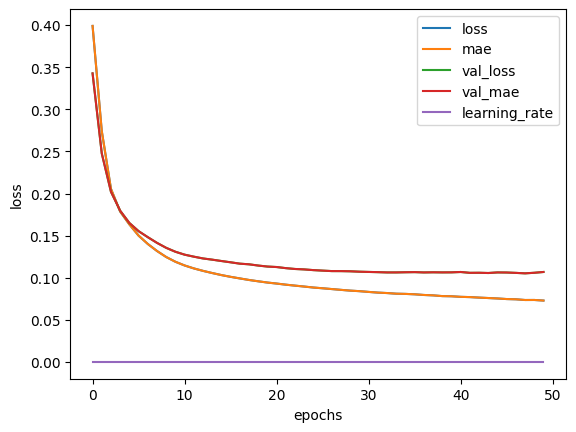

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

**Epochs : 100**

      No.of layers in the Network:253

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler

# STEP 1: Data Preprocessing - Normalize the input data
scaler = StandardScaler()
X_train2_scaled = scaler.fit_transform(X_train2)  # Assuming X_train2 is a NumPy array
tf.random.set_seed(42)

# STEP 2: Updated Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=(X_train2_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="tanh"),
    tf.keras.layers.Dense(8, activation="tanh"),
    tf.keras.layers.Dense(4, activation="tanh"),
    tf.keras.layers.Dense(1, activation="linear")  # No activation for regression
])

# STEP 3: Compile the model with a lower learning rate and optimizer tuning
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Decreased learning rate
              metrics=["mae"])

# STEP 4: Callbacks for Early Stopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=30, verbose=1)

# STEP 5: Fit the model with callbacks
history = model.fit(X_train2_scaled, y_train2, epochs=100, batch_size=68, verbose=1,
                    validation_split=0.2, callbacks=[early_stopping, reduce_lr])



Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 2.0889 - mae: 2.0889 - val_loss: 1.8222 - val_mae: 1.8222 - learning_rate: 1.0000e-04
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7366 - mae: 1.7366 - val_loss: 1.4301 - val_mae: 1.4301 - learning_rate: 1.0000e-04
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3241 - mae: 1.3241 - val_loss: 1.0070 - val_mae: 1.0070 - learning_rate: 1.0000e-04
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9116 - mae: 0.9116 - val_loss: 0.6684 - val_mae: 0.6684 - learning_rate: 1.0000e-04
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6010 - mae: 0.6010 - val_loss: 0.4707 - val_mae: 0.4707 - learning_rate: 1.0000e-04
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4418 - mae: 0.4418 - val_loss: 0.3715 - val_mae: 0.3715 - learning_rate: 1.0000e-04
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3618 - mae: 0.3618 - val_loss: 0.3183 - val_mae: 0.3183 - learning_rate: 1.0000e

In [ ]:
model.evaluate(X_test2,y_test2)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3315 - mae: 0.3315 


[0.3312719762325287, 0.3312719762325287]

In [ ]:
model.summary();

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                     │ (None, 128)                 │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,037 (156.40 KB)

 Trainable params: 13,345 (52.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 26,692 (104.27 KB)

Text(0.5, 0, 'epochs')

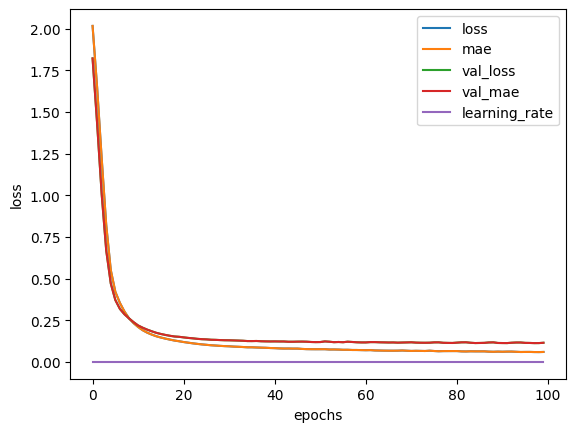

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

**Epochs : 150**

      No.of layers in the Network:253

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler

# STEP 1: Data Preprocessing - Normalize the input data
scaler = StandardScaler()
X_train2_scaled = scaler.fit_transform(X_train2)  # Assuming X_train2 is a NumPy array
tf.random.set_seed(42)

# STEP 2: Updated Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=(X_train2_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="tanh"),
    tf.keras.layers.Dense(8, activation="tanh"),
    tf.keras.layers.Dense(4, activation="tanh"),
    tf.keras.layers.Dense(1, activation="linear")  # No activation for regression
])

# STEP 3: Compile the model with a lower learning rate and optimizer tuning
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Decreased learning rate
              metrics=["mae"])

# STEP 4: Callbacks for Early Stopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=30, verbose=1)

# STEP 5: Fit the model with callbacks
history = model.fit(X_train2_scaled, y_train2, epochs=150, batch_size=68, verbose=1,
                    validation_split=0.2, callbacks=[early_stopping, reduce_lr])



Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3575 - mae: 0.3575 - val_loss: 0.2589 - val_mae: 0.2589 - learning_rate: 1.0000e-04
Epoch 2/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2477 - mae: 0.2477 - val_loss: 0.2034 - val_mae: 0.2034 - learning_rate: 1.0000e-04
Epoch 3/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2078 - mae: 0.2078 - val_loss: 0.1846 - val_mae: 0.1846 - learning_rate: 1.0000e-04
Epoch 4/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1824 - mae: 0.1824 - val_loss: 0.1679 - val_mae: 0.1679 - learning_rate: 1.0000e-04
Epoch 5/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1609 - mae: 0.1609 - val_loss: 0.1573 - val_mae: 0.1573 - learning_rate: 1.0000e-04
Epoch 6/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1466 - mae: 0.1466 - val_loss: 0.1494 - val_mae: 0.1494 - learning_rate: 1.0000e-04
Epoch 7/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1345 - mae: 0.1345 - val_loss: 0.1403 - val_mae: 0.1403 - learning_rate: 1.0000e

In [ ]:
model.evaluate(X_test2,y_test2)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7697 - mae: 0.7697 


[0.7679542303085327, 0.7679542303085327]

In [ ]:
model.summary();

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                     │ (None, 128)                 │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,037 (156.40 KB)

 Trainable params: 13,345 (52.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 26,692 (104.27 KB)

Text(0.5, 0, 'epochs')

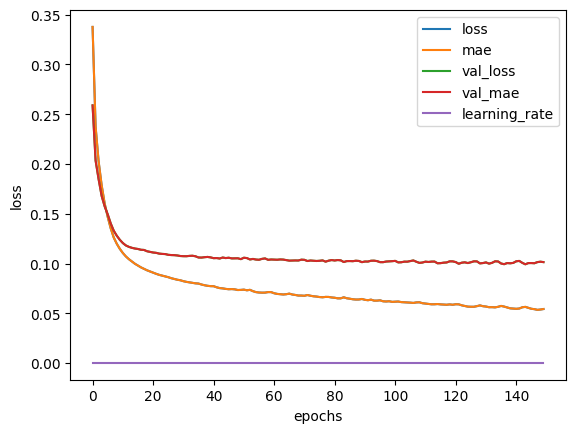

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

**Epochs : 300**

      No.of layers in the Network:253

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler

# STEP 1: Data Preprocessing - Normalize the input data
scaler = StandardScaler()
X_train2_scaled = scaler.fit_transform(X_train2)  # Assuming X_train2 is a NumPy array
tf.random.set_seed(42)

# STEP 2: Updated Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=(X_train2_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="tanh"),
    tf.keras.layers.Dense(8, activation="tanh"),
    tf.keras.layers.Dense(4, activation="tanh"),
    tf.keras.layers.Dense(1, activation="linear")  # No activation for regression
])

# STEP 3: Compile the model with a lower learning rate and optimizer tuning
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Decreased learning rate
              metrics=["mae"])

# STEP 4: Callbacks for Early Stopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=30, verbose=1)

# STEP 5: Fit the model with callbacks
history = model.fit(X_train2_scaled, y_train2, epochs=300, batch_size=68, verbose=1,
                    validation_split=0.2, callbacks=[early_stopping, reduce_lr])



Epoch 1/300


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.6800 - mae: 0.6800 - val_loss: 0.6285 - val_mae: 0.6285 - learning_rate: 1.0000e-04
Epoch 2/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5587 - mae: 0.5587 - val_loss: 0.5150 - val_mae: 0.5150 - learning_rate: 1.0000e-04
Epoch 3/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4472 - mae: 0.4472 - val_loss: 0.4092 - val_mae: 0.4092 - learning_rate: 1.0000e-04
Epoch 4/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3487 - mae: 0.3487 - val_loss: 0.3193 - val_mae: 0.3193 - learning_rate: 1.0000e-04
Epoch 5/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2651 - mae: 0.2651 - val_loss: 0.2503 - val_mae: 0.2503 - learning_rate: 1.0000e-04
Epoch 6/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2030 - mae: 0.2030 - val_loss: 0.1995 - val_mae: 0.1995 - learning_rate: 1.0000e-04
Epoch 7/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1653 - mae: 0.1653 - val_loss: 0.1717 - val_mae: 0.1717 - learning_rate: 1.0000e

In [ ]:
model.evaluate(X_test2,y_test2)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3919 - mae: 0.3919 


[0.3918062448501587, 0.3918062448501587]

In [ ]:
model.summary();

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_49 (Dense)                     │ (None, 128)                 │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,037 (156.40 KB)

 Trainable params: 13,345 (52.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 26,692 (104.27 KB)

Text(0.5, 0, 'epochs')

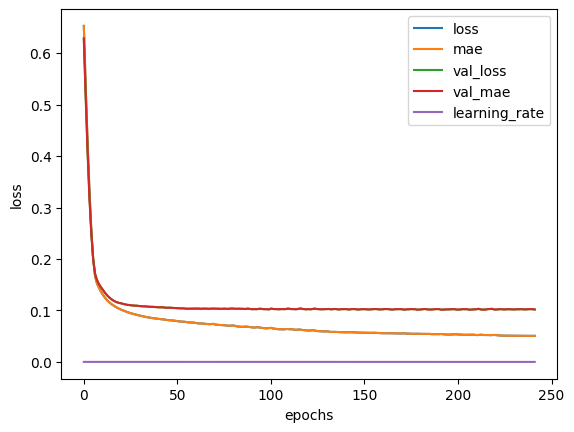

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

**70-30 Train Test Split**

**Epochs : 50**

      No.of layers in the Network:253

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler

# STEP 1: Data Preprocessing - Normalize the input data
scaler = StandardScaler()
X_train3_scaled = scaler.fit_transform(X_train3)  # Assuming X_train3 is a NumPy array
tf.random.set_seed(42)

# STEP 2: Updated Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=(X_train3_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="tanh"),
    tf.keras.layers.Dense(8, activation="tanh"),
    tf.keras.layers.Dense(4, activation="tanh"),
    tf.keras.layers.Dense(1, activation="linear")  # No activation for regression
])

# STEP 3: Compile the model with a lower learning rate and optimizer tuning
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Decreased learning rate
              metrics=["mae"])

# STEP 4: Callbacks for Early Stopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=30, verbose=1)

# STEP 5: Fit the model with callbacks
history = model.fit(X_train3_scaled, y_train3, epochs=50, batch_size=68, verbose=1,
                    validation_split=0.2, callbacks=[early_stopping, reduce_lr])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 1.5015 - mae: 1.5015 - val_loss: 1.3540 - val_mae: 1.3540 - learning_rate: 1.0000e-04
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2903 - mae: 1.2903 - val_loss: 1.1229 - val_mae: 1.1229 - learning_rate: 1.0000e-04
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0517 - mae: 1.0517 - val_loss: 0.8673 - val_mae: 0.8673 - learning_rate: 1.0000e-04
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7946 - mae: 0.7946 - val_loss: 0.6020 - val_mae: 0.6020 - learning_rate: 1.0000e-04
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5393 - mae: 0.5393 - val_loss: 0.3697 - val_mae: 0.3697 - learning_rate: 1.0000e-04
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3322 - mae: 0.3322 - val_loss: 0.2167 - val_mae: 0.2167 - learning_rate: 1.0000e-04
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2146 - mae: 0.2146 - val_loss: 0.1676 - val_mae: 0.1676 - learning_rate: 1.

In [ ]:
model.evaluate(X_test3,y_test3)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1850 - mae: 0.1850 


[0.1833716481924057, 0.1833716481924057]

In [ ]:
model.summary();

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_56 (Dense)                     │ (None, 128)                 │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,037 (156.40 KB)

 Trainable params: 13,345 (52.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 26,692 (104.27 KB)

Text(0.5, 0, 'epochs')

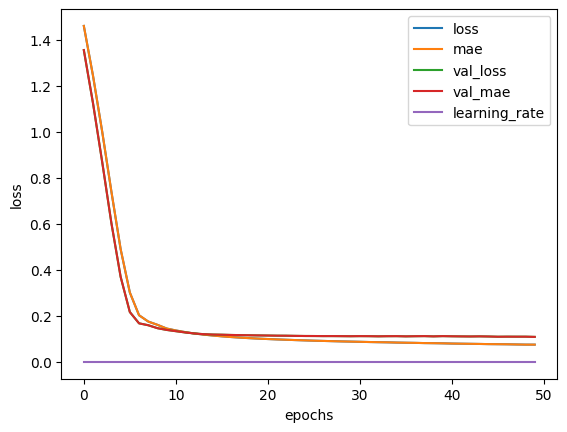

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

**Epochs : 100**

      No.of layers in the Network:253

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler

# STEP 1: Data Preprocessing - Normalize the input data
scaler = StandardScaler()
X_train3_scaled = scaler.fit_transform(X_train3)  # Assuming X_train3 is a NumPy array
tf.random.set_seed(42)

# STEP 2: Updated Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=(X_train3_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="tanh"),
    tf.keras.layers.Dense(8, activation="tanh"),
    tf.keras.layers.Dense(4, activation="tanh"),
    tf.keras.layers.Dense(1, activation="linear")  # No activation for regression
])

# STEP 3: Compile the model with a lower learning rate and optimizer tuning
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Decreased learning rate
              metrics=["mae"])

# STEP 4: Callbacks for Early Stopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=30, verbose=1)

# STEP 5: Fit the model with callbacks
history = model.fit(X_train3_scaled, y_train3, epochs=100, batch_size=68, verbose=1,
                    validation_split=0.2, callbacks=[early_stopping, reduce_lr])



Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 1.1026 - mae: 1.1026 - val_loss: 0.9535 - val_mae: 0.9535 - learning_rate: 1.0000e-04
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9052 - mae: 0.9052 - val_loss: 0.7639 - val_mae: 0.7639 - learning_rate: 1.0000e-04
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7139 - mae: 0.7139 - val_loss: 0.5878 - val_mae: 0.5878 - learning_rate: 1.0000e-04
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5367 - mae: 0.5367 - val_loss: 0.4333 - val_mae: 0.4333 - learning_rate: 1.0000e-04
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3786 - mae: 0.3786 - val_loss: 0.3095 - val_mae: 0.3095 - learning_rate: 1.0000e-04
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2659 - mae: 0.2659 - val_loss: 0.2298 - val_mae: 0.2298 - learning_rate: 1.0000e-04
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2046 - mae: 0.2046 - val_loss: 0.1901 - val_mae: 0.1901 - learning_rate: 1.0000e

In [ ]:
model.evaluate(X_test3,y_test3)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4679 - mae: 0.4679 


[0.4675443768501282, 0.4675443768501282]

In [ ]:
model.summary();

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_63 (Dense)                     │ (None, 128)                 │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,037 (156.40 KB)

 Trainable params: 13,345 (52.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 26,692 (104.27 KB)

Text(0.5, 0, 'epochs')

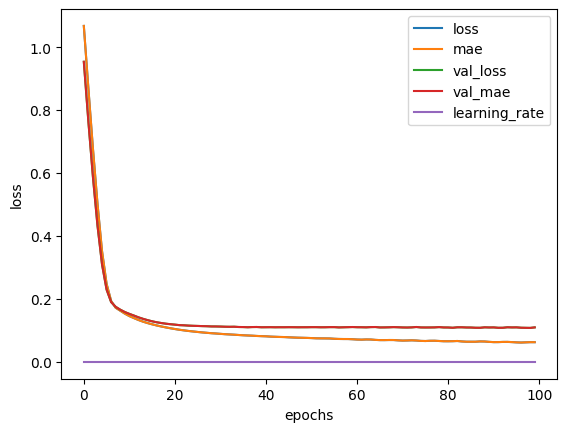

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

**Epochs : 150**

      No.of layers in the Network:253

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler

# STEP 1: Data Preprocessing - Normalize the input data
scaler = StandardScaler()
X_train3_scaled = scaler.fit_transform(X_train3)  # Assuming X_train3 is a NumPy array
tf.random.set_seed(42)

# STEP 2: Updated Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=(X_train3_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="tanh"),
    tf.keras.layers.Dense(8, activation="tanh"),
    tf.keras.layers.Dense(4, activation="tanh"),
    tf.keras.layers.Dense(1, activation="linear")  # No activation for regression
])

# STEP 3: Compile the model with a lower learning rate and optimizer tuning
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Decreased learning rate
              metrics=["mae"])

# STEP 4: Callbacks for Early Stopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=30, verbose=1)

# STEP 5: Fit the model with callbacks
history = model.fit(X_train3_scaled, y_train3, epochs=150, batch_size=68, verbose=1,
                    validation_split=0.2, callbacks=[early_stopping, reduce_lr])



Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.8437 - mae: 0.8437 - val_loss: 0.6498 - val_mae: 0.6498 - learning_rate: 1.0000e-04
Epoch 2/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5537 - mae: 0.5537 - val_loss: 0.4281 - val_mae: 0.4281 - learning_rate: 1.0000e-04
Epoch 3/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3910 - mae: 0.3910 - val_loss: 0.3207 - val_mae: 0.3207 - learning_rate: 1.0000e-04
Epoch 4/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3047 - mae: 0.3047 - val_loss: 0.2590 - val_mae: 0.2590 - learning_rate: 1.0000e-04
Epoch 5/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2415 - mae: 0.2415 - val_loss: 0.2234 - val_mae: 0.2234 - learning_rate: 1.0000e-04
Epoch 6/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2041 - mae: 0.2041 - val_loss: 0.2010 - val_mae: 0.2010 - learning_rate: 1.0000e-04
Epoch 7/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1817 - mae: 0.1817 - val_loss: 0.1816 - val_mae: 0.1816 - learning_rate: 1.0000

In [ ]:
model.evaluate(X_test3,y_test3)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1900 - mae: 0.1900 


[0.18728342652320862, 0.18728342652320862]

In [ ]:
model.summary();

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_70 (Dense)                     │ (None, 128)                 │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_72 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_73 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_74 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_75 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_76 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,037 (156.40 KB)

 Trainable params: 13,345 (52.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 26,692 (104.27 KB)

Text(0.5, 0, 'epochs')

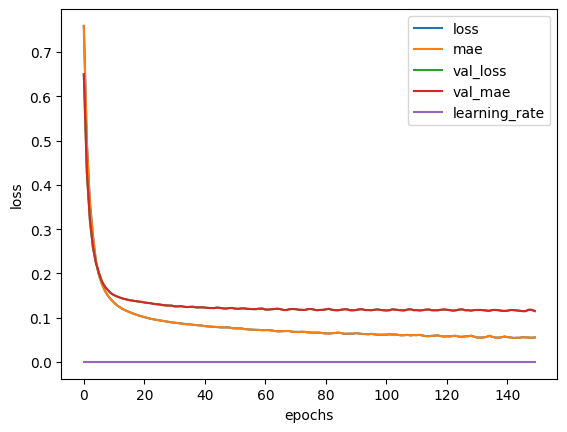

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

**Epochs : 300**

      No.of layers in the Network:253

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 421ms/step - loss: 6.1825 - mae: 0.8592 - val_loss: 6.0733 - val_mae: 0.7274 - learning_rate: 5.0000e-04
Epoch 2/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 378ms/step - loss: 6.1220 - mae: 0.7706 - val_loss: 6.0172 - val_mae: 0.6526 - learning_rate: 5.0000e-04
Epoch 3/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 546ms/step - loss: 5.9948 - mae: 0.6285 - val_loss: 5.9380 - val_mae: 0.5695 - learning_rate: 5.0000e-04
Epoch 4/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 370ms/step - loss: 5.9180 - mae: 0.5507 - val_loss: 5.8755 - val_mae: 0.5141 - learning_rate: 5.0000e-04
Epoch 5/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 572ms/step - loss: 5.8874 - mae: 0.5292 - val_loss: 5.7715 - val_mae: 0.4249 - learning_rate: 5.0000e-04
Epoch 6/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 378ms/step - loss: 5.8604 - mae: 0.5183 - val_loss: 5.7323 - val_mae: 0.4052 - learning_rate: 5.0000e-04
Epoch 7/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 375ms/step - loss: 5.8013 - mae: 0.4796 - val_loss: 5.7041 - val_mae: 0.400

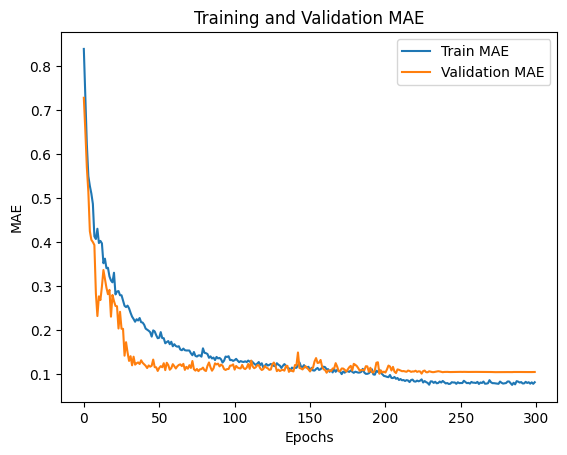

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# STEP 1: Data Preprocessing
scaler = StandardScaler()
X_train3_scaled = scaler.fit_transform(X_train3)  # Scale training data
X_test3_scaled = scaler.transform(X_test3)  # Scale test data

# Feature Reduction (Optional, if dataset has many features)
pca = PCA(n_components=0.97)  # Retain 95% variance
X_train3_scaled = pca.fit_transform(X_train3_scaled)
X_test3_scaled = pca.transform(X_test3_scaled)

# STEP 2: Advanced Model Architecture
model = tf.keras.Sequential([

    Dense(4096, kernel_regularizer=tf.keras.regularizers.l2(0.001),
          input_shape=(X_train3_scaled.shape[1],)),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.5),
    Dense(2048, kernel_regularizer=tf.keras.regularizers.l2(0.001), input_shape=(X_train3_scaled.shape[1],)),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.4),

    Dense(1024, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.4),

    Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.4),

    Dense(256, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.2),

    Dense(64, activation="relu"),
    Dense(1, activation="linear")  # Output layer for regression
])

# STEP 3: Compile the model with a lower learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),  # Lower learning rate
    loss="mae",  # Mean Absolute Error
    metrics=["mae"]
)

# STEP 4: Callbacks
early_stopping = EarlyStopping(monitor="val_loss", patience=30, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6, verbose=1)

# STEP 5: Fit the model
history = model.fit(
    X_train3_scaled, y_train3,
    epochs=300, batch_size=64, validation_split=0.2,
    verbose=1, callbacks=[early_stopping, reduce_lr]
)

# STEP 6: Evaluate the model
loss, mae = model.evaluate(X_test3_scaled, y_test3, verbose=1)
print(f"Final Test MAE: {mae:.4f}")

# Plot training history
import matplotlib.pyplot as plt
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('Training and Validation MAE')
plt.show()


In [ ]:
model.summary();

Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_245 (Dense)                    │ (None, 256)                 │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_86 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_246 (Dense)                    │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_87 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_247 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_88 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_248 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_249 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,849 (183.00 KB)

 Trainable params: 46,849 (183.00 KB)

 Non-trainable params: 0 (0.00 B)

**60-40 Train Test Split**

# **Multicollinearity- Variance Inflation Factor Checking**

In [ ]:
X = data[['team','targeted_productivity','smv','over_time','incentive','idle_time','idle_men','no_of_style_change','no_of_workers','day_binary','quarter_Quarter1','quarter_Quarter2','quarter_Quarter3','quarter_Quarter4','quarter_Quarter5','department_finishing','department_finishing','department_sweing']]
y = data.actual_productivity
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

def calc_vif(X):
    # Select only numeric columns for VIF calculation
    numerical_cols = X.select_dtypes(include=np.number).columns
    X_numeric = X[numerical_cols]

    # Calculating VIF for numeric columns only
    vif = pd.DataFrame()
    vif["variables"] = X_numeric.columns
    vif["VIF"] = [variance_inflation_factor(X_numeric.values, i).round(1) for i in range(X_numeric.shape[1])]

    return(vif)
    X_train=vif

calc_vif(X)

variables   VIF
0                    team   1.1
1   targeted_productivity   1.1
2                     smv   6.2
3               over_time   2.5
4               incentive   1.0
5               idle_time   1.5
6                idle_men   1.5
7      no_of_style_change   1.4
8           no_of_workers  14.5
9              day_binary   1.0
10       quarter_Quarter1  22.5
11       quarter_Quarter2  20.6
12       quarter_Quarter3  13.3
13       quarter_Quarter4  15.4
14       quarter_Quarter5   3.5
15      department_sweing   9.6

In [ ]:
calc_vif(X_train.drop(['quarter_Quarter1'], axis=1))

variables   VIF
0                    team   4.7
1   targeted_productivity  10.6
2                     smv  18.6
3               over_time   7.2
4               incentive   1.1
5               idle_time   1.3
6                idle_men   1.4
7      no_of_style_change   1.6
8           no_of_workers  49.9
9              day_binary   1.5
10       quarter_Quarter2   2.0
11       quarter_Quarter3   1.6
12       quarter_Quarter4   1.8
13       quarter_Quarter5   1.1
14      department_sweing  22.7

In [ ]:
calc_vif(X_train.drop(['quarter_Quarter1','no_of_workers'], axis=1))

variables   VIF
0                    team   4.6
1   targeted_productivity   9.0
2                     smv  14.7
3               over_time   6.3
4               incentive   1.1
5               idle_time   1.3
6                idle_men   1.4
7      no_of_style_change   1.5
8              day_binary   1.5
9        quarter_Quarter2   2.0
10       quarter_Quarter3   1.6
11       quarter_Quarter4   1.8
12       quarter_Quarter5   1.1
13      department_sweing  12.1

In [ ]:
calc_vif(X_train.drop(['quarter_Quarter1','no_of_workers','smv'], axis=1))

variables  VIF
0                    team  4.3
1   targeted_productivity  8.2
2               over_time  5.8
3               incentive  1.1
4               idle_time  1.3
5                idle_men  1.4
6      no_of_style_change  1.5
7              day_binary  1.5
8        quarter_Quarter2  1.9
9        quarter_Quarter3  1.6
10       quarter_Quarter4  1.8
11       quarter_Quarter5  1.1
12      department_sweing  5.5

In [ ]:
calc_vif(X_train.drop(['quarter_Quarter1','no_of_workers','smv','department_sweing'], axis=1))

variables  VIF
0                    team  4.2
1   targeted_productivity  8.1
2               over_time  2.8
3               incentive  1.1
4               idle_time  1.3
5                idle_men  1.3
6      no_of_style_change  1.2
7              day_binary  1.5
8        quarter_Quarter2  1.9
9        quarter_Quarter3  1.6
10       quarter_Quarter4  1.8
11       quarter_Quarter5  1.1

In [ ]:
calc_vif(X_train.drop(['quarter_Quarter1','no_of_workers','smv','department_sweing','targeted_productivity'], axis=1))

variables  VIF
0                 team  2.6
1            over_time  2.2
2            incentive  1.1
3            idle_time  1.3
4             idle_men  1.3
5   no_of_style_change  1.2
6           day_binary  1.4
7     quarter_Quarter2  1.7
8     quarter_Quarter3  1.5
9     quarter_Quarter4  1.6
10    quarter_Quarter5  1.1

In [ ]:
calc_vif(X_train.drop(['quarter_Quarter1','no_of_workers','smv','department_sweing','targeted_productivity','team'], axis=1))

variables  VIF
0           over_time  2.0
1           incentive  1.1
2           idle_time  1.3
3            idle_men  1.3
4  no_of_style_change  1.2
5          day_binary  1.4
6    quarter_Quarter2  1.4
7    quarter_Quarter3  1.3
8    quarter_Quarter4  1.4
9    quarter_Quarter5  1.0

In [ ]:
calc_vif(X_train.drop(['quarter_Quarter1','no_of_workers','smv','department_sweing','targeted_productivity','team','over_time'], axis=1))

variables  VIF
0           incentive  1.1
1           idle_time  1.3
2            idle_men  1.3
3  no_of_style_change  1.2
4          day_binary  1.3
5    quarter_Quarter2  1.2
6    quarter_Quarter3  1.1
7    quarter_Quarter4  1.2
8    quarter_Quarter5  1.0

# **Linear Regression (After VIF)**


Splitting the X_nomulti dataset for Linear Regresssion only as it has only one column




In [ ]:
X_nomulti=X_train1.drop(['quarter_Quarter1','no_of_workers','smv','department_sweing','targeted_productivity','team','over_time'], axis=1)
X_nomulti = X_nomulti[['quarter_Quarter5']].iloc[:len(y_train)]
y=y_train

In [ ]:
X_train1_nomulti, X_test1_nomulti, y_train1_nomulti, y_test1_nomulti = train_test_split(X_nomulti, y, test_size=0.20,random_state=1)
X_train2_nomulti, X_test2_nomulti, y_train2_nomulti, y_test2_nomulti = train_test_split(X_nomulti, y, test_size=0.25,random_state=1)
X_train3_nomulti, X_test3_nomulti, y_train3_nomulti, y_test3_nomulti = train_test_split(X_nomulti, y, test_size=0.30,random_state=1)
X_train4_nomulti, X_test4_nomulti, y_train4_nomulti, y_test4_nomulti = train_test_split(X_nomulti, y, test_size=0.40,random_state=1)

**80-20 Train Test Split**

In [ ]:
lm1 = LinearRegression()
lm1.fit(X_train1_nomulti, y_train1_nomulti)
y_pred1_nomulti = lm1.predict(X_test1_nomulti)
print(np.sqrt(metrics.mean_squared_error(y_test1_nomulti, y_pred1_nomulti)))
print(r2_score(y_test1_nomulti,y_pred1_nomulti))
print(metrics.mean_absolute_error(y_test1_nomulti,y_pred1_nomulti))

0.16686167409202105
0.00984571775753107
0.1323922624517164


**75-25 Train Test Split**

In [ ]:
lm2 = LinearRegression()
lm2.fit(X_train2_nomulti, y_train2_nomulti)
y_pred2_nomulti = lm2.predict(X_test2_nomulti)
print(np.sqrt(metrics.mean_squared_error(y_test2_nomulti, y_pred2_nomulti)))
print(r2_score(y_test2_nomulti,y_pred2_nomulti))
print(metrics.mean_absolute_error(y_test2_nomulti,y_pred2_nomulti))

0.16191177697729697
0.010957330387135422
0.1276617258196739


**70-30 Train Test Split**

In [ ]:
lm3 = LinearRegression()
lm3.fit(X_train3_nomulti, y_train3_nomulti)
y_pred3_nomulti = lm3.predict(X_test3_nomulti)
print(np.sqrt(metrics.mean_squared_error(y_test3_nomulti, y_pred3_nomulti)))
print(r2_score(y_test3_nomulti,y_pred3_nomulti))
print(metrics.mean_absolute_error(y_test3_nomulti,y_pred3_nomulti))

0.1615372776172222
0.009992567187404378
0.12642834341340306


**60-40 Train Test Split**

In [ ]:
lm4 = LinearRegression()
lm4.fit(X_train4_nomulti, y_train4_nomulti)
y_pred4_nomulti = lm4.predict(X_test4_nomulti)
print(np.sqrt(metrics.mean_squared_error(y_test4_nomulti, y_pred4_nomulti)))
print(r2_score(y_test4_nomulti,y_pred4_nomulti))
print(metrics.mean_absolute_error(y_test4_nomulti,y_pred4_nomulti))


0.16643947384978577
-0.016606283056512794
0.12921769616809178





# **Splitting the X_nomulti dataset for All Algorithms**

In [ ]:
X_nomulti=X_train1.drop(['quarter_Quarter1','no_of_workers','smv','department_sweing','targeted_productivity','team','over_time'], axis=1)
X_nomulti = X_nomulti.iloc[:len(y_train)]
y=y_train

In [ ]:
X_train1_nomulti, X_test1_nomulti, y_train1_nomulti, y_test1_nomulti = train_test_split(X_nomulti, y, test_size=0.20,random_state=1)
X_train2_nomulti, X_test2_nomulti, y_train2_nomulti, y_test2_nomulti = train_test_split(X_nomulti, y, test_size=0.25,random_state=1)
X_train3_nomulti, X_test3_nomulti, y_train3_nomulti, y_test3_nomulti = train_test_split(X_nomulti, y, test_size=0.30,random_state=1)
X_train4_nomulti, X_test4_nomulti, y_train4_nomulti, y_test4_nomulti = train_test_split(X_nomulti, y, test_size=0.40,random_state=1)

# **Multiple Linear Regression (After VIF)**

**80-20 Train Test Split**

In [ ]:
lm1 = LinearRegression()
lm1.fit(X_train1_nomulti, y_train1_nomulti)
y_pred1_nomulti = lm1.predict(X_test1_nomulti)
print(np.sqrt(metrics.mean_squared_error(y_test1_nomulti, y_pred1_nomulti)))
print(r2_score(y_test1_nomulti,y_pred1_nomulti))
print(metrics.mean_absolute_error(y_test1_nomulti,y_pred1_nomulti))

0.16414203577206563
0.04185925701730697
0.1285137561261029


**75-25 Train Test Split**

In [ ]:
lm2 = LinearRegression()
lm2.fit(X_train2_nomulti, y_train2_nomulti)
y_pred2_nomulti = lm2.predict(X_test2_nomulti)
print(np.sqrt(metrics.mean_squared_error(y_test2_nomulti, y_pred2_nomulti)))
print(r2_score(y_test2_nomulti,y_pred2_nomulti))
print(metrics.mean_absolute_error(y_test2_nomulti,y_pred2_nomulti))

0.15959675715788987
0.03903786480911264
0.12434548683005855


**70-30 Train Test Split**

In [ ]:
lm3 = LinearRegression()
lm3.fit(X_train3_nomulti, y_train3_nomulti)
y_pred3_nomulti = lm3.predict(X_test3_nomulti)
print(np.sqrt(metrics.mean_squared_error(y_test3_nomulti, y_pred3_nomulti)))
print(r2_score(y_test3_nomulti,y_pred3_nomulti))
print(metrics.mean_absolute_error(y_test3_nomulti,y_pred3_nomulti))


0.1581752421289346
0.05077328566918793
0.12184345661879539


**60-40 Train test Split**

In [ ]:
lm4 = LinearRegression()
lm4.fit(X_train4_nomulti, y_train4_nomulti)
y_pred4_nomulti = lm4.predict(X_test4_nomulti)
print(np.sqrt(metrics.mean_squared_error(y_test4_nomulti, y_pred4_nomulti)))
print(r2_score(y_test4_nomulti,y_pred4_nomulti))
print(metrics.mean_absolute_error(y_test4_nomulti,y_pred4_nomulti))


0.1637695304252725
0.015747948659292743
0.12519735790240394


# **K-Nearest Neighbor (After VIF)**

In [ ]:
# Instead of KNeighborsClassifier, use KNeighborsRegressor for continuous target variables:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

**80-20 Train Test Split**

In [ ]:
model=KNeighborsRegressor(n_neighbors=5)

[0.45485832 0.80037509 0.88029959 0.54022677 0.72840833 0.80200426
 0.74337652 0.80036119 0.6902331  0.88982795 0.72222333 0.80023167
 0.84025774 0.90938194 0.72697858 0.80025001 0.82033096 0.72840833
 0.75894333 0.54427852 0.79016982 0.74058774 0.80027968 0.74337652
 0.68812833 0.53033647 0.76736205 0.76736205 0.75590463 0.97016402
 0.47079792 0.58029966 0.74022087 0.63055041 0.72697858 0.90938194
 0.74270556 0.67848389 0.75058707 0.73787254 0.57608303 0.90938194
 0.84034186 0.90938194 0.72697858 0.72840833 0.72840833 0.76736205
 0.57608303 0.74337652 0.72970328 0.81054156 0.57608303 0.76736205
 0.88982795 0.55605664 0.90938194 0.80200426 0.80039054 0.72222333
 0.75894333 0.78018857 0.67848389 0.7003498  0.80039054 0.78040901
 0.90938194 0.77019444 0.64272089 0.57608303 0.71828299 0.72697858
 0.90938194 0.65933278 0.84072639 0.75894333 0.54022677 1.00017301
 0.74337652 0.68812833 0.84072639 0.75590463 0.64050746 0.72840833
 0.75065219 0.65385492 0.76013056 0.57608303 0.71039174 0.7504

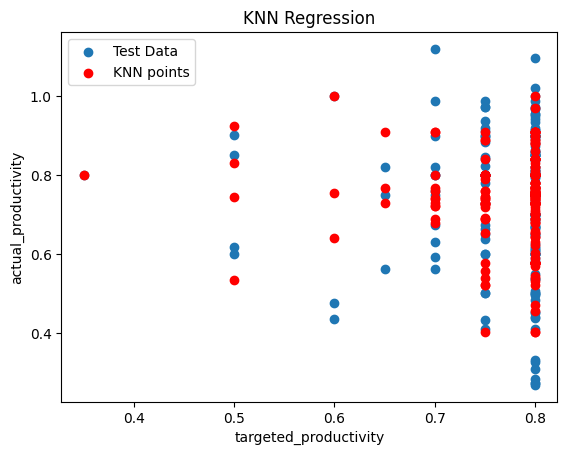

In [ ]:
model.fit(X_train1_nomulti, y_train1_nomulti)
y_pred1_nomulti = model.predict(X_test1_nomulti)
print(y_pred1_nomulti)
knn = pd.DataFrame({'Predicted':y_pred1_nomulti,'Actual':y_test1_nomulti})
print(knn)

print(r2_score(y_test1_nomulti,y_pred1_nomulti))
print(metrics.mean_absolute_error(y_test1_nomulti,y_pred1_nomulti))
print(mean_squared_error(y_test1_nomulti,y_pred1_nomulti))
mse = mean_squared_error(y_test1_nomulti, y_pred1_nomulti)
rmse = np.sqrt(mse)
print(rmse)

plt.scatter(data['targeted_productivity'][:len(y_test1_nomulti)], y_test1_nomulti, label='Test Data')
plt.scatter(data['targeted_productivity'][:len(y_pred1_nomulti)], y_pred1_nomulti, color='red', linewidth=1, label='KNN points')
plt.xlabel('targeted_productivity')
plt.ylabel('actual_productivity')
plt.title('KNN Regression')
plt.legend()
plt.show()

**75-25 Train Test Split**

In [ ]:
model2=KNeighborsRegressor(n_neighbors=5)

[0.45485832 0.8003805  0.90033551 0.59026582 0.81901167 0.8163644
 0.67159091 0.80050773 0.69006861 0.88269363 0.74459375 0.80020443
 0.86034618 0.87326528 0.70015543 0.80021535 0.81041683 0.81901167
 0.76787111 0.56429118 0.79016982 0.74058774 0.80029555 0.67159091
 0.72788534 0.59035423 0.76736205 0.76736205 0.7838154  0.97016402
 0.52077929 0.58029966 0.74022087 0.63047601 0.70015543 0.87326528
 0.74270556 0.57982045 0.75056546 0.75024013 0.65130651 0.87326528
 0.85048792 0.87326528 0.70015543 0.81901167 0.81901167 0.76736205
 0.65130651 0.67159091 0.75972785 0.81054156 0.65130651 0.76736205
 0.88269363 0.55605664 0.87326528 0.8163644  0.80039054 0.74459375
 0.76787111 0.76020018 0.57982045 0.7003498  0.80039054 0.78031959
 0.87326528 0.77024297 0.64272089 0.65130651 0.71828299 0.70015543
 0.87326528 0.61038417 0.84072639 0.76787111 0.59026582 1.00014175
 0.67159091 0.72788534 0.84072639 0.7838154  0.64550058 0.81901167
 0.75065219 0.60420341 0.77016924 0.65130651 0.71028189 0.75040

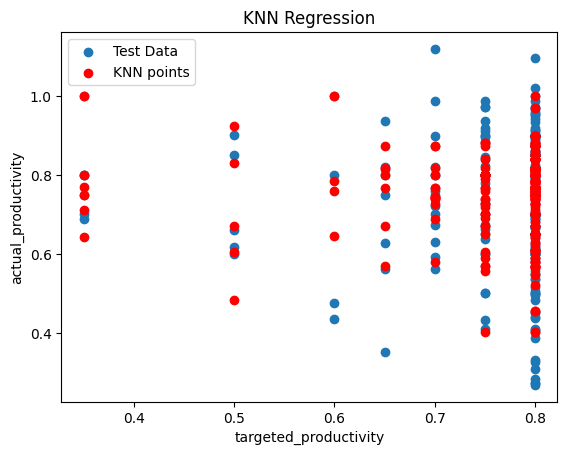

In [ ]:
model2.fit(X_train2_nomulti, y_train2_nomulti)
y_pred2_nomulti = model2.predict(X_test2_nomulti)
print(y_pred2_nomulti)
knn = pd.DataFrame({'Predicted':y_pred2_nomulti,'Actual':y_test2_nomulti})
print(knn)
print(r2_score(y_test2_nomulti,y_pred2_nomulti))
print(metrics.mean_absolute_error(y_test2_nomulti,y_pred2_nomulti))
print(mean_squared_error(y_test2_nomulti,y_pred2_nomulti))
mse = mean_squared_error(y_test2_nomulti, y_pred2_nomulti)
rmse = np.sqrt(mse)
print(rmse)

plt.scatter(data['targeted_productivity'][:len(y_test2_nomulti)], y_test2_nomulti, label='Test Data')
plt.scatter(data['targeted_productivity'][:len(y_pred2_nomulti)], y_pred2_nomulti, color='red', linewidth=1, label='KNN points')
plt.xlabel('targeted_productivity')
plt.ylabel('actual_productivity')
plt.title('KNN Regression')
plt.legend()
plt.show()

**70-30 Train Test Split**

In [ ]:
model3=KNeighborsRegressor(n_neighbors=5)

[0.45485832 0.8003805  0.90033551 0.54425713 0.74983444 0.83640606
 0.67159091 0.80050773 0.67153289 0.8704292  0.74459375 0.80020443
 0.84025473 0.64433886 0.59252957 0.78167496 0.84036455 0.74983444
 0.76787111 0.56429118 0.79016982 0.74058717 0.80029555 0.67159091
 0.72788534 0.57017257 0.81619917 0.81619917 0.86097614 0.97016402
 0.50074372 0.53013354 0.73022218 0.63325487 0.59252957 0.64433886
 0.74270556 0.55648485 0.75069009 0.75024013 0.69684326 0.64433886
 0.85048073 0.64433886 0.59252957 0.74983444 0.74983444 0.81619917
 0.69684326 0.67159091 0.75972785 0.81054156 0.69684326 0.81619917
 0.8704292  0.54586247 0.64433886 0.83640606 0.80039054 0.74459375
 0.76787111 0.78031093 0.55648485 0.64038915 0.80039054 0.78038623
 0.64433886 0.77019444 0.64272089 0.69684326 0.71828299 0.59252957
 0.64433886 0.62833741 0.90653194 0.76787111 0.54425713 1.0002585
 0.67159091 0.72788534 0.90653194 0.86097614 0.62035884 0.74983444
 0.75064431 0.70427462 0.78025187 0.69684326 0.71022725 0.75040

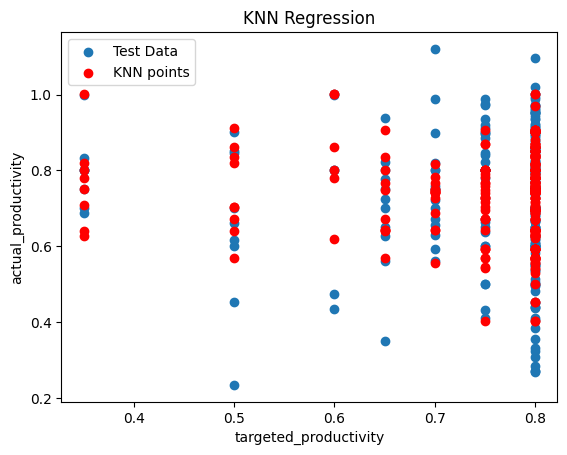

In [ ]:
model3.fit(X_train3_nomulti, y_train3_nomulti)
y_pred3_nomulti = model3.predict(X_test3_nomulti)
print(y_pred3_nomulti)
knn = pd.DataFrame({'Predicted':y_pred3_nomulti,'Actual':y_test3_nomulti})
print(knn)

print(r2_score(y_test3_nomulti,y_pred3_nomulti))
print(metrics.mean_absolute_error(y_test3_nomulti,y_pred3_nomulti))
print(mean_squared_error(y_test3_nomulti,y_pred3_nomulti))
mse = mean_squared_error(y_test3_nomulti, y_pred3_nomulti)
rmse = np.sqrt(mse)
print(rmse)

plt.scatter(data['targeted_productivity'][:len(y_test3_nomulti)], y_test3_nomulti, label='Test Data')
plt.scatter(data['targeted_productivity'][:len(y_pred3_nomulti)], y_pred3_nomulti, color='red', linewidth=1, label='KNN points')
plt.xlabel('targeted_productivity')
plt.ylabel('actual_productivity')
plt.title('KNN Regression')
plt.legend()
plt.show()

**60-40 Train Test Split**

In [ ]:
model4=KNeighborsRegressor(n_neighbors=5)

[0.45485832 0.8003805  0.90033551 0.59024654 0.72971    0.65336066
 0.67834806 0.80045076 0.69155391 0.79641663 0.77792623 0.80020548
 0.86015772 0.73077372 0.6501017  0.80038599 0.84036455 0.72971
 0.76787111 0.56429118 0.80015617 0.73046349 0.80025525 0.67834806
 0.81213701 0.55080862 0.68786957 0.68786957 0.78149482 0.96827191
 0.53079277 0.53013354 0.75017949 0.63038673 0.6501017  0.73077372
 0.74334752 0.70016833 0.75069009 0.74267101 0.551669   0.73077372
 0.85050597 0.73077372 0.6501017  0.72971    0.72971    0.68786957
 0.551669   0.67834806 0.72089903 0.81054156 0.551669   0.68786957
 0.79641663 0.54586247 0.73077372 0.65336066 0.80039054 0.77792623
 0.76787111 0.78023515 0.70016833 0.62030724 0.80039054 0.78033883
 0.73077372 0.78015234 0.64274837 0.551669   0.83489025 0.6501017
 0.73077372 0.55295185 0.80539167 0.76787111 0.52023453 1.0002585
 0.67834806 0.81213701 0.80539167 0.78149482 0.65350732 0.72971
 0.75064431 0.70384125 0.78025187 0.551669   0.71022725 0.75038426
 0.

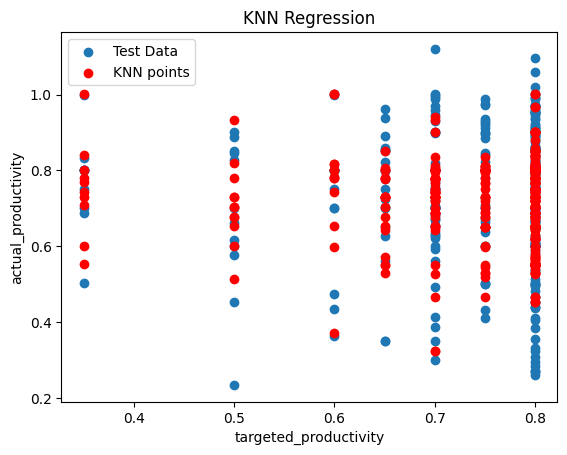

In [ ]:
model4.fit(X_train4_nomulti, y_train4_nomulti)
y_pred4_nomulti = model4.predict(X_test4_nomulti)
print(y_pred4_nomulti)
knn = pd.DataFrame({'Predicted':y_pred4_nomulti,'Actual':y_test4_nomulti})
print(knn)

print(r2_score(y_test4_nomulti,y_pred4_nomulti))
print(metrics.mean_absolute_error(y_test4_nomulti,y_pred4_nomulti))
print(mean_squared_error(y_test4_nomulti,y_pred4_nomulti))
mse = mean_squared_error(y_test4_nomulti, y_pred4_nomulti)
rmse = np.sqrt(mse)
print(rmse)

plt.scatter(data['targeted_productivity'][:len(y_test4_nomulti)], y_test4_nomulti,label='Test Data')
plt.scatter(data['targeted_productivity'][:len(y_pred4_nomulti)], y_pred4_nomulti, color='red', linewidth=1, label='KNN points')
plt.xlabel('targeted_productivity')
plt.ylabel('actual_productivity')
plt.title('KNN Regression')
plt.legend()
plt.show()

# **Support Vector Machine (After VIF)**

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
model = SVR(kernel='rbf')

**80-20 Train Test Split**

[0.73072739 0.77050818 0.89068822 0.69218857 0.73458879 0.73455801
 0.73364153 0.77069306 0.69954948 0.73363452 0.73496606 0.72536867
 0.80092459 0.73450183 0.73390447 0.72558691 0.75889593 0.73458879
 0.73487715 0.69126533 0.740183   0.69497886 0.77054555 0.73364153
 0.73395365 0.69265507 0.73432583 0.73432583 0.73482096 0.95393833
 0.69137821 0.68908165 0.72217858 0.68935163 0.73390447 0.73450183
 0.71280931 0.73400981 0.70920446 0.71260404 0.73426957 0.73450183
 0.8245155  0.73450183 0.73390447 0.73458879 0.73458879 0.73432583
 0.73426957 0.73364153 0.73358539 0.82369208 0.73426957 0.73432583
 0.73363452 0.6893051  0.73450183 0.73455801 0.69976102 0.73496606
 0.73487715 0.72482696 0.73400981 0.6921845  0.69976102 0.72471734
 0.73450183 0.73839064 0.70289236 0.73426957 0.73502226 0.73390447
 0.73450183 0.73396061 0.73464506 0.73487715 0.69263136 1.01865301
 0.73364153 0.73395365 0.73464506 0.73482096 0.68853669 0.73458879
 0.70648967 0.73369068 0.77004857 0.73426957 0.69816551 0.7119

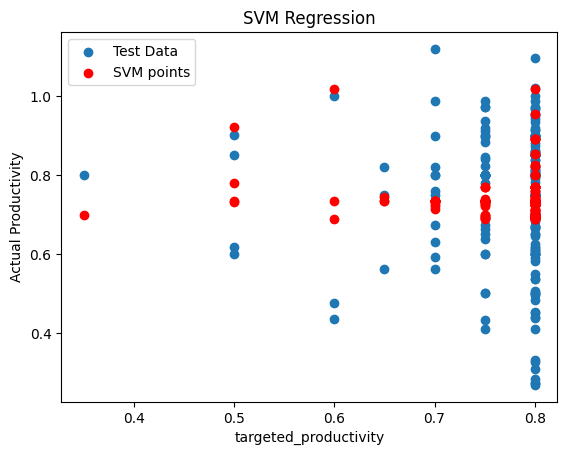

In [ ]:
model.fit(X_train1_nomulti, y_train1_nomulti)
y_pred1_nomulti= model.predict(X_test1_nomulti)
print(y_pred1_nomulti)
svm = pd.DataFrame({'Predicted':y_pred1_nomulti,'Actual':y_test1_nomulti})
print(svm)

print(r2_score(y_test1_nomulti,y_pred1_nomulti))
print(metrics.mean_absolute_error(y_test1_nomulti,y_pred1_nomulti))
print(metrics.mean_squared_error(y_test1_nomulti,y_pred1_nomulti))
mse = mean_squared_error(y_test1_nomulti, y_pred1_nomulti)
rmse = np.sqrt(mse)
print(rmse)
mape = mean_absolute_percentage_error(y_test1_nomulti, y_pred1_nomulti)
print(mape)
mape = mape * 100
print(mape)

plt.scatter(data['targeted_productivity'][:len(y_test1_nomulti)], y_test1_nomulti, label='Test Data')
plt.scatter(data['targeted_productivity'][:len(y_test1_nomulti)], y_pred1_nomulti, color='red', linewidth=1, label='SVM points')
plt.xlabel('targeted_productivity')
plt.ylabel('Actual Productivity')
plt.title('SVM Regression')
plt.legend()
plt.show()

In [ ]:
model2 = SVR(kernel='rbf')

**75-25 Train Test Split**

[0.73014281 0.76970761 0.89031901 0.69241918 0.73373966 0.73374433
 0.73288427 0.76986442 0.69972506 0.73288599 0.73402049 0.72508091
 0.79995741 0.73360928 0.73306992 0.72521268 0.75816559 0.73373966
 0.73406506 0.69155409 0.73964814 0.69522089 0.76969812 0.73288427
 0.73320669 0.69290532 0.73355399 0.73355399 0.73392999 0.95514367
 0.69182829 0.68951185 0.72208621 0.6898127  0.73306992 0.73360928
 0.71264317 0.73334172 0.70923671 0.71247092 0.73341888 0.73360928
 0.82351738 0.73360928 0.73306992 0.73373966 0.73373966 0.73355399
 0.73341888 0.73288427 0.73274925 0.82277617 0.73341888 0.73355399
 0.73288599 0.68969709 0.73360928 0.73374433 0.69984007 0.73402049
 0.73406506 0.72465123 0.73334172 0.69242222 0.69984007 0.72439616
 0.73360928 0.73807667 0.70290938 0.73341888 0.73415556 0.73306992
 0.73360928 0.73320495 0.73387479 0.73406506 0.69281203 1.02285452
 0.73288427 0.73320669 0.73387479 0.73392999 0.68914736 0.73373966
 0.70666642 0.73302102 0.76930932 0.73341888 0.69830768 0.7118

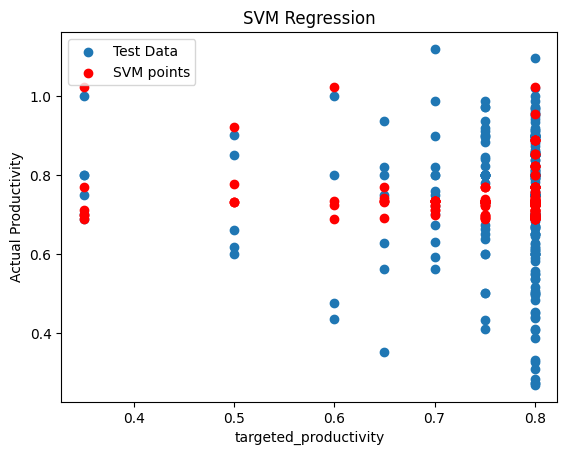

In [ ]:
model2.fit(X_train2_nomulti, y_train2_nomulti)
y_pred2_nomulti = model2.predict(X_test2_nomulti)
print(y_pred2_nomulti)
svm = pd.DataFrame({'Predicted':y_pred2_nomulti,'Actual':y_test2_nomulti})
print(svm)

print(r2_score(y_test2_nomulti,y_pred2_nomulti))
print(metrics.mean_absolute_error(y_test2_nomulti,y_pred2_nomulti))
print(mean_squared_error(y_test2_nomulti,y_pred2_nomulti))
mse = mean_squared_error(y_test2_nomulti, y_pred2_nomulti)
rmse = np.sqrt(mse)
print(rmse)
mape = mean_absolute_percentage_error(y_test2_nomulti, y_pred2_nomulti)
print(mape)
mape = mape * 100
print(mape)

plt.scatter(data['targeted_productivity'][:len(y_test2_nomulti)], y_test2_nomulti, label='Test Data')
plt.scatter(data['targeted_productivity'][:len(y_test2_nomulti)], y_pred2_nomulti, color='red', linewidth=1, label='SVM points')
plt.xlabel('targeted_productivity')
plt.ylabel('Actual Productivity')
plt.title('SVM Regression')
plt.legend()
plt.show()

In [ ]:
model3 = SVR(kernel='rbf')

**70-30 Train Test Split**

[0.7286068  0.77014115 0.89032763 0.69204226 0.73192198 0.73186234
 0.73110775 0.77030432 0.69993275 0.73116583 0.73200421 0.72549141
 0.80033908 0.73169293 0.73133828 0.72559235 0.75861547 0.73192198
 0.73226233 0.69128919 0.74017391 0.6953119  0.77010147 0.73110775
 0.73156578 0.69246532 0.73169143 0.73169143 0.7320929  0.95478723
 0.69167687 0.68933763 0.72282899 0.68996059 0.73133828 0.73169293
 0.7129585  0.73173518 0.70985669 0.71278706 0.73152195 0.73169293
 0.82380145 0.73169293 0.73133828 0.73192198 0.73192198 0.73169143
 0.73152195 0.73110775 0.73093836 0.82319515 0.73152195 0.73169143
 0.73116583 0.68951268 0.73169293 0.73186234 0.70001057 0.73200421
 0.73226233 0.72523626 0.73173518 0.69234292 0.70001057 0.72488865
 0.73169293 0.73897854 0.70312803 0.73152195 0.73217363 0.73133828
 0.73169293 0.73150768 0.73209147 0.73226233 0.69233764 1.02208243
 0.73110775 0.73156578 0.73209147 0.7320929  0.68948283 0.73192198
 0.70747583 0.73133522 0.7698801  0.73152195 0.69845621 0.7123

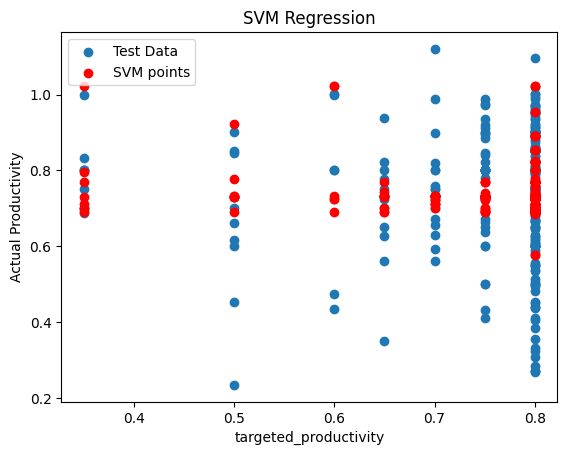

In [ ]:
model3.fit(X_train3_nomulti, y_train3_nomulti)
y_pred3_nomulti = model3.predict(X_test3_nomulti)
print(y_pred3_nomulti)
svm = pd.DataFrame({'Predicted':y_pred3_nomulti,'Actual':y_test3_nomulti})
print(svm)

print(r2_score(y_test3_nomulti,y_pred3_nomulti))
print(metrics.mean_absolute_error(y_test3_nomulti,y_pred3_nomulti))
print(mean_squared_error(y_test3_nomulti,y_pred3_nomulti))
mse = mean_squared_error(y_test3_nomulti, y_pred3_nomulti)
rmse = np.sqrt(mse)
print(rmse)
mape = mean_absolute_percentage_error(y_test3_nomulti, y_pred3_nomulti)
print(mape)
mape = mape * 100
print(mape)

plt.scatter(data['targeted_productivity'][:len(y_test3_nomulti)], y_test3_nomulti, label='Test Data')
plt.scatter(data['targeted_productivity'][:len(y_test3_nomulti)], y_pred3_nomulti, color='red', linewidth=1, label='SVM points')
plt.xlabel('targeted_productivity')
plt.ylabel('Actual Productivity')
plt.title('SVM Regression')
plt.legend()
plt.show()

In [ ]:
model4 = SVR(kernel='rbf')

**60-40 Train Test Split**

[0.7147258  0.7707358  0.88955123 0.68818267 0.71741401 0.71749126
 0.71706437 0.77084269 0.69962935 0.71695107 0.71793213 0.72628342
 0.80043704 0.71748488 0.71714889 0.72643827 0.75929237 0.71741401
 0.71758219 0.6877496  0.74134534 0.69425624 0.77077965 0.71706437
 0.71704199 0.68860239 0.71732949 0.71732949 0.71757579 0.95456804
 0.68765527 0.68582488 0.7238965  0.68831115 0.71714889 0.71748488
 0.7135379  0.71704837 0.71100816 0.7134113  0.71732306 0.71748488
 0.82361855 0.71748488 0.71714889 0.71741401 0.71741401 0.71732949
 0.71732306 0.71706437 0.71705801 0.82318269 0.71732306 0.71732949
 0.71695107 0.6859719  0.71748488 0.71749126 0.69978657 0.71793213
 0.71758219 0.72593608 0.71704837 0.69051511 0.69978657 0.72602085
 0.71748488 0.74063838 0.70318836 0.71732306 0.71793852 0.71714889
 0.71748488 0.71715527 0.71742045 0.71758219 0.68861358 1.02462008
 0.71706437 0.71704199 0.71742045 0.71757579 0.68780482 0.71741401
 0.70890872 0.71695744 0.77044894 0.71732306 0.69811194 0.7130

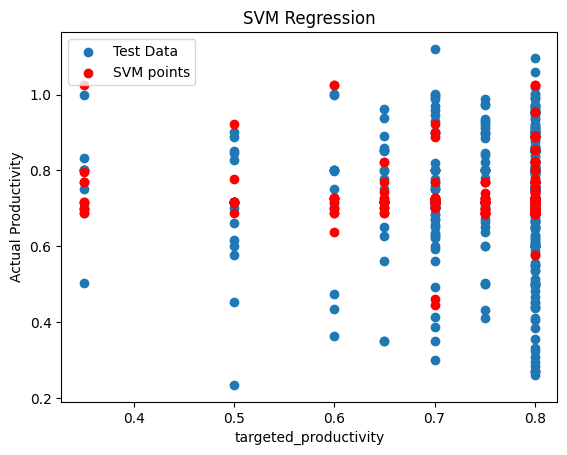

In [ ]:
model4.fit(X_train4_nomulti, y_train4_nomulti)
y_pred4_nomulti = model4.predict(X_test4_nomulti)
print(y_pred4_nomulti)
svm = pd.DataFrame({'Predicted':y_pred4_nomulti,'Actual':y_test4_nomulti})
print(svm)

print(r2_score(y_test4_nomulti,y_pred4_nomulti))
print(metrics.mean_absolute_error(y_test4_nomulti,y_pred4_nomulti))
print(mean_squared_error(y_test4_nomulti,y_pred4_nomulti))
mse = mean_squared_error(y_test4_nomulti, y_pred4_nomulti)
rmse = np.sqrt(mse)
print(rmse)
mape = mean_absolute_percentage_error(y_test4_nomulti, y_pred4_nomulti)
print(mape)
mape = mape * 100
print(mape)

plt.scatter(data['targeted_productivity'][:len(y_test4_nomulti)], y_test4_nomulti, label='Test Data')
plt.scatter(data['targeted_productivity'][:len(y_test4_nomulti)], y_pred4_nomulti, color='red', linewidth=1, label='SVM points')
plt.xlabel('targeted_productivity')
plt.ylabel('Actual Productivity')
plt.title('SVM Regression')
plt.legend()
plt.show()

# **Decision Tree (After VIF)**

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
clf = DecisionTreeRegressor(criterion="absolute_error", max_depth=3)

**80-20 Train Test Split**

In [ ]:
clf = clf.fit(X_train1_nomulti,y_train1_nomulti)
y_pred1_nomulti = clf.predict(X_test1_nomulti)
print("R-squared:", metrics.r2_score(y_test1_nomulti, y_pred1_nomulti))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test1_nomulti, y_pred1_nomulti))
print("Mean Squared Error:", metrics.mean_squared_error(y_test1_nomulti, y_pred1_nomulti))
clf = DecisionTreeRegressor(criterion="absolute_error", max_depth=3)

clf = clf.fit(X_train1_nomulti,y_train1_nomulti)
y_pred1_nomulti = clf.predict(X_test1_nomulti)
print("R-squared:", metrics.r2_score(y_test1_nomulti, y_pred1_nomulti))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test1_nomulti, y_pred1_nomulti))
print("Mean Squared Error:", metrics.mean_squared_error(y_test1_nomulti, y_pred1_nomulti))
clf = DecisionTreeRegressor(criterion="absolute_error", max_depth=2)

clf = clf.fit(X_train1_nomulti,y_train1_nomulti)
y_pred1_nomulti = clf.predict(X_test1_nomulti)
print("R-squared:", metrics.r2_score(y_test1_nomulti, y_pred1_nomulti))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test1_nomulti, y_pred1_nomulti))
print("Mean Squared Error:", metrics.mean_squared_error(y_test1_nomulti, y_pred1_nomulti))
clf = DecisionTreeRegressor(criterion="absolute_error", max_depth=3)

clf = clf.fit(X_train1_nomulti,y_train1_nomulti)
y_pred1_nomulti = clf.predict(X_test1_nomulti)
print("R-squared:", metrics.r2_score(y_test1_nomulti, y_pred1_nomulti))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test1_nomulti, y_pred1_nomulti))
print("Mean Squared Error:", metrics.mean_squared_error(y_test1_nomulti, y_pred1_nomulti))
clf = DecisionTreeRegressor(criterion="absolute_error", max_depth=6)

clf = clf.fit(X_train1_nomulti,y_train1_nomulti)
y_pred1_nomulti = clf.predict(X_test1_nomulti)
print("R-squared:", metrics.r2_score(y_test1_nomulti, y_pred1_nomulti))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test1_nomulti, y_pred1_nomulti))
print("Mean Squared Error:", metrics.mean_squared_error(y_test1_nomulti, y_pred1_nomulti))
clf = DecisionTreeRegressor(criterion="absolute_error", max_depth=3)

clf = clf.fit(X_train1_nomulti,y_train1_nomulti)
y_pred1_nomulti = clf.predict(X_test1_nomulti)
print("R-squared:", metrics.r2_score(y_test1_nomulti, y_pred1_nomulti))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test1_nomulti, y_pred1_nomulti))
print("Mean Squared Error:", metrics.mean_squared_error(y_test1_nomulti, y_pred1_nomulti))

y_pred_train1 = clf.predict(X_train1_nomulti)
print("R-squared:", metrics.r2_score(y_test1_nomulti, y_pred1_nomulti))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test1_nomulti, y_pred1_nomulti))
print("Mean Squared Error:", metrics.mean_squared_error(y_test1_nomulti, y_pred1_nomulti))

R-squared: 0.11106785592616453
Mean Absolute Error: 0.11344481334635416
Mean Squared Error: 0.02499648448254815
R-squared: 0.11106785592616453
Mean Absolute Error: 0.11344481334635416
Mean Squared Error: 0.02499648448254815
R-squared: 0.10625619455123891
Mean Absolute Error: 0.11782228152604167
Mean Squared Error: 0.025131786844708667
R-squared: 0.11106785592616453
Mean Absolute Error: 0.11344481334635416
Mean Squared Error: 0.02499648448254815
R-squared: 0.1723964126728198
Mean Absolute Error: 0.10360575570052083
Mean Squared Error: 0.02327194529553062
R-squared: 0.11106785592616453
Mean Absolute Error: 0.11344481334635416
Mean Squared Error: 0.02499648448254815
R-squared: 0.11106785592616453
Mean Absolute Error: 0.11344481334635416
Mean Squared Error: 0.02499648448254815


**75-25 Train Test Split**

In [ ]:
clf2=DecisionTreeRegressor(criterion="absolute_error", max_depth=3)

In [ ]:
clf2 = clf2.fit(X_train2_nomulti,y_train2_nomulti)
y_pred2_nomulti = clf2.predict(X_test2_nomulti)
print("R-squared:", metrics.r2_score(y_test2_nomulti, y_pred2_nomulti))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test2_nomulti, y_pred2_nomulti))
print("Mean Squared Error:", metrics.mean_squared_error(y_test2_nomulti, y_pred2_nomulti))
clf2 = DecisionTreeRegressor(criterion="absolute_error", max_depth=3)

clf2 = clf2.fit(X_train2_nomulti,y_train2_nomulti)
y_pred2_nomulti = clf2.predict(X_test2_nomulti)
print("R-squared:", metrics.r2_score(y_test2_nomulti, y_pred2_nomulti))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test2_nomulti, y_pred2_nomulti))
print("Mean Squared Error:", metrics.mean_squared_error(y_test2_nomulti, y_pred2_nomulti))
clf2 = DecisionTreeRegressor(criterion="absolute_error", max_depth=2)

clf2 = clf2.fit(X_train2_nomulti,y_train2_nomulti)
y_pred2_nomulti = clf2.predict(X_test2_nomulti)
print("R-squared:", metrics.r2_score(y_test2_nomulti, y_pred2_nomulti))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test2_nomulti, y_pred2_nomulti))
print("Mean Squared Error:", metrics.mean_squared_error(y_test2_nomulti, y_pred2_nomulti))
clf2 = DecisionTreeRegressor(criterion="absolute_error", max_depth=3)

clf2 = clf2.fit(X_train2_nomulti,y_train2_nomulti)
y_pred = clf2.predict(X_test2_nomulti)
print("R-squared:", metrics.r2_score(y_test2_nomulti, y_pred2_nomulti))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test2_nomulti, y_pred2_nomulti))
print("Mean Squared Error:", metrics.mean_squared_error(y_test2_nomulti, y_pred2_nomulti))
clf2 = DecisionTreeRegressor(criterion="absolute_error", max_depth=6)

clf2 = clf2.fit(X_train2_nomulti,y_train2_nomulti)
y_pred2_nomulti = clf2.predict(X_test2_nomulti)
print("R-squared:", metrics.r2_score(y_test2_nomulti, y_pred2_nomulti))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test2_nomulti, y_pred2_nomulti))
print("Mean Squared Error:", metrics.mean_squared_error(y_test2_nomulti, y_pred2_nomulti))
clf2 = DecisionTreeRegressor(criterion="absolute_error", max_depth=3)

clf2 = clf2.fit(X_train2_nomulti,y_train2_nomulti)
y_pred2_nomulti = clf2.predict(X_test2_nomulti)
print("R-squared:", metrics.r2_score(y_test2_nomulti, y_pred2_nomulti))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test2_nomulti, y_pred2_nomulti))
print("Mean Squared Error:", metrics.mean_squared_error(y_test2_nomulti, y_pred2_nomulti))

y_pred_train2 = clf2.predict(X_train2_nomulti)
print("R-squared:", metrics.r2_score(y_test2_nomulti, y_pred2_nomulti))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test2_nomulti, y_pred2_nomulti))
print("Mean Squared Error:", metrics.mean_squared_error(y_test2_nomulti, y_pred2_nomulti))

R-squared: 0.12332993613421861
Mean Absolute Error: 0.10760592284791667
Mean Squared Error: 0.023236891310262717
R-squared: 0.12332993613421861
Mean Absolute Error: 0.10760592284791667
Mean Squared Error: 0.023236891310262717
R-squared: 0.11578537769130148
Mean Absolute Error: 0.11216814783750001
Mean Squared Error: 0.023436866297145385
R-squared: 0.11578537769130148
Mean Absolute Error: 0.11216814783750001
Mean Squared Error: 0.023436866297145385
R-squared: 0.1730423738730973
Mean Absolute Error: 0.10127730689166665
Mean Squared Error: 0.021919220546631642
R-squared: 0.12332993613421861
Mean Absolute Error: 0.10760592284791667
Mean Squared Error: 0.023236891310262717
R-squared: 0.12332993613421861
Mean Absolute Error: 0.10760592284791667
Mean Squared Error: 0.023236891310262717


**70-30 Train Test Split**

In [ ]:
clf3=DecisionTreeRegressor(criterion="absolute_error", max_depth=3)

In [ ]:
clf3 = clf3.fit(X_train3_nomulti,y_train3_nomulti)
y_pred3_nomulti = clf3.predict(X_test3_nomulti)
print("R-squared:", metrics.r2_score(y_test3_nomulti, y_pred3_nomulti))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test3_nomulti, y_pred3_nomulti))
print("Mean Squared Error:", metrics.mean_squared_error(y_test3_nomulti, y_pred3_nomulti))
clf3 = DecisionTreeRegressor(criterion="absolute_error", max_depth=3)

clf3 = clf3.fit(X_train3_nomulti,y_train3_nomulti)
y_pred3_nomulti = clf3.predict(X_test3_nomulti)
print("R-squared:", metrics.r2_score(y_test3_nomulti, y_pred3_nomulti))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test3_nomulti, y_pred3_nomulti))
print("Mean Squared Error:", metrics.mean_squared_error(y_test3_nomulti, y_pred3_nomulti))
clf3 = DecisionTreeRegressor(criterion="absolute_error", max_depth=2)

clf3 = clf3.fit(X_train3_nomulti,y_train3_nomulti)
y_pred3_nomulti = clf3.predict(X_test3_nomulti)
print("R-squared:", metrics.r2_score(y_test3_nomulti, y_pred3_nomulti))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test3_nomulti, y_pred3_nomulti))
print("Mean Squared Error:", metrics.mean_squared_error(y_test3_nomulti, y_pred3_nomulti))
clf3 = DecisionTreeRegressor(criterion="absolute_error", max_depth=3)

clf3 = clf3.fit(X_train3_nomulti,y_train3_nomulti)
y_pred3_nomulti = clf3.predict(X_test3_nomulti)
print("R-squared:", metrics.r2_score(y_test3_nomulti, y_pred3_nomulti))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test3_nomulti, y_pred3_nomulti))
print("Mean Squared Error:", metrics.mean_squared_error(y_test3_nomulti, y_pred3_nomulti))
clf3 = DecisionTreeRegressor(criterion="absolute_error", max_depth=6)

clf3 = clf3.fit(X_train3_nomulti,y_train3_nomulti)
y_pred = clf3.predict(X_test3_nomulti)
print("R-squared:", metrics.r2_score(y_test3_nomulti, y_pred3_nomulti))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test3_nomulti, y_pred3_nomulti))
print("Mean Squared Error:", metrics.mean_squared_error(y_test3_nomulti, y_pred3_nomulti))
clf3 = DecisionTreeRegressor(criterion="absolute_error", max_depth=3)

clf3 = clf3.fit(X_train3_nomulti,y_train3_nomulti)
y_pred3_nomulti = clf3.predict(X_test3_nomulti)
print("R-squared:", metrics.r2_score(y_test3_nomulti, y_pred3_nomulti))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test3_nomulti, y_pred3_nomulti))
print("Mean Squared Error:", metrics.mean_squared_error(y_test3_nomulti, y_pred3_nomulti))

y_pred_train3 = clf3.predict(X_train3_nomulti)
print("R-squared:", metrics.r2_score(y_test3_nomulti, y_pred3_nomulti))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test3_nomulti, y_pred3_nomulti))
print("Mean Squared Error:", metrics.mean_squared_error(y_test3_nomulti, y_pred3_nomulti))

R-squared: 0.135741790066633
Mean Absolute Error: 0.10443874798784722
Mean Squared Error: 0.022779835178781804
R-squared: 0.135741790066633
Mean Absolute Error: 0.10443874798784722
Mean Squared Error: 0.022779835178781804
R-squared: 0.12745687350609547
Mean Absolute Error: 0.10915055633159723
Mean Squared Error: 0.022998206299298617
R-squared: 0.135741790066633
Mean Absolute Error: 0.10443874798784722
Mean Squared Error: 0.022779835178781804
R-squared: 0.135741790066633
Mean Absolute Error: 0.10443874798784722
Mean Squared Error: 0.022779835178781804
R-squared: 0.135741790066633
Mean Absolute Error: 0.10443874798784722
Mean Squared Error: 0.022779835178781804
R-squared: 0.135741790066633
Mean Absolute Error: 0.10443874798784722
Mean Squared Error: 0.022779835178781804


**60-40 Train Test Split**

In [ ]:
clf4=DecisionTreeRegressor(criterion="absolute_error", max_depth=3)

In [ ]:
clf4 = clf4.fit(X_train4_nomulti,y_train4_nomulti)
y_pred4_nomulti = clf4.predict(X_test4_nomulti)
print("R-squared:", metrics.r2_score(y_test4_nomulti, y_pred4_nomulti))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test4_nomulti, y_pred4_nomulti))
print("Mean Squared Error:", metrics.mean_squared_error(y_test4_nomulti, y_pred4_nomulti))
clf4 = DecisionTreeRegressor(criterion="absolute_error", max_depth=3)

clf4 = clf4.fit(X_train4_nomulti,y_train4_nomulti)
y_pred4_nomulti = clf4.predict(X_test4_nomulti)
print("R-squared:", metrics.r2_score(y_test4_nomulti, y_pred4_nomulti))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test4_nomulti, y_pred4_nomulti))
print("Mean Squared Error:", metrics.mean_squared_error(y_test4_nomulti, y_pred4_nomulti))
clf4 = DecisionTreeRegressor(criterion="absolute_error", max_depth=2)

clf4 = clf4.fit(X_train4_nomulti,y_train4_nomulti)
y_pred = clf4.predict(X_test4_nomulti)
print("R-squared:", metrics.r2_score(y_test4_nomulti, y_pred4_nomulti))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test4_nomulti, y_pred4_nomulti))
print("Mean Squared Error:", metrics.mean_squared_error(y_test4_nomulti, y_pred4_nomulti))
clf4 = DecisionTreeRegressor(criterion="absolute_error", max_depth=3)

clf4 = clf4.fit(X_train4_nomulti,y_train4_nomulti)
y_pred4_nomulti = clf4.predict(X_test4_nomulti)
print("R-squared:", metrics.r2_score(y_test4_nomulti, y_pred4_nomulti))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test4_nomulti, y_pred4_nomulti))
print("Mean Squared Error:", metrics.mean_squared_error(y_test4_nomulti, y_pred4_nomulti))
clf4 = DecisionTreeRegressor(criterion="absolute_error", max_depth=6)

clf4 = clf4.fit(X_train4_nomulti,y_train4_nomulti)
y_pred4_nomulti = clf4.predict(X_test4_nomulti)
print("R-squared:", metrics.r2_score(y_test4_nomulti, y_pred4_nomulti))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test4_nomulti ,y_pred4_nomulti))
print("Mean Squared Error:", metrics.mean_squared_error(y_test4_nomulti ,y_pred4_nomulti))
clf4 = DecisionTreeRegressor(criterion="absolute_error", max_depth=3)

clf4 = clf4.fit(X_train4_nomulti,y_train4_nomulti)
y_pred4_nomulti = clf4.predict(X_test4_nomulti)
print("R-squared:", metrics.r2_score(y_test4_nomulti, y_pred4_nomulti))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test4_nomulti, y_pred4_nomulti))
print("Mean Squared Error:", metrics.mean_squared_error(y_test4_nomulti, y_pred4_nomulti))

y_pred_train4 = clf4.predict(X_train4_nomulti)
print("R-squared:", metrics.r2_score(y_test4_nomulti, y_pred4_nomulti))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test4_nomulti, y_pred4_nomulti))
print("Mean Squared Error:", metrics.mean_squared_error(y_test4_nomulti, y_pred4_nomulti))

R-squared: 0.13599667750742617
Mean Absolute Error: 0.10545448448955613
Mean Squared Error: 0.023543731240293617
R-squared: 0.13599667750742617
Mean Absolute Error: 0.10545448448955613
Mean Squared Error: 0.023543731240293617
R-squared: 0.13599667750742617
Mean Absolute Error: 0.10545448448955613
Mean Squared Error: 0.023543731240293617
R-squared: 0.13599667750742617
Mean Absolute Error: 0.10545448448955613
Mean Squared Error: 0.023543731240293617
R-squared: 0.12415911445670291
Mean Absolute Error: 0.10042403770496083
Mean Squared Error: 0.02386629991074992
R-squared: 0.13599667750742617
Mean Absolute Error: 0.10545448448955613
Mean Squared Error: 0.023543731240293617
R-squared: 0.13599667750742617
Mean Absolute Error: 0.10545448448955613
Mean Squared Error: 0.023543731240293617


## **Boosting (After VIF)**

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

**80-20 Train Test Split**

In [ ]:
#Check for duplicated column names in X_train1
duplicate_columns = X_train1_nomulti.columns[X_train1_nomulti.columns.duplicated()]

# If there are duplicated columns, print them and handle them appropriately
if len(duplicate_columns) > 0:
    print("Duplicated columns in X_train1_nomulti:", duplicate_columns)
    # Option 1: Rename the duplicated columns
    # X_train1 = X_train1.loc[:,~X_train1.columns.duplicated()]
    # Option 2: Drop the duplicated columns
    X_train1_nomulti = X_train1_nomulti.loc[:, ~X_train1_nomulti.columns.duplicated(keep='first')]
    # Or any other preferred method of handling duplicates

# Now proceed with model training
model1 = xgb.XGBRegressor()
model2 = xgb.XGBRegressor(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

train_model1 = model1.fit(X_train1_nomulti, y_train1_nomulti)
train_model2 = model2.fit(X_train1_nomulti, y_train1_nomulti)

In [ ]:
#prediction and Regression Report
X_test1_nomulti = X_test1_nomulti.loc[:, ~X_test1_nomulti.columns.duplicated(keep='first')]
pred1_nomulti = train_model1.predict(X_test1_nomulti)
pred2_nomulti = train_model2.predict(X_test1_nomulti)

# Evaluate the models using regression metrics
mse1 = mean_squared_error(y_test1_nomulti, pred1_nomulti)
r2_1 = r2_score(y_test1_nomulti, pred1_nomulti)
mae1 = mean_absolute_error(y_test1_nomulti, pred1_nomulti)

mse2 = mean_squared_error(y_test1_nomulti, pred2_nomulti)
r2_2 = r2_score(y_test1_nomulti, pred2_nomulti)
mae2 = mean_absolute_error(y_test1_nomulti, pred2_nomulti)


print(f'Model 1 XGboost Report:\n MSE: {mse1:.4f}, R-squared: {r2_1:.4f}, MAE: {mae1:.4f}')
print(f'Model 2 XGboost Report:\n MSE: {mse2:.4f}, R-squared: {r2_2:.4f}, MAE: {mae2:.4f}')

Model 1 XGboost Report:
 MSE: 0.0266, R-squared: 0.0552, MAE: 0.1127
Model 2 XGboost Report:
 MSE: 0.0273, R-squared: 0.0287, MAE: 0.1145


In [ ]:
model3 = xgb.XGBRegressor()
train_model3 = model3.fit(X_train1_nomulti, y_train1_nomulti)
pred3_nomulti = train_model3.predict(X_test1_nomulti)
mse3 = mean_squared_error(y_test1_nomulti, pred3_nomulti)
r2_3 = r2_score(y_test1_nomulti, pred3_nomulti)
mae3 = mean_absolute_error(y_test1_nomulti, pred3_nomulti)
print(f'Model 3 XGboost Report:\n MSE: {mse3:.4f}, R-squared: {r2_3:.4f}, MAE: {mae3:.4f}')

Model 3 XGboost Report:
 MSE: 0.0266, R-squared: 0.0552, MAE: 0.1127


In [ ]:
xgb2 = xgb.XGBRegressor(
 learning_rate =0.7,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:squarederror',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

train_model7 = xgb2.fit(X_train1_nomulti, y_train1_nomulti)
pred7_nomulti = train_model7.predict(X_test1_nomulti)
mse7 = mean_squared_error(y_test1_nomulti, pred7_nomulti)
r2_7 = r2_score(y_test1_nomulti, pred7_nomulti)
mae7 = mean_absolute_error(y_test1_nomulti, pred7_nomulti)
print(f'Model 7 XGboost Report:\n MSE: {mse7:.4f}, R-squared: {r2_7:.4f}, MAE: {mae7:.4f}')

Model 7 XGboost Report:
 MSE: 0.0270, R-squared: 0.0382, MAE: 0.1159


In [ ]:
#Let's train a fast RandomForest on the dataset
rfc = RandomForestRegressor()
rfc_model = rfc.fit(X_train1_nomulti, y_train1_nomulti)
pred8 = rfc_model.predict(X_test1_nomulti)
mse8 = mean_squared_error(y_test1_nomulti, pred8)
r2_8 = r2_score(y_test1_nomulti, pred8)
mae8 = mean_absolute_error(y_test1_nomulti, pred8)
print(f'Model 8 Random Forest Report:\n MSE: {mse8:.4f}, R-squared: {r2_8:.4f}, MAE: {mae8:.4f}')

Model 8 Random Forest Report:
 MSE: 0.0263, R-squared: 0.0651, MAE: 0.1121


**75-25 Train Test Split**

In [ ]:
# Check for duplicated column names in X_train1
duplicate_columns = X_train2_nomulti.columns[X_train2_nomulti.columns.duplicated()]

# If there are duplicated columns, print them and handle them appropriately
if len(duplicate_columns) > 0:
    print("Duplicated columns in X_train2_nomulti:", duplicate_columns)

    X_train2_nomulti = X_train2_nomulti.loc[:, ~X_train2_nomulti.columns.duplicated(keep='first')]
    # Or any other preferred method of handling duplicates

# Now proceed with model training
model1 = xgb.XGBRegressor()
model2 = xgb.XGBRegressor(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

train_model1 = model1.fit(X_train2_nomulti, y_train2_nomulti)
train_model2 = model2.fit(X_train2_nomulti, y_train2_nomulti)

In [ ]:
#prediction and Regression Report
X_test2_nomulti = X_test2_nomulti.loc[:, ~X_test2_nomulti.columns.duplicated(keep='first')]
pred1_nomulti = train_model1.predict(X_test2_nomulti)
pred2_nomulti = train_model2.predict(X_test2_nomulti)

# Evaluate the models using regression metrics
mse1 = mean_squared_error(y_test2_nomulti, pred1_nomulti)
r2_1 = r2_score(y_test2_nomulti, pred1_nomulti)
mae1 = mean_absolute_error(y_test2_nomulti, pred1_nomulti)

mse2 = mean_squared_error(y_test2_nomulti, pred2_nomulti)
r2_2 = r2_score(y_test2_nomulti, pred2_nomulti)
mae2 = mean_absolute_error(y_test2_nomulti, pred2_nomulti)


print(f'Model 1 XGboost Report:\n MSE: {mse1:.4f}, R-squared: {r2_1:.4f}, MAE: {mae1:.4f}')
print(f'Model 2 XGboost Report:\n MSE: {mse2:.4f}, R-squared: {r2_2:.4f}, MAE: {mae2:.4f}')

Model 1 XGboost Report:
 MSE: 0.0243, R-squared: 0.0847, MAE: 0.1067
Model 2 XGboost Report:
 MSE: 0.0249, R-squared: 0.0609, MAE: 0.1082


In [ ]:
model3 = xgb.XGBRegressor()
train_model3 = model3.fit(X_train2_nomulti, y_train2_nomulti)
pred3_nomulti = train_model3.predict(X_test2_nomulti)
mse3 = mean_squared_error(y_test2_nomulti, pred3_nomulti)
r2_3 = r2_score(y_test2_nomulti, pred3_nomulti)
mae3 = mean_absolute_error(y_test2_nomulti, pred3_nomulti)
print(f'Model 3 XGboost Report:\n MSE: {mse3:.4f}, R-squared: {r2_3:.4f}, MAE: {mae3:.4f}')

Model 3 XGboost Report:
 MSE: 0.0243, R-squared: 0.0847, MAE: 0.1067


In [ ]:
xgb2 = xgb.XGBRegressor(
 learning_rate =0.7,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:squarederror',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

train_model7 = xgb2.fit(X_train2_nomulti, y_train2_nomulti)
pred7_nomulti = train_model7.predict(X_test2_nomulti)
mse7 = mean_squared_error(y_test2_nomulti, pred7_nomulti)
r2_7 = r2_score(y_test2_nomulti, pred7_nomulti)
mae7 = mean_absolute_error(y_test2_nomulti, pred7_nomulti)
print(f'Model 7 XGboost Report:\n MSE: {mse7:.4f}, R-squared: {r2_7:.4f}, MAE: {mae7:.4f}')

Model 7 XGboost Report:
 MSE: 0.0256, R-squared: 0.0335, MAE: 0.1106


In [ ]:
#Let's train a fast RandomForest on the dataset
rfc = RandomForestRegressor()
rfc_model = rfc.fit(X_train2_nomulti, y_train2_nomulti)
pred8 = rfc_model.predict(X_test2_nomulti)
mse8 = mean_squared_error(y_test2_nomulti, pred8)
r2_8 = r2_score(y_test2_nomulti, pred8)
mae8 = mean_absolute_error(y_test2_nomulti, pred8)
print(f'Model 8 Random Forest Report:\n MSE: {mse8:.4f}, R-squared: {r2_8:.4f}, MAE: {mae8:.4f}')

Model 8 Random Forest Report:
 MSE: 0.0239, R-squared: 0.0985, MAE: 0.1063


**70-30 Train Test Split**

In [ ]:
# Check for duplicated column names in X_train1
duplicate_columns = X_train3_nomulti.columns[X_train3_nomulti.columns.duplicated()]

# If there are duplicated columns, print them and handle them appropriately
if len(duplicate_columns) > 0:
    print("Duplicated columns in X_train3_nomulti:", duplicate_columns)

    X_train3_nomulti = X_train3_nomulti.loc[:, ~X_train3_nomulti.columns.duplicated(keep='first')]
    # Or any other preferred method of handling duplicates

# Now proceed with model training
model1 = xgb.XGBRegressor()
model2 = xgb.XGBRegressor(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

train_model1 = model1.fit(X_train3_nomulti, y_train3_nomulti)
train_model2 = model2.fit(X_train3_nomulti, y_train3_nomulti)

In [ ]:
#prediction and Regression Report
X_test3_nomulti = X_test3_nomulti.loc[:, ~X_test3_nomulti.columns.duplicated(keep='first')]
pred1_nomulti = train_model1.predict(X_test3_nomulti)
pred2_nomulti = train_model2.predict(X_test3_nomulti)

# Evaluate the models using regression metrics
mse1 = mean_squared_error(y_test3_nomulti, pred1_nomulti)
r2_1 = r2_score(y_test3_nomulti, pred1_nomulti)
mae1 = mean_absolute_error(y_test3_nomulti, pred1_nomulti)

mse2 = mean_squared_error(y_test3_nomulti, pred2_nomulti)
r2_2 = r2_score(y_test3_nomulti, pred2_nomulti)
mae2 = mean_absolute_error(y_test3_nomulti, pred2_nomulti)


print(f'Model 1 XGboost Report:\n MSE: {mse1:.4f}, R-squared: {r2_1:.4f}, MAE: {mae1:.4f}')
print(f'Model 2 XGboost Report:\n MSE: {mse2:.4f}, R-squared: {r2_2:.4f}, MAE: {mae2:.4f}')

Model 1 XGboost Report:
 MSE: 0.0242, R-squared: 0.0814, MAE: 0.1053
Model 2 XGboost Report:
 MSE: 0.0249, R-squared: 0.0537, MAE: 0.1080


In [ ]:
model3 = xgb.XGBRegressor()
train_model3 = model3.fit(X_train3_nomulti, y_train3_nomulti)
pred3_nomulti = train_model3.predict(X_test3_nomulti)
mse3 = mean_squared_error(y_test3_nomulti, pred3_nomulti)
r2_3 = r2_score(y_test3_nomulti, pred3_nomulti)
mae3 = mean_absolute_error(y_test3_nomulti, pred3_nomulti)
print(f'Model 3 XGboost Report:\n MSE: {mse3:.4f}, R-squared: {r2_3:.4f}, MAE: {mae3:.4f}')

Model 3 XGboost Report:
 MSE: 0.0242, R-squared: 0.0814, MAE: 0.1053


In [ ]:
xgb2 = xgb.XGBRegressor(
 learning_rate =0.7,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:squarederror',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

train_model7 = xgb2.fit(X_train3_nomulti, y_train3_nomulti)
pred7_nomulti = train_model7.predict(X_test3_nomulti)
mse7 = mean_squared_error(y_test3_nomulti, pred7_nomulti)
r2_7 = r2_score(y_test3_nomulti, pred7_nomulti)
mae7 = mean_absolute_error(y_test3_nomulti, pred7_nomulti)
print(f'Model 7 XGboost Report:\n MSE: {mse7:.4f}, R-squared: {r2_7:.4f}, MAE: {mae7:.4f}')

Model 7 XGboost Report:
 MSE: 0.0242, R-squared: 0.0806, MAE: 0.1094


In [ ]:
#Let's train a fast RandomForest on the dataset

rfc = RandomForestRegressor()
rfc_model = rfc.fit(X_train3_nomulti, y_train3_nomulti)
pred8 = rfc_model.predict(X_test3_nomulti)
mse8 = mean_squared_error(y_test3_nomulti, pred8)
r2_8 = r2_score(y_test3_nomulti, pred8)
mae8 = mean_absolute_error(y_test3_nomulti, pred8)
print(f'Model 8 Random Forest Report:\n MSE: {mse8:.4f}, R-squared: {r2_8:.4f}, MAE: {mae8:.4f}')

Model 8 Random Forest Report:
 MSE: 0.0239, R-squared: 0.0938, MAE: 0.1046


**60-40 Train Test Split**

In [ ]:
# Check for duplicated column names in X_train1
duplicate_columns = X_train4_nomulti.columns[X_train4_nomulti.columns.duplicated()]

# If there are duplicated columns, print them and handle them appropriately
if len(duplicate_columns) > 0:
    print("Duplicated columns in X_train4_nomulti:", duplicate_columns)

    X_train4_nomulti = X_train4_nomulti.loc[:, ~X_train4_nomulti.columns.duplicated(keep='first')]
    # Or any other preferred method of handling duplicates

# Now proceed with model training
model1 = xgb.XGBRegressor()
model2 = xgb.XGBRegressor(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

train_model1 = model1.fit(X_train4_nomulti, y_train4_nomulti)
train_model2 = model2.fit(X_train4_nomulti, y_train4_nomulti)

In [ ]:
#prediction and Regression Report
X_test4 = X_test4_nomulti.loc[:, ~X_test4_nomulti.columns.duplicated(keep='first')]
pred1_nomulti = train_model1.predict(X_test4_nomulti)
pred2_nomulti = train_model2.predict(X_test4_nomulti)

# Evaluate the models using regression metrics
mse1 = mean_squared_error(y_test4_nomulti, pred1_nomulti)
r2_1 = r2_score(y_test4_nomulti, pred1_nomulti)
mae1 = mean_absolute_error(y_test4_nomulti, pred1_nomulti)

mse2 = mean_squared_error(y_test4_nomulti, pred2_nomulti)
r2_2 = r2_score(y_test4_nomulti, pred2_nomulti)
mae2 = mean_absolute_error(y_test4_nomulti, pred2_nomulti)


print(f'Model 1 XGboost Report:\n MSE: {mse1:.4f}, R-squared: {r2_1:.4f}, MAE: {mae1:.4f}')
print(f'Model 2 XGboost Report:\n MSE: {mse2:.4f}, R-squared: {r2_2:.4f}, MAE: {mae2:.4f}')

Model 1 XGboost Report:
 MSE: 0.0237, R-squared: 0.1297, MAE: 0.1051
Model 2 XGboost Report:
 MSE: 0.0236, R-squared: 0.1331, MAE: 0.1061


In [ ]:
model3 = xgb.XGBRegressor()
train_model3 = model3.fit(X_train4_nomulti, y_train4_nomulti)
pred3_nomulti = train_model3.predict(X_test4_nomulti)
mse3 = mean_squared_error(y_test4_nomulti, pred3_nomulti)
r2_3 = r2_score(y_test4_nomulti, pred3_nomulti)
mae3 = mean_absolute_error(y_test4_nomulti, pred3_nomulti)
print(f'Model 3 XGboost Report:\n MSE: {mse3:.4f}, R-squared: {r2_3:.4f}, MAE: {mae3:.4f}')

Model 3 XGboost Report:
 MSE: 0.0237, R-squared: 0.1297, MAE: 0.1051


In [ ]:
xgb2 = xgb.XGBRegressor(
 learning_rate =0.7,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:squarederror',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

train_model7 = xgb2.fit(X_train4_nomulti, y_train4_nomulti)
pred7_nomulti = train_model7.predict(X_test4_nomulti)
mse7 = mean_squared_error(y_test4_nomulti, pred7_nomulti)
r2_7 = r2_score(y_test4_nomulti, pred7_nomulti)
mae7 = mean_absolute_error(y_test4_nomulti, pred7_nomulti)
print(f'Model 7 XGboost Report:\n MSE: {mse7:.4f}, R-squared: {r2_7:.4f}, MAE: {mae7:.4f}')

Model 7 XGboost Report:
 MSE: 0.0247, R-squared: 0.0947, MAE: 0.1123


In [ ]:
#Let's train a fast RandomForest on the dataset

rfc = RandomForestRegressor()
rfc_model = rfc.fit(X_train4_nomulti, y_train4_nomulti)
pred8 = rfc_model.predict(X_test4_nomulti)
mse8 = mean_squared_error(y_test4_nomulti, pred8)
r2_8 = r2_score(y_test4_nomulti, pred8)
mae8 = mean_absolute_error(y_test4_nomulti, pred8)
print(f'Model 8 Random Forest Report:\n MSE: {mse8:.4f}, R-squared: {r2_8:.4f}, MAE: {mae8:.4f}')

Model 8 Random Forest Report:
 MSE: 0.0234, R-squared: 0.1400, MAE: 0.1044


# **Adaptive Boosting (After VIF)**

**80-20 Train Test Split**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

estimator = DecisionTreeRegressor(max_depth=3, random_state=0)
adaboost = AdaBoostRegressor(estimator=estimator,
                              n_estimators=3,
                              random_state=0)
adaboost.fit(X_train1_nomulti, y_train1_nomulti)
y_pred_nomulti = adaboost.predict(X_test1_nomulti)
mse = mean_squared_error(y_test1_nomulti, y_pred_nomulti)
r2 = r2_score(y_test1_nomulti, y_pred_nomulti)
mae = mean_absolute_error(y_test1_nomulti, y_pred_nomulti)
print(f'Model 8 Adaptive Boosting Report:\n MSE: {mse:.4f}, R-squared: {r2:.4f}, MAE: {mae:.4f}')

Model 8 Adaptive Boosting Report:
 MSE: 0.0248, R-squared: 0.1185, MAE: 0.1176


**75-25 Train Test Split**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

estimator = DecisionTreeRegressor(max_depth=3, random_state=0)
adaboost2 = AdaBoostRegressor(estimator=estimator,  # Updated parameter name
                              n_estimators=3,
                              random_state=0)
adaboost2.fit(X_train2_nomulti, y_train2_nomulti)
y_pred_nomulti = adaboost2.predict(X_test2_nomulti)
mse = mean_squared_error(y_test2_nomulti, y_pred_nomulti)
r2 = r2_score(y_test2_nomulti, y_pred_nomulti)
mae = mean_absolute_error(y_test2_nomulti, y_pred_nomulti)
print(f'Model 8 Adaptive Boosting Report:\n MSE: {mse:.4f}, R-squared: {r2:.4f}, MAE: {mae:.4f}')

Model 8 Adaptive Boosting Report:
 MSE: 0.0223, R-squared: 0.1572, MAE: 0.1093


**70-30 Train Test Split**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

estimator = DecisionTreeRegressor(max_depth=3, random_state=0)
adaboost3 = AdaBoostRegressor(estimator=estimator,  # Updated parameter name
                              n_estimators=3,
                              random_state=0)
adaboost3.fit(X_train3_nomulti, y_train3_nomulti)
y_pred_nomulti = adaboost3.predict(X_test3_nomulti)
mse = mean_squared_error(y_test3_nomulti, y_pred_nomulti)
r2 = r2_score(y_test3_nomulti, y_pred_nomulti)
mae = mean_absolute_error(y_test3_nomulti, y_pred_nomulti)
print(f'Model 8 Adaptive Boosting Report:\n MSE: {mse:.4f}, R-squared: {r2:.4f}, MAE: {mae:.4f}')

Model 8 Adaptive Boosting Report:
 MSE: 0.0221, R-squared: 0.1622, MAE: 0.1075


**60-40 Train Test Split**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

estimator = DecisionTreeRegressor(max_depth=3, random_state=0)
adaboost4 = AdaBoostRegressor(estimator=estimator,  # Updated parameter name
                              n_estimators=3,
                              random_state=0)
adaboost4.fit(X_train4_nomulti, y_train4_nomulti)
y_pred_nomulti = adaboost4.predict(X_test4_nomulti)
mse = mean_squared_error(y_test4_nomulti, y_pred_nomulti)
r2 = r2_score(y_test4_nomulti, y_pred_nomulti)
mae = mean_absolute_error(y_test4_nomulti, y_pred_nomulti)
print(f'Model 8 Adaptive Boosting Report:\n MSE: {mse:.4f}, R-squared: {r2:.4f}, MAE: {mae:.4f}')

Model 8 Adaptive Boosting Report:
 MSE: 0.0250, R-squared: 0.0820, MAE: 0.1143


# **Random Forest (After VIF)**
**80-20 Train Test Split**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(X_train1_nomulti, y_train1_nomulti)
y_pred_nomulti = rf.predict(X_test1_nomulti)
mse = mean_squared_error(y_test1_nomulti, y_pred_nomulti)
r2 = r2_score(y_test1_nomulti, y_pred_nomulti)
mae = mean_absolute_error(y_test1_nomulti, y_pred_nomulti)
print(f'Model 8 Random Forest Report:\n MSE: {mse:.4f}, R-squared: {r2:.4f}, MAE: {mae:.4f}')

Model 8 Random Forest Report:
 MSE: 0.0261, R-squared: 0.0724, MAE: 0.1116


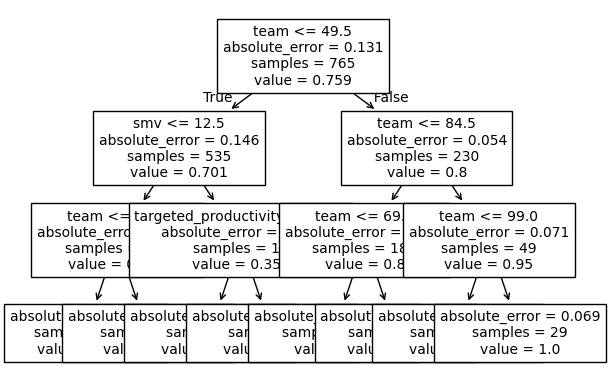

In [ ]:
plot_tree(clf, fontsize=10, feature_names=X.columns)
plt.savefig('out.pdf')

**75-25 Train Test  Split**

In [ ]:
rf2= RandomForestRegressor()

In [ ]:
rf2.fit(X_train2_nomulti, y_train2_nomulti)
y_pred_nomulti = rf2.predict(X_test2_nomulti)
mse = mean_squared_error(y_test2_nomulti, y_pred_nomulti)
r2 = r2_score(y_test2_nomulti, y_pred_nomulti)
mae = mean_absolute_error(y_test2_nomulti, y_pred_nomulti)
print(f'Model 8 Random Forest Report:\n MSE: {mse:.4f}, R-squared: {r2:.4f}, MAE: {mae:.4f}')

Model 8 Random Forest Report:
 MSE: 0.0242, R-squared: 0.0887, MAE: 0.1063


**70-30 Train Test Split**

In [ ]:
rf3= RandomForestRegressor()

In [ ]:
rf3.fit(X_train3_nomulti, y_train3_nomulti)
y_pred_nomulti = rf3.predict(X_test3_nomulti)
mse = mean_squared_error(y_test3_nomulti, y_pred_nomulti)
r2 = r2_score(y_test3_nomulti, y_pred_nomulti)
mae = mean_absolute_error(y_test3_nomulti, y_pred_nomulti)
print(f'Model 8 Random Forest Report:\n MSE: {mse:.4f}, R-squared: {r2:.4f}, MAE: {mae:.4f}')

Model 8 Random Forest Report:
 MSE: 0.0238, R-squared: 0.0968, MAE: 0.1047


**60-40 Train Test Split**

In [ ]:
rf4= RandomForestRegressor()

In [ ]:
rf4.fit(X_train4_nomulti, y_train4_nomulti)
y_pred_nomulti = rf4.predict(X_test4_nomulti)
mse = mean_squared_error(y_test4_nomulti, y_pred_nomulti)
r2 = r2_score(y_test4_nomulti, y_pred_nomulti)
mae = mean_absolute_error(y_test4_nomulti, y_pred_nomulti)
print(f'Model 8 Random Forest Report:\n MSE: {mse:.4f}, R-squared: {r2:.4f}, MAE: {mae:.4f}')

Model 8 Random Forest Report:
 MSE: 0.0234, R-squared: 0.1399, MAE: 0.1043


# **Neural Network (After VIF)**

In [ ]:
import tensorflow as tf

**80-20 Train Test Split**

Epochs=10

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),



                            tf.keras.layers.Dense(5),


                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train1_nomulti, y_train1_nomulti, epochs= 10, verbose=1)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.3069 - mae: 13.3069
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0883 - mae: 3.0883 
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3346 - mae: 1.3346 
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0178 - mae: 1.0178
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7653 - mae: 0.7653 
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6282 - mae: 0.6282 
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6314 - mae: 0.6314 
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5488 - mae: 0.5488  
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5721 - mae: 0.5721 
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5843 - mae: 0.5843 


In [ ]:
model.evaluate(X_test1_nomulti, y_test1_nomulti)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1332 - mae: 0.1332  


[0.13819174468517303, 0.13819174468517303]

In [ ]:
model.summary();

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_84 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_85 (Dense)                     │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_86 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 515 (2.02 KB)

 Trainable params: 171 (684.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 344 (1.35 KB)

Text(0.5, 0, 'epochs')

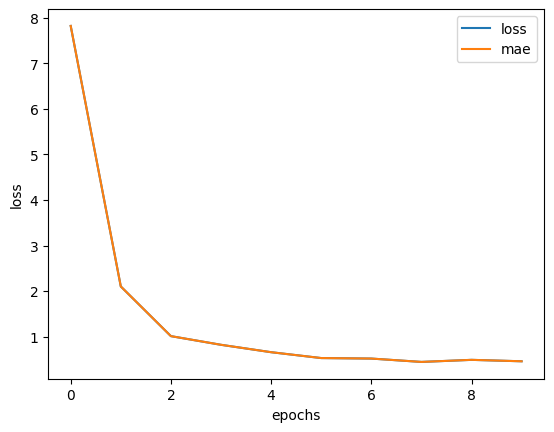

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Epochs=30

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),



                            tf.keras.layers.Dense(5),


                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train1_nomulti, y_train1_nomulti, epochs= 30, verbose=1)

Epoch 1/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 38.5055 - mae: 38.5055  
Epoch 2/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29.1249 - mae: 29.1249
Epoch 3/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 20.4396 - mae: 20.4396
Epoch 4/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.2976 - mae: 12.2976
Epoch 5/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.3674 - mae: 4.3674
Epoch 6/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1600 - mae: 1.1600
Epoch 7/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4642 - mae: 0.4642
Epoch 8/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3700 - mae: 0.3700
Epoch 9/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2431 - mae: 0.2431
Epoch 10/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3014 - mae: 0.3014
Epoch 11/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2860 - mae: 0.2860
Epoch 12/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3100 - mae: 0.3100
Epoch 13/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
model.evaluate(X_test1_nomulti, y_test1_nomulti)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1367 - mae: 0.1367  


[0.13493195176124573, 0.13493195176124573]

In [ ]:
model.summary();

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_87 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_88 (Dense)                     │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_89 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 515 (2.02 KB)

 Trainable params: 171 (684.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 344 (1.35 KB)

Text(0.5, 0, 'epochs')

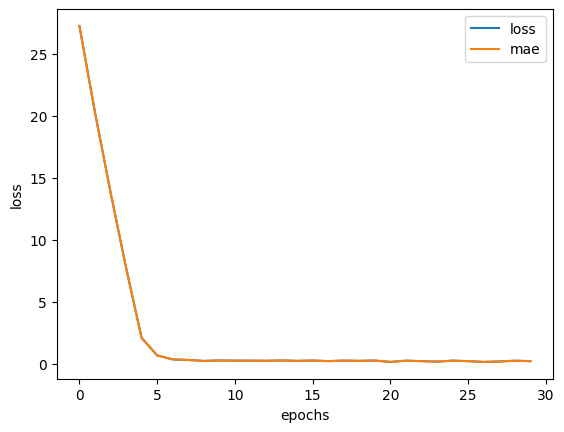

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Epochs=60

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),



                            tf.keras.layers.Dense(5),


                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train1_nomulti, y_train1_nomulti, epochs= 60, verbose=1)

Epoch 1/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 36.1270 - mae: 36.1270
Epoch 2/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 21.5233 - mae: 21.5233
Epoch 3/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.9871 - mae: 6.9871
Epoch 4/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1310 - mae: 1.1310
Epoch 5/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7441 - mae: 0.7441
Epoch 6/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4564 - mae: 0.4564
Epoch 7/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3612 - mae: 0.3612
Epoch 8/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3279 - mae: 0.3279
Epoch 9/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4103 - mae: 0.4103
Epoch 10/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5636 - mae: 0.5636
Epoch 11/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4740 - mae: 0.4740
Epoch 12/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5039 - mae: 0.5039
Epoch 13/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [ ]:
model.evaluate(X_test1_nomulti, y_test1_nomulti)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1722 - mae: 0.1722  


[0.18318527936935425, 0.18318527936935425]

In [ ]:
model.summary();

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_90 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_91 (Dense)                     │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_92 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 515 (2.02 KB)

 Trainable params: 171 (684.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 344 (1.35 KB)

Text(0.5, 0, 'epochs')

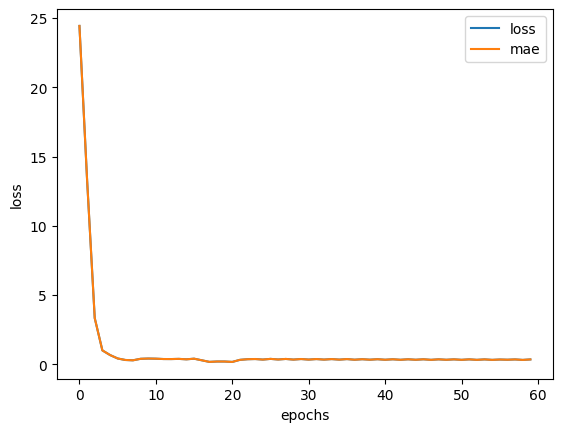

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Epochs=90

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),



                            tf.keras.layers.Dense(5),


                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train1_nomulti, y_train1_nomulti, epochs= 90, verbose=1)

Epoch 1/90
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6.7487 - mae: 6.7487
Epoch 2/90
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7186 - mae: 0.7186
Epoch 3/90
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5684 - mae: 0.5684
Epoch 4/90
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5716 - mae: 0.5716
Epoch 5/90
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5214 - mae: 0.5214
Epoch 6/90
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4769 - mae: 0.4769
Epoch 7/90
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3859 - mae: 0.3859
Epoch 8/90
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3790 - mae: 0.3790
Epoch 9/90
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3569 - mae: 0.3569
Epoch 10/90
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2522 - mae: 0.2522
Epoch 11/90
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2435 - mae: 0.2435
Epoch 12/90
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2792 - mae: 0.2792
Epoch 13/90
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

In [ ]:
model.evaluate(X_test1_nomulti, y_test1_nomulti)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1323 - mae: 0.1323  


[0.1356920748949051, 0.1356920748949051]

Epochs=10

In [ ]:
model.summary();

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_93 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_94 (Dense)                     │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_95 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 515 (2.02 KB)

 Trainable params: 171 (684.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 344 (1.35 KB)

Text(0.5, 0, 'epochs')

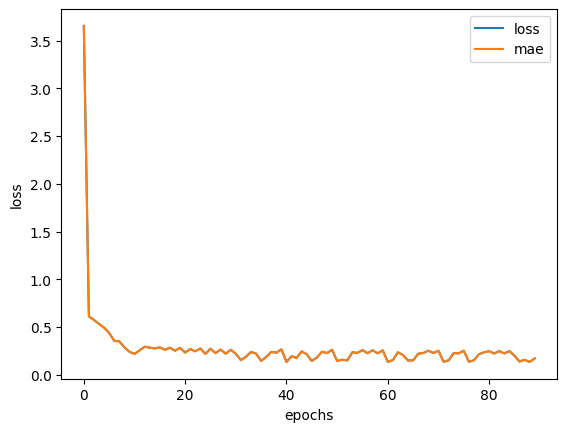

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

**75-25 Train Test Split**

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),



                            tf.keras.layers.Dense(5),


                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train2_nomulti, y_train2_nomulti, epochs= 10, verbose=1)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 18.1722 - mae: 18.1722
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.8445 - mae: 9.8445 
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3604 - mae: 2.3604  
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9415 - mae: 0.9415 
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7604 - mae: 0.7604 
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6556 - mae: 0.6556 
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5580 - mae: 0.5580 
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4877 - mae: 0.4877 
Epoch 9/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4271 - mae: 0.4271 
Epoch 10/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4150 - mae: 0.4150  


In [ ]:
model.evaluate(X_test2_nomulti, y_test2_nomulti)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1627 - mae: 0.1627  


[0.17451418936252594, 0.17451418936252594]

In [ ]:
model.summary();

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_96 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_97 (Dense)                     │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_98 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 515 (2.02 KB)

 Trainable params: 171 (684.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 344 (1.35 KB)

Text(0.5, 0, 'epochs')

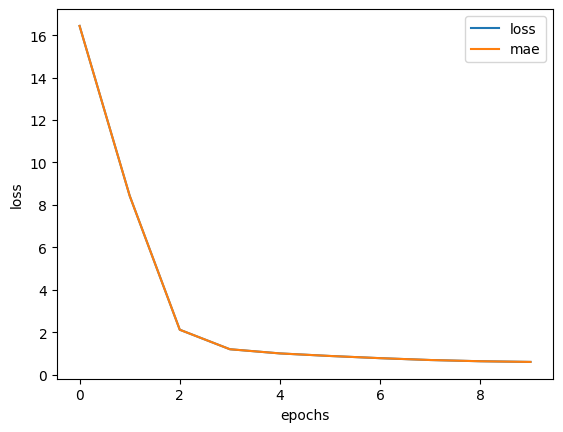

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Epochs=30

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),



                            tf.keras.layers.Dense(5),


                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train2_nomulti, y_train2_nomulti, epochs= 30, verbose=1)

Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 12.6880 - mae: 12.6880
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7453 - mae: 3.7453 
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6192 - mae: 1.6192 
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8299 - mae: 0.8299  
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6261 - mae: 0.6261 
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4843 - mae: 0.4843 
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3970 - mae: 0.3970  
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4144 - mae: 0.4144  
Epoch 9/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3586 - mae: 0.3586 
Epoch 10/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2810 - mae: 0.2810 
Epoch 11/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2504 - mae: 0.2504  
Epoch 12/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2507 - mae: 0.2507 
Epoch 13/30
23/23 ━━━━━━━━━━━━━━

In [ ]:
model.evaluate(X_test2_nomulti, y_test2_nomulti)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2022 - mae: 0.2022  


[0.21032719314098358, 0.21032719314098358]

In [ ]:
model.summary();

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_99 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_100 (Dense)                    │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_101 (Dense)                    │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 515 (2.02 KB)

 Trainable params: 171 (684.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 344 (1.35 KB)

Text(0.5, 0, 'epochs')

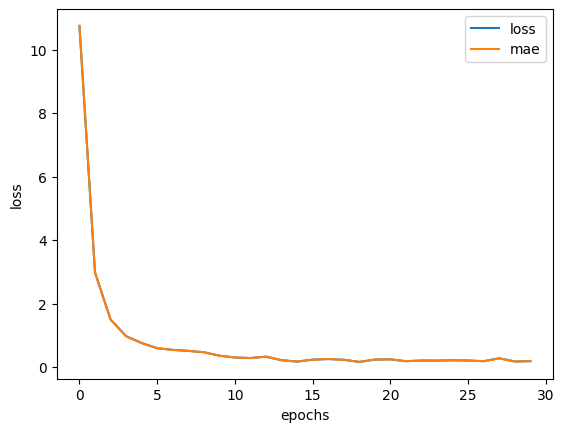

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Epochs=60

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),



                            tf.keras.layers.Dense(5),


                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train2_nomulti, y_train2_nomulti, epochs= 60, verbose=1)

Epoch 1/60
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.2189 - mae: 1.2189
Epoch 2/60
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8612 - mae: 0.8612
Epoch 3/60
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7294 - mae: 0.7294
Epoch 4/60
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6138 - mae: 0.6138
Epoch 5/60
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5207 - mae: 0.5207
Epoch 6/60
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4538 - mae: 0.4538
Epoch 7/60
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3799 - mae: 0.3799
Epoch 8/60
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3190 - mae: 0.3190
Epoch 9/60
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2677 - mae: 0.2677
Epoch 10/60
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2156 - mae: 0.2156
Epoch 11/60
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2711 - mae: 0.2711
Epoch 12/60
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2035 - mae: 0.2035
Epoch 13/60
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

In [ ]:
model.evaluate(X_test2_nomulti, y_test2_nomulti)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2062 - mae: 0.2062  


[0.2149619609117508, 0.2149619609117508]

In [ ]:
model.summary();

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_102 (Dense)                    │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_103 (Dense)                    │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_104 (Dense)                    │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 515 (2.02 KB)

 Trainable params: 171 (684.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 344 (1.35 KB)

Text(0.5, 0, 'epochs')

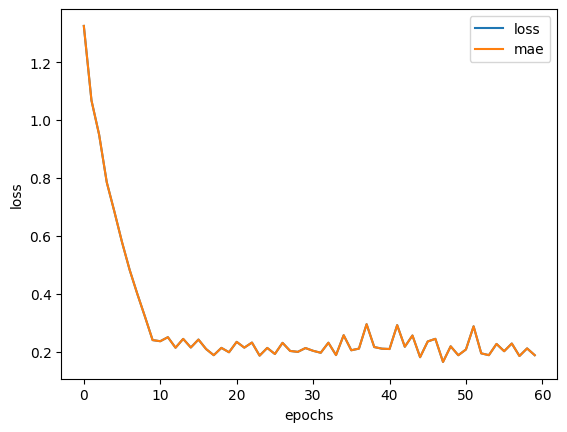

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Epochs=90

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),



                            tf.keras.layers.Dense(5),


                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train2_nomulti, y_train2_nomulti, epochs= 90, verbose=1)

Epoch 1/90
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 22.5151 - mae: 22.5151
Epoch 2/90
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.7910 - mae: 11.7910
Epoch 3/90
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4803 - mae: 2.4803  
Epoch 4/90
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9464 - mae: 0.9464 
Epoch 5/90
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7624 - mae: 0.7624 
Epoch 6/90
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6670 - mae: 0.6670 
Epoch 7/90
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5868 - mae: 0.5868  
Epoch 8/90
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5102 - mae: 0.5102 
Epoch 9/90
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4701 - mae: 0.4701 
Epoch 10/90
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3828 - mae: 0.3828  
Epoch 11/90
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3117 - mae: 0.3117 
Epoch 12/90
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2960 - mae: 0.2960
Epoch 13/90
23/23 ━━━━━━━━━━━━━━━

In [ ]:
model.evaluate(X_test2_nomulti, y_test2_nomulti)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1355 - mae: 0.1355  


[0.13319019973278046, 0.13319019973278046]

In [ ]:
model.summary();

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_105 (Dense)                    │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_106 (Dense)                    │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_107 (Dense)                    │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 515 (2.02 KB)

 Trainable params: 171 (684.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 344 (1.35 KB)

Text(0.5, 0, 'epochs')

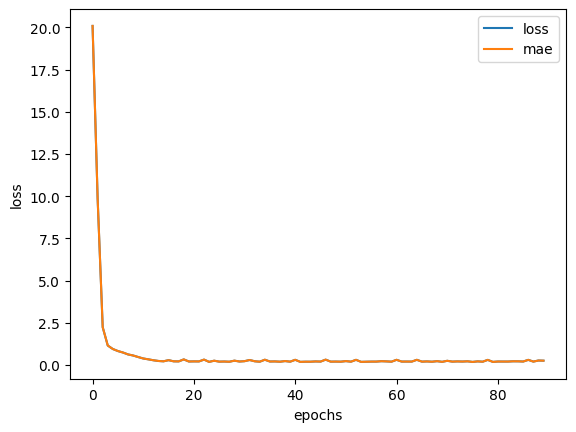

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

**70-30 Train Test Split**

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),



                            tf.keras.layers.Dense(5),


                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train3_nomulti, y_train3_nomulti, epochs= 10, verbose=1)

Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5.2465 - mae: 5.2465
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5142 - mae: 1.5142
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6962 - mae: 0.6962
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5294 - mae: 0.5294 
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4927 - mae: 0.4927 
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4378 - mae: 0.4378 
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4144 - mae: 0.4144 
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3396 - mae: 0.3396 
Epoch 9/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3164 - mae: 0.3164 
Epoch 10/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2981 - mae: 0.2981 


In [ ]:
model.evaluate(X_test3_nomulti, y_test3_nomulti)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2133 - mae: 0.2133  


[0.23989325761795044, 0.23989325761795044]

In [ ]:
model.summary();

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_108 (Dense)                    │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_109 (Dense)                    │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_110 (Dense)                    │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 515 (2.02 KB)

 Trainable params: 171 (684.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 344 (1.35 KB)

Text(0.5, 0, 'epochs')

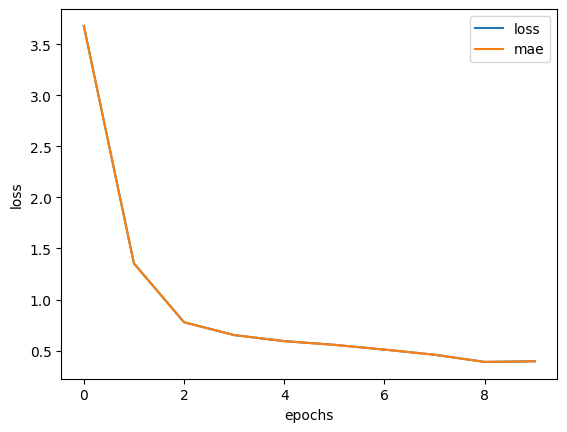

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Epochs=30

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),



                            tf.keras.layers.Dense(5),


                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train3_nomulti, y_train3_nomulti, epochs= 30, verbose=1)

Epoch 1/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.9911 - mae: 7.9911  
Epoch 2/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4831 - mae: 1.4831 
Epoch 3/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7011 - mae: 0.7011 
Epoch 4/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5858 - mae: 0.5858 
Epoch 5/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5673 - mae: 0.5673  
Epoch 6/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4368 - mae: 0.4368 
Epoch 7/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4048 - mae: 0.4048  
Epoch 8/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3714 - mae: 0.3714 
Epoch 9/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3331 - mae: 0.3331  
Epoch 10/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3064 - mae: 0.3064 
Epoch 11/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2802 - mae: 0.2802 
Epoch 12/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2657 - mae: 0.2657  
Epoch 13/30
21/21 ━━━━━━━━━━━━━━

In [ ]:
model.evaluate(X_test3_nomulti, y_test3_nomulti)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1467 - mae: 0.1467  


[0.14420440793037415, 0.14420440793037415]

In [ ]:
model.summary();

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_111 (Dense)                    │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_112 (Dense)                    │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_113 (Dense)                    │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 515 (2.02 KB)

 Trainable params: 171 (684.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 344 (1.35 KB)

Text(0.5, 0, 'epochs')

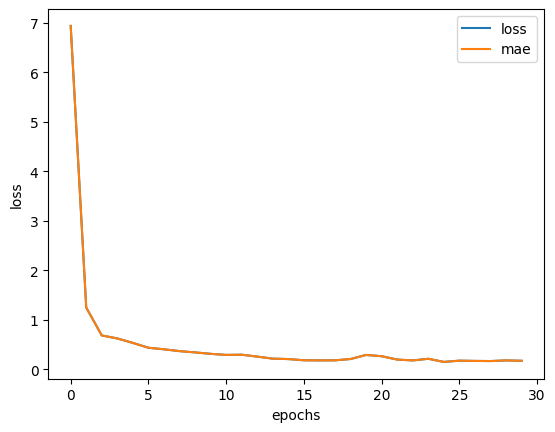

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Epochs=60

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),



                            tf.keras.layers.Dense(5),


                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train3_nomulti, y_train3_nomulti, epochs= 60, verbose=1)

Epoch 1/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3669 - mae: 1.3669
Epoch 2/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8625 - mae: 0.8625 
Epoch 3/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8270 - mae: 0.8270 
Epoch 4/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8093 - mae: 0.8093 
Epoch 5/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7551 - mae: 0.7551  
Epoch 6/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6885 - mae: 0.6885 
Epoch 7/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6204 - mae: 0.6204 
Epoch 8/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4560 - mae: 0.4560  
Epoch 9/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4097 - mae: 0.4097  
Epoch 10/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3756 - mae: 0.3756 
Epoch 11/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3563 - mae: 0.3563 
Epoch 12/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3544 - mae: 0.3544 
Epoch 13/60
21/21 ━━━━━━━━━━━━━━━━━

In [ ]:
model.evaluate(X_test3_nomulti, y_test3_nomulti)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1391 - mae: 0.1391  


[0.1397348940372467, 0.1397348940372467]

In [ ]:
model.summary();

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_114 (Dense)                    │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_115 (Dense)                    │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_116 (Dense)                    │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 515 (2.02 KB)

 Trainable params: 171 (684.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 344 (1.35 KB)

Text(0.5, 0, 'epochs')

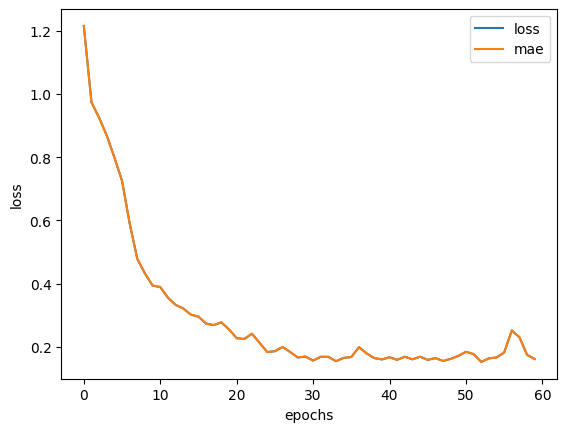

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Epochs=90

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),



                            tf.keras.layers.Dense(5),


                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train3_nomulti, y_train3_nomulti, epochs= 90, verbose=1)

Epoch 1/90
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.3697 - mae: 3.3697
Epoch 2/90
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8911 - mae: 0.8911 
Epoch 3/90
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7145 - mae: 0.7145  
Epoch 4/90
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5354 - mae: 0.5354 
Epoch 5/90
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4880 - mae: 0.4880 
Epoch 6/90
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4580 - mae: 0.4580  
Epoch 7/90
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4162 - mae: 0.4162 
Epoch 8/90
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3917 - mae: 0.3917 
Epoch 9/90
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3763 - mae: 0.3763 
Epoch 10/90
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3328 - mae: 0.3328 
Epoch 11/90
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2709 - mae: 0.2709 
Epoch 12/90
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2415 - mae: 0.2415 
Epoch 13/90
21/21 ━━━━━━━━━━━━━━━━━━

In [ ]:
model.evaluate(X_test3_nomulti, y_test3_nomulti)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2042 - mae: 0.2042  


[0.21909716725349426, 0.21909716725349426]

In [ ]:
model.summary();

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_117 (Dense)                    │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_118 (Dense)                    │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_119 (Dense)                    │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 515 (2.02 KB)

 Trainable params: 171 (684.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 344 (1.35 KB)

Text(0.5, 0, 'epochs')

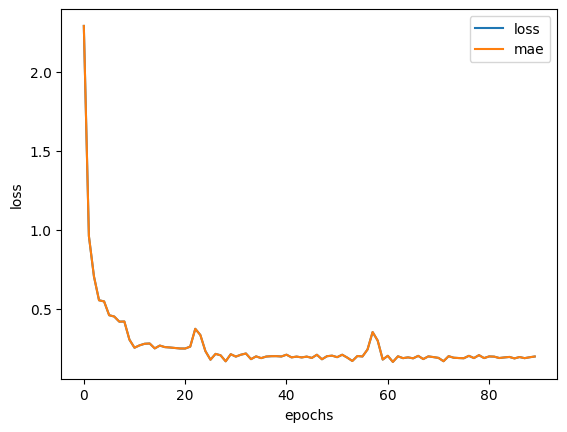

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

**60-40 Train Test Split**

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),



                            tf.keras.layers.Dense(5),


                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train4_nomulti, y_train4_nomulti, epochs= 10, verbose=1)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 24.7427 - mae: 24.7427
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.2494 - mae: 13.2494 
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0889 - mae: 3.0889 
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7867 - mae: 1.7867 
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1125 - mae: 1.1125 
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9509 - mae: 0.9509 
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8995 - mae: 0.8995 
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8566 - mae: 0.8566 
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7764 - mae: 0.7764 
Epoch 10/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8481 - mae: 0.8481  


In [ ]:
model.evaluate(X_test4_nomulti, y_test4_nomulti)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4698 - mae: 0.4698  


[0.7191718816757202, 0.7191718816757202]

In [ ]:
model.summary();

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_120 (Dense)                    │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_121 (Dense)                    │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_122 (Dense)                    │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 515 (2.02 KB)

 Trainable params: 171 (684.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 344 (1.35 KB)

Text(0.5, 0, 'epochs')

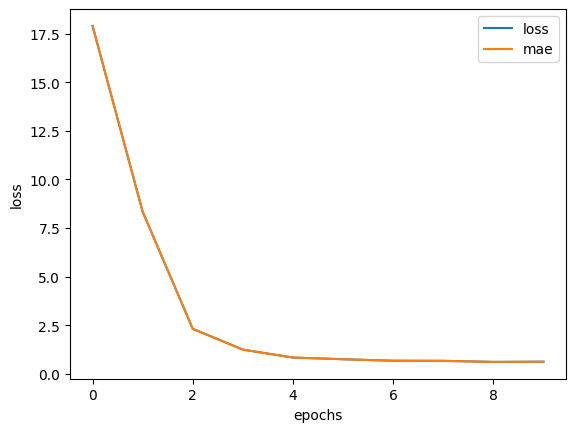

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Epochs=30

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),



                            tf.keras.layers.Dense(5),


                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train4_nomulti, y_train4_nomulti, epochs= 30, verbose=1)

Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11.3693 - mae: 11.3693
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0056 - mae: 5.0056    
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2502 - mae: 1.2502 
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8776 - mae: 0.8776 
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8251 - mae: 0.8251  
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7630 - mae: 0.7630 
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6867 - mae: 0.6867 
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6281 - mae: 0.6281 
Epoch 9/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5707 - mae: 0.5707 
Epoch 10/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4755 - mae: 0.4755 
Epoch 11/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4396 - mae: 0.4396 
Epoch 12/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3786 - mae: 0.3786 
Epoch 13/30
18/18 ━━━━━━━━━━━━━━

In [ ]:
model.evaluate(X_test4_nomulti, y_test4_nomulti)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1502 - mae: 0.1502  


[0.15548746287822723, 0.15548746287822723]

In [ ]:
model.summary();

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_123 (Dense)                    │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_124 (Dense)                    │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_125 (Dense)                    │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 515 (2.02 KB)

 Trainable params: 171 (684.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 344 (1.35 KB)

Text(0.5, 0, 'epochs')

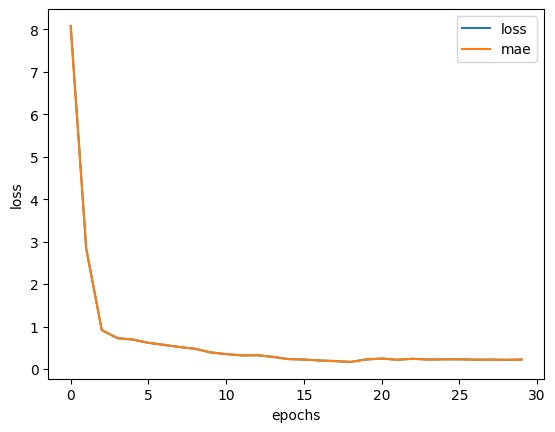

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Epochs=60

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),



                            tf.keras.layers.Dense(5),


                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train4_nomulti, y_train4_nomulti, epochs= 60, verbose=1)

Epoch 1/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.8436 - mae: 1.8436
Epoch 2/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7492 - mae: 0.7492 
Epoch 3/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7485 - mae: 0.7485 
Epoch 4/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6680 - mae: 0.6680 
Epoch 5/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5926 - mae: 0.5926 
Epoch 6/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5181 - mae: 0.5181 
Epoch 7/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5002 - mae: 0.5002 
Epoch 8/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4473 - mae: 0.4473
Epoch 9/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3916 - mae: 0.3916
Epoch 10/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3423 - mae: 0.3423 
Epoch 11/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2312 - mae: 0.2312 
Epoch 12/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2543 - mae: 0.2543 
Epoch 13/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 0

In [ ]:
model.evaluate(X_test4_nomulti, y_test4_nomulti)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1350 - mae: 0.1350  


[0.13470743596553802, 0.13470743596553802]

In [ ]:
model.summary();

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_126 (Dense)                    │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_127 (Dense)                    │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_128 (Dense)                    │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 515 (2.02 KB)

 Trainable params: 171 (684.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 344 (1.35 KB)

Text(0.5, 0, 'epochs')

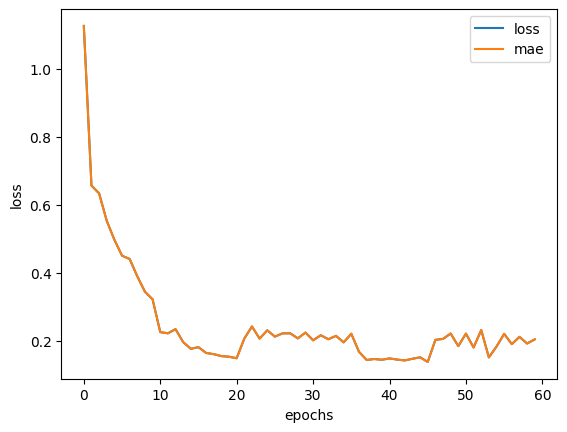

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Epochs=90

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),



                            tf.keras.layers.Dense(5),


                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train4_nomulti, y_train4_nomulti, epochs= 90, verbose=1)

Epoch 1/90
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1594 - mae: 1.1594
Epoch 2/90
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8628 - mae: 0.8628 
Epoch 3/90
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7619 - mae: 0.7619  
Epoch 4/90
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6748 - mae: 0.6748 
Epoch 5/90
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5995 - mae: 0.5995  
Epoch 6/90
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5215 - mae: 0.5215 
Epoch 7/90
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4122 - mae: 0.4122 
Epoch 8/90
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3688 - mae: 0.3688 
Epoch 9/90
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3329 - mae: 0.3329 
Epoch 10/90
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2809 - mae: 0.2809 
Epoch 11/90
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2867 - mae: 0.2867 
Epoch 12/90
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2641 - mae: 0.2641 
Epoch 13/90
18/18 ━━━━━━━━━━━━━━━━━━

In [ ]:
model.evaluate(X_test4_nomulti, y_test4_nomulti)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1565 - mae: 0.1565  


[0.16227014362812042, 0.16227014362812042]

In [ ]:
model.summary();

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_129 (Dense)                    │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_130 (Dense)                    │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_131 (Dense)                    │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 515 (2.02 KB)

 Trainable params: 171 (684.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 344 (1.35 KB)

Text(0.5, 0, 'epochs')

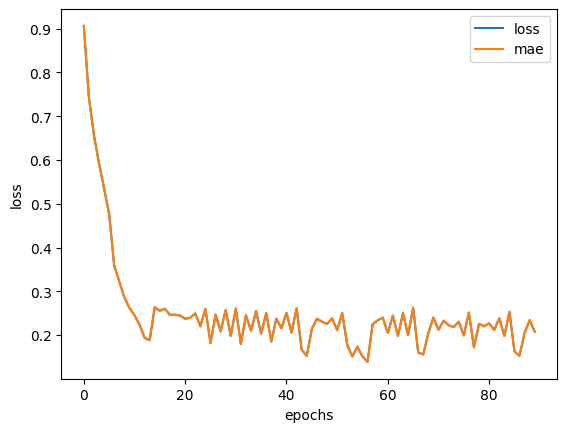

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")